In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import numpy as np

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In this file we will be testing our selection process using the vbf generator information. We will first be investigating whether gen jets make sense

In [101]:
df = pd.read_parquet("0-2.parquet")

df.columns.values.tolist()
df

GenHiggsEta           GenHiggsPhi           GenHiggsMass         \
              0         1           0         1            0      1   
0     -0.646484 -1.164062   -2.265625  1.332031        125.0  125.0   
1      1.253906 -0.190430    2.023438 -1.207031        125.0  125.0   
2      0.319336  0.796875   -1.656250  1.042969        125.0  125.0   
3      0.257812  0.925781    1.949219 -0.402344        125.0  125.0   
4      0.724609  0.662109    1.964844 -0.525391        125.0  125.0   
..          ...       ...         ...       ...          ...    ...   
570    0.072754  3.882812    1.691406 -0.413086        125.0  125.0   
571   -0.120117  0.640625    2.671875 -0.479492        125.0  125.0   
572    0.890625 -0.015869    0.773438 -2.445312        125.0  125.0   
573   -0.190430 -0.373047   -2.484375  1.152344        125.0  125.0   
574    0.816406  0.475586    0.424805 -2.781250        125.0  125.0   

    GenHiggsPt         GenHiggsChildren      ... lp_sf_sys_down                \
             0       1                0   1  ...              0             1   
0       634.00  588.00                5  24  ...   1.013158e+00  1.756670e-01   
1       109.25  425.00               24   5  ...   2.621220e-01  1.000000e+00   
2       646.00  554.00                5  24  ...   6.953031e-21  1.416126e-10   
3       435.00  304.00                5  24  ...   1.056727e-01  1.000000e+00   
4       461.00  361.00                5  23  ...   7.437584e-24  2.414727e-02   
..         ...     ...              ...  ..  ...            ...           ...   
570     486.00   49.75                5  23  ...   1.000000e+00  5.982143e-42   
571     403.00  411.00                5  24  ...   8.933920e-01  2.933717e-01   
572     442.00  357.00                5  24  ...   1.317262e-01  1.186648e-15   
573     431.00  386.00                5  24  ...   1.479136e-01  1.080385e-10   
574     413.00  379.00                5  23  ...   3.576050e-09  2.144067e-02   

    lp_sf_sys_up            lp_sf_double_matched_event       \
               0          1                          0    1   
0       5.813827   5.763737                        0.0  0.0   
1       0.646291   1.000000                        0.0  1.0   
2       5.274429   3.219763                        0.0  0.0   
3       0.587374   1.000000                        0.0  1.0   
4     601.768127   1.070159                        0.0  0.0   
..           ...        ...                        ...  ...   
570     1.000000   1.583039                        1.0  0.0   
571     7.860237   1.031016                        0.0  0.0   
572     1.136776  68.272476                        0.0  0.0   
573     1.354620   0.102750                        0.0  0.0   
574     0.000000   0.855242                        0.0  0.0   

    lp_sf_unmatched_quarks      lp_sf_num_sjpt_gt350       
                         0    1                    0    1  
0                      0.0  0.0                  0.0  0.0  
1                      1.0  1.0                  0.0  1.0  
2                      0.0  1.0                  1.0  1.0  
3                      0.0  1.0                  0.0  1.0  
4                      0.0  1.0                  1.0  0.0  
..                     ...  ...                  ...  ...  
570                    1.0  0.0                  1.0  1.0  
571                    0.0  0.0                  0.0  0.0  
572                    0.0  0.0                  0.0  0.0  
573                    0.0  1.0                  0.0  0.0  
574                    0.0  0.0                  0.0  0.0  

[575 rows x 388 columns]

bbSkimmer modified gives us the two VBF jets which we will be able to access and manipulate. it also gives us the results of cuts on the events (there needs to be atleast 2 VBF jets). We can apply these filters and graph the kinematic variables. We can also record the before and after applying these cuts. 


In [105]:
# Apply lepton veto selections ($N_\mu =0$ and $N_e=0$)
print(np.shape(df))
df_em = df[(df[("nGoodMuons", 0)] == 0) & (df[("nGoodElectrons", 0)] == 0)]

# 2 vbf jets
# df_vbf = df[ (df[('nGoodVBFJetsUnsorted', 0)] >= 2)]

# lepton veto and 2 vbf jets
# df_sorted_Rand = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsUnsorted', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]
df_sorted_pt = df[
    (df[("nGoodMuons", 0)] == 0)
    & (df[("nGoodElectrons", 0)] == 0)
    & (df[("nGoodVBFJetsSortedpt", 0)] >= 2)
    & (df[("nGoodJets", 0)] == 0)
]
# df_sorted_M = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsSortedM', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]
# df_sorted_eta = df[(df[('nGoodMuons', 0)] == 0) & (df[('nGoodElectrons', 0)] == 0) & (df[('nGoodVBFJetsSortedeta', 0)] >= 2)& (df[('nGoodJets', 0)] == 0)]


# generate all variables that are needed for the ak8 jet selections in VBF HH4b paper.
# df[('DijetDeltaPhi', 0)] = np.abs(df[('ak8FatJetPhi', 0)] - df[('ak8FatJetPhi', 1)])
# df[('DijetDeltaEta', 0)] = np.abs(df[('ak8FatJetEta', 0)] - df[('ak8FatJetEta', 1)])
# print(np.shape(df)[0],np.shape(df_sorted_Rand)[0],np.shape(df_sorted_pt)[0],np.shape(df_sorted_M)[0],np.shape(df_sorted_eta)[0])
print("thing", np.sum(df["weight"]), np.sum(df["weight_noxsec"]))
print("tsts", np.sum(df_sorted_pt["weight"]), np.sum(df_sorted_pt["weight_noxsec"]))
df_sorted_pt
print(np.sum(df_sorted_pt["weight_noxsec"]))

(575, 388)
thing 0    7746.732114
dtype: float64 0    579.744052
dtype: float64
tsts 0    1702.294919
dtype: float64 0    127.395054
dtype: float64
0    63.697527
dtype: float64


Graphing the variables for our matched jets: These jets have had vbf selections applied but not the HVV tagging yet. file doesn't have output.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io


# Define a function to calculate delta R
def deltaR(eta1, phi1, eta2, phi2):
    deta = eta1 - eta2
    dphi = np.abs(phi1 - phi2)
    dphi = np.where(dphi < np.pi, dphi, 2 * np.pi - dphi)
    return np.sqrt(deta**2 + dphi**2)


# Calculate delta R for each sorting method and add it to the DataFrame
for df, method in zip(
    [df_sorted_Rand, df_sorted_pt, df_sorted_M, df_sorted_eta], ["Rand", "pt", "M", "eta"]
):
    df["deltaR_1_to_0"] = deltaR(
        df[("vbfetaGen", 0)],
        df[("vbfphiGen", 0)],
        df[("vbfetaSorted" + method, 0)],
        df[("vbfphiSorted" + method, 0)],
    )
    df["deltaR_1_to_1"] = deltaR(
        df[("vbfetaGen", 1)],
        df[("vbfphiGen", 1)],
        df[("vbfetaSorted" + method, 0)],
        df[("vbfphiSorted" + method, 0)],
    )
    df["deltaR_2_to_0"] = deltaR(
        df[("vbfetaGen", 0)],
        df[("vbfphiGen", 0)],
        df[("vbfetaSorted" + method, 1)],
        df[("vbfphiSorted" + method, 1)],
    )
    df["deltaR_2_to_1"] = deltaR(
        df[("vbfetaGen", 1)],
        df[("vbfphiGen", 1)],
        df[("vbfetaSorted" + method, 1)],
        df[("vbfphiSorted" + method, 1)],
    )


# Define a function to create the required table
def display_table(df, method):
    # Initialize a string to store the table
    table_string = f"Sorting method: {method}\n"
    table_string += f"Number of events: {len(df)}\n"
    table_string += "| Index | Jet | dR to gen quark 1 | dR to gen quark 2 |\n"
    table_string += "| --- | --- | --- | --- |\n"

    # Add each row to the table string
    for index in df.index[:10]:
        table_string += f"| {index} | Jet 1 | {df['deltaR_1_to_0'][index]:.2f} | {df['deltaR_1_to_1'][index]:.2f} |\n"
        table_string += f"| {index} | Jet 2 | {df['deltaR_2_to_0'][index]:.2f} | {df['deltaR_2_to_1'][index]:.2f} |\n"

    # Calculate the summary information
    dR_cols = ["deltaR_1_to_0", "deltaR_1_to_1", "deltaR_2_to_0", "deltaR_2_to_1"]
    counts = (df[dR_cols] < 0.4).sum(axis=1).value_counts()

    # Add the summary information to the table string
    table_string += f"\nNumber of events with exactly 0 dR scores < 0.4: {counts.get(0, 0)}\n"
    table_string += f"Number of events with exactly 1 dR score < 0.4: {counts.get(1, 0)}\n"
    table_string += f"Number of events with exactly 2 dR scores < 0.4: {counts.get(2, 0)}\n"

    # Display the table string
    print(table_string)


# Display tables for each DataFrame
display_table(df_sorted_Rand, "Rand")
display_table(df_sorted_pt, "pt")
display_table(df_sorted_M, "M")
display_table(df_sorted_eta, "eta")

Sorting method: Rand
Number of events: 2917
| Index | Jet | dR to gen quark 1 | dR to gen quark 2 |
| --- | --- | --- | --- |
| 3 | Jet 1 | 1.05 | 3.55 |
| 3 | Jet 2 | 0.33 | 4.92 |
| 5 | Jet 1 | 0.02 | 4.27 |
| 5 | Jet 2 | 2.45 | 1.82 |
| 10 | Jet 1 | 6.16 | 0.23 |
| 10 | Jet 2 | 0.27 | 6.11 |
| 12 | Jet 1 | 3.08 | 6.13 |
| 12 | Jet 2 | 2.79 | 5.41 |
| 13 | Jet 1 | 0.03 | 2.60 |
| 13 | Jet 2 | 2.72 | 0.11 |
| 14 | Jet 1 | 4.33 | 0.01 |
| 14 | Jet 2 | 0.16 | 4.19 |
| 16 | Jet 1 | 0.07 | 8.31 |
| 16 | Jet 2 | 6.06 | 2.45 |
| 18 | Jet 1 | 0.76 | 6.75 |
| 18 | Jet 2 | 6.30 | 0.07 |
| 19 | Jet 1 | 7.69 | 0.06 |
| 19 | Jet 2 | 0.11 | 7.81 |
| 20 | Jet 1 | 0.04 | 6.91 |
| 20 | Jet 2 | 6.95 | 0.21 |

Number of events with exactly 0 dR scores < 0.4: 579
Number of events with exactly 1 dR score < 0.4: 1157
Number of events with exactly 2 dR scores < 0.4: 1181

Sorting method: pt
Number of events: 1452
| Index | Jet | dR to gen quark 1 | dR to gen quark 2 |
| --- | --- | --- | --- |
| 10 | Jet 1

Defining some data that we used to study how vbf jet matching at different selection stages. R1 vs R2 graphs (looking at fatjet exclusion cut effects)

In [82]:
# Test the functions with a sample string
log_string = """
WARNING:root:[928, 4122, 4381, 9600, 0.6, 0.6]
WARNING:root:[929, 4121, 4381, 9600, 0.6, 0.7]
WARNING:root:[929, 4121, 4381, 9600, 0.6, 0.8]
WARNING:root:[929, 4121, 4381, 9600, 0.6, 0.9]
WARNING:root:[930, 4121, 4380, 9600, 0.6, 1.0]
WARNING:root:[933, 4120, 4378, 9600, 0.6, 1.1]
WARNING:root:[933, 4121, 4377, 9600, 0.6, 1.2]
WARNING:root:[934, 4121, 4376, 9600, 0.6, 1.3]
WARNING:root:[937, 4119, 4375, 9600, 0.6, 1.4]
WARNING:root:[940, 4118, 4373, 9600, 0.6, 1.5]
WARNING:root:[943, 4115, 4373, 9600, 0.6, 1.6]
WARNING:root:[943, 4121, 4367, 9600, 0.6, 1.7]
WARNING:root:[947, 4120, 4365, 9600, 0.6, 1.8]
WARNING:root:[951, 4120, 4361, 9600, 0.6, 1.9]
WARNING:root:[930, 4122, 4379, 9600, 0.7, 0.6]
WARNING:root:[931, 4121, 4379, 9600, 0.7, 0.7]
WARNING:root:[931, 4121, 4379, 9600, 0.7, 0.8]
WARNING:root:[931, 4121, 4379, 9600, 0.7, 0.9]
WARNING:root:[932, 4121, 4378, 9600, 0.7, 1.0]
WARNING:root:[935, 4120, 4376, 9600, 0.7, 1.1]
WARNING:root:[935, 4121, 4375, 9600, 0.7, 1.2]
WARNING:root:[936, 4121, 4374, 9600, 0.7, 1.3]
WARNING:root:[939, 4119, 4373, 9600, 0.7, 1.4]
WARNING:root:[942, 4118, 4371, 9600, 0.7, 1.5]
WARNING:root:[945, 4115, 4371, 9600, 0.7, 1.6]
WARNING:root:[945, 4121, 4365, 9600, 0.7, 1.7]
WARNING:root:[949, 4120, 4363, 9600, 0.7, 1.8]
WARNING:root:[953, 4120, 4359, 9600, 0.7, 1.9]
WARNING:root:[931, 4123, 4377, 9600, 0.8, 0.6]
WARNING:root:[932, 4122, 4377, 9600, 0.8, 0.7]
WARNING:root:[932, 4122, 4377, 9600, 0.8, 0.8]
WARNING:root:[932, 4122, 4377, 9600, 0.8, 0.9]
WARNING:root:[933, 4122, 4376, 9600, 0.8, 1.0]
WARNING:root:[936, 4121, 4374, 9600, 0.8, 1.1]
WARNING:root:[936, 4122, 4373, 9600, 0.8, 1.2]
WARNING:root:[937, 4122, 4372, 9600, 0.8, 1.3]
WARNING:root:[940, 4120, 4371, 9600, 0.8, 1.4]
WARNING:root:[943, 4119, 4369, 9600, 0.8, 1.5]
WARNING:root:[946, 4116, 4369, 9600, 0.8, 1.6]
WARNING:root:[946, 4122, 4363, 9600, 0.8, 1.7]
WARNING:root:[950, 4121, 4361, 9600, 0.8, 1.8]
WARNING:root:[954, 4121, 4357, 9600, 0.8, 1.9]
WARNING:root:[932, 4123, 4376, 9600, 0.9, 0.6]
WARNING:root:[933, 4122, 4376, 9600, 0.9, 0.7]
WARNING:root:[933, 4122, 4376, 9600, 0.9, 0.8]
WARNING:root:[933, 4122, 4376, 9600, 0.9, 0.9]
WARNING:root:[934, 4122, 4375, 9600, 0.9, 1.0]
WARNING:root:[937, 4121, 4373, 9600, 0.9, 1.1]
WARNING:root:[937, 4122, 4372, 9600, 0.9, 1.2]
WARNING:root:[938, 4122, 4371, 9600, 0.9, 1.3]
WARNING:root:[941, 4120, 4370, 9600, 0.9, 1.4]
WARNING:root:[944, 4119, 4368, 9600, 0.9, 1.5]
WARNING:root:[947, 4116, 4368, 9600, 0.9, 1.6]
WARNING:root:[947, 4122, 4362, 9600, 0.9, 1.7]
WARNING:root:[951, 4121, 4360, 9600, 0.9, 1.8]
WARNING:root:[955, 4121, 4356, 9600, 0.9, 1.9]
WARNING:root:[935, 4121, 4375, 9600, 1.0, 0.6]
WARNING:root:[936, 4120, 4375, 9600, 1.0, 0.7]
WARNING:root:[936, 4120, 4375, 9600, 1.0, 0.8]
WARNING:root:[936, 4120, 4375, 9600, 1.0, 0.9]
WARNING:root:[937, 4120, 4374, 9600, 1.0, 1.0]
WARNING:root:[940, 4119, 4372, 9600, 1.0, 1.1]
WARNING:root:[940, 4120, 4371, 9600, 1.0, 1.2]
WARNING:root:[941, 4120, 4370, 9600, 1.0, 1.3]
WARNING:root:[944, 4118, 4369, 9600, 1.0, 1.4]
WARNING:root:[947, 4117, 4367, 9600, 1.0, 1.5]
WARNING:root:[950, 4114, 4367, 9600, 1.0, 1.6]
WARNING:root:[950, 4120, 4361, 9600, 1.0, 1.7]
WARNING:root:[954, 4119, 4359, 9600, 1.0, 1.8]
WARNING:root:[958, 4119, 4355, 9600, 1.0, 1.9]
WARNING:root:[937, 4121, 4373, 9600, 1.1, 0.6]
WARNING:root:[938, 4120, 4373, 9600, 1.1, 0.7]
WARNING:root:[938, 4120, 4373, 9600, 1.1, 0.8]
WARNING:root:[938, 4120, 4373, 9600, 1.1, 0.9]
WARNING:root:[939, 4120, 4372, 9600, 1.1, 1.0]
WARNING:root:[942, 4119, 4370, 9600, 1.1, 1.1]
WARNING:root:[942, 4120, 4369, 9600, 1.1, 1.2]
WARNING:root:[943, 4120, 4368, 9600, 1.1, 1.3]
WARNING:root:[946, 4118, 4367, 9600, 1.1, 1.4]
WARNING:root:[949, 4117, 4365, 9600, 1.1, 1.5]
WARNING:root:[952, 4114, 4365, 9600, 1.1, 1.6]
WARNING:root:[952, 4120, 4359, 9600, 1.1, 1.7]
WARNING:root:[956, 4119, 4357, 9600, 1.1, 1.8]
WARNING:root:[960, 4119, 4353, 9600, 1.1, 1.9]
WARNING:root:[939, 4120, 4372, 9600, 1.2, 0.6]
WARNING:root:[940, 4119, 4372, 9600, 1.2, 0.7]
WARNING:root:[940, 4119, 4372, 9600, 1.2, 0.8]
WARNING:root:[940, 4119, 4372, 9600, 1.2, 0.9]
WARNING:root:[941, 4119, 4371, 9600, 1.2, 1.0]
WARNING:root:[944, 4118, 4369, 9600, 1.2, 1.1]
WARNING:root:[944, 4119, 4368, 9600, 1.2, 1.2]
WARNING:root:[945, 4119, 4367, 9600, 1.2, 1.3]
WARNING:root:[948, 4117, 4366, 9600, 1.2, 1.4]
WARNING:root:[951, 4116, 4364, 9600, 1.2, 1.5]
WARNING:root:[954, 4113, 4364, 9600, 1.2, 1.6]
WARNING:root:[954, 4119, 4358, 9600, 1.2, 1.7]
WARNING:root:[958, 4118, 4356, 9600, 1.2, 1.8]
WARNING:root:[962, 4118, 4352, 9600, 1.2, 1.9]
WARNING:root:[944, 4119, 4368, 9600, 1.3, 0.6]
WARNING:root:[945, 4118, 4368, 9600, 1.3, 0.7]
WARNING:root:[945, 4118, 4368, 9600, 1.3, 0.8]
WARNING:root:[945, 4118, 4368, 9600, 1.3, 0.9]
WARNING:root:[946, 4118, 4367, 9600, 1.3, 1.0]
WARNING:root:[949, 4117, 4365, 9600, 1.3, 1.1]
WARNING:root:[949, 4118, 4364, 9600, 1.3, 1.2]
WARNING:root:[950, 4118, 4363, 9600, 1.3, 1.3]
WARNING:root:[953, 4116, 4362, 9600, 1.3, 1.4]
WARNING:root:[956, 4115, 4360, 9600, 1.3, 1.5]
WARNING:root:[959, 4112, 4360, 9600, 1.3, 1.6]
WARNING:root:[959, 4118, 4354, 9600, 1.3, 1.7]
WARNING:root:[963, 4117, 4352, 9600, 1.3, 1.8]
WARNING:root:[967, 4117, 4348, 9600, 1.3, 1.9]
WARNING:root:[944, 4124, 4363, 9600, 1.4, 0.6]
WARNING:root:[945, 4123, 4363, 9600, 1.4, 0.7]
WARNING:root:[945, 4123, 4363, 9600, 1.4, 0.8]
WARNING:root:[945, 4123, 4363, 9600, 1.4, 0.9]
WARNING:root:[946, 4123, 4362, 9600, 1.4, 1.0]
WARNING:root:[949, 4122, 4360, 9600, 1.4, 1.1]
WARNING:root:[949, 4123, 4359, 9600, 1.4, 1.2]
WARNING:root:[950, 4123, 4358, 9600, 1.4, 1.3]
WARNING:root:[953, 4121, 4357, 9600, 1.4, 1.4]
WARNING:root:[956, 4120, 4355, 9600, 1.4, 1.5]
WARNING:root:[959, 4117, 4355, 9600, 1.4, 1.6]
WARNING:root:[959, 4123, 4349, 9600, 1.4, 1.7]
WARNING:root:[963, 4122, 4347, 9600, 1.4, 1.8]
WARNING:root:[967, 4122, 4343, 9600, 1.4, 1.9]
WARNING:root:[947, 4123, 4361, 9600, 1.5, 0.6]
WARNING:root:[948, 4122, 4361, 9600, 1.5, 0.7]
WARNING:root:[948, 4122, 4361, 9600, 1.5, 0.8]
WARNING:root:[948, 4122, 4361, 9600, 1.5, 0.9]
WARNING:root:[949, 4122, 4360, 9600, 1.5, 1.0]
WARNING:root:[952, 4121, 4358, 9600, 1.5, 1.1]
WARNING:root:[952, 4122, 4357, 9600, 1.5, 1.2]
WARNING:root:[953, 4122, 4356, 9600, 1.5, 1.3]
WARNING:root:[956, 4120, 4355, 9600, 1.5, 1.4]
WARNING:root:[959, 4119, 4353, 9600, 1.5, 1.5]
WARNING:root:[962, 4116, 4353, 9600, 1.5, 1.6]
WARNING:root:[962, 4122, 4347, 9600, 1.5, 1.7]
WARNING:root:[966, 4121, 4345, 9600, 1.5, 1.8]
WARNING:root:[970, 4121, 4341, 9600, 1.5, 1.9]
WARNING:root:[954, 4120, 4357, 9600, 1.6, 0.6]
WARNING:root:[955, 4119, 4357, 9600, 1.6, 0.7]
WARNING:root:[955, 4119, 4357, 9600, 1.6, 0.8]
WARNING:root:[955, 4119, 4357, 9600, 1.6, 0.9]
WARNING:root:[956, 4119, 4356, 9600, 1.6, 1.0]
WARNING:root:[959, 4118, 4354, 9600, 1.6, 1.1]
WARNING:root:[959, 4119, 4353, 9600, 1.6, 1.2]
WARNING:root:[960, 4119, 4352, 9600, 1.6, 1.3]
WARNING:root:[963, 4117, 4351, 9600, 1.6, 1.4]
WARNING:root:[966, 4116, 4349, 9600, 1.6, 1.5]
WARNING:root:[969, 4113, 4349, 9600, 1.6, 1.6]
WARNING:root:[969, 4119, 4343, 9600, 1.6, 1.7]
WARNING:root:[974, 4116, 4342, 9600, 1.6, 1.8]
WARNING:root:[978, 4116, 4338, 9600, 1.6, 1.9]
WARNING:root:[958, 4120, 4354, 9600, 1.7, 0.6]
WARNING:root:[959, 4119, 4354, 9600, 1.7, 0.7]
WARNING:root:[959, 4119, 4354, 9600, 1.7, 0.8]
WARNING:root:[959, 4119, 4354, 9600, 1.7, 0.9]
WARNING:root:[960, 4119, 4353, 9600, 1.7, 1.0]
WARNING:root:[963, 4118, 4351, 9600, 1.7, 1.1]
WARNING:root:[963, 4119, 4350, 9600, 1.7, 1.2]
WARNING:root:[964, 4119, 4349, 9600, 1.7, 1.3]
WARNING:root:[967, 4117, 4348, 9600, 1.7, 1.4]
WARNING:root:[970, 4116, 4346, 9600, 1.7, 1.5]
WARNING:root:[973, 4113, 4346, 9600, 1.7, 1.6]
WARNING:root:[973, 4119, 4340, 9600, 1.7, 1.7]
WARNING:root:[978, 4116, 4339, 9600, 1.7, 1.8]
WARNING:root:[982, 4116, 4335, 9600, 1.7, 1.9]
WARNING:root:[965, 4121, 4347, 9600, 1.8, 0.6]
WARNING:root:[966, 4120, 4347, 9600, 1.8, 0.7]
WARNING:root:[966, 4120, 4347, 9600, 1.8, 0.8]
WARNING:root:[966, 4120, 4347, 9600, 1.8, 0.9]
WARNING:root:[967, 4120, 4346, 9600, 1.8, 1.0]
WARNING:root:[970, 4119, 4344, 9600, 1.8, 1.1]
WARNING:root:[970, 4120, 4343, 9600, 1.8, 1.2]
WARNING:root:[971, 4120, 4342, 9600, 1.8, 1.3]
WARNING:root:[974, 4118, 4341, 9600, 1.8, 1.4]
WARNING:root:[977, 4117, 4339, 9600, 1.8, 1.5]
WARNING:root:[980, 4114, 4339, 9600, 1.8, 1.6]
WARNING:root:[980, 4120, 4333, 9600, 1.8, 1.7]
WARNING:root:[985, 4117, 4332, 9600, 1.8, 1.8]
WARNING:root:[989, 4117, 4328, 9600, 1.8, 1.9]
WARNING:root:[972, 4120, 4342, 9600, 1.9, 0.6]
WARNING:root:[973, 4119, 4342, 9600, 1.9, 0.7]
WARNING:root:[973, 4119, 4342, 9600, 1.9, 0.8]
WARNING:root:[973, 4119, 4342, 9600, 1.9, 0.9]
WARNING:root:[974, 4119, 4341, 9600, 1.9, 1.0]
WARNING:root:[977, 4118, 4339, 9600, 1.9, 1.1]
WARNING:root:[977, 4119, 4338, 9600, 1.9, 1.2]
WARNING:root:[978, 4119, 4337, 9600, 1.9, 1.3]
WARNING:root:[981, 4116, 4337, 9600, 1.9, 1.4]
WARNING:root:[984, 4115, 4335, 9600, 1.9, 1.5]
WARNING:root:[987, 4112, 4335, 9600, 1.9, 1.6]
WARNING:root:[987, 4118, 4329, 9600, 1.9, 1.7]
WARNING:root:[992, 4115, 4328, 9600, 1.9, 1.8]
WARNING:root:[996, 4115, 4324, 9600, 1.9, 1.9]
"""

log_string_filtered = """
WARNING:root:[4159, 4952, 489, 9600, 0.6, 0.6]
WARNING:root:[4153, 4954, 493, 9600, 0.6, 0.7]
WARNING:root:[4153, 4953, 494, 9600, 0.6, 0.8]
WARNING:root:[4149, 4957, 494, 9600, 0.6, 0.9]
WARNING:root:[4146, 4956, 498, 9600, 0.6, 1.0]
WARNING:root:[4146, 4957, 497, 9600, 0.6, 1.1]
WARNING:root:[4146, 4955, 499, 9600, 0.6, 1.2]
WARNING:root:[4147, 4955, 498, 9600, 0.6, 1.3]
WARNING:root:[4148, 4953, 499, 9600, 0.6, 1.4]
WARNING:root:[4149, 4951, 500, 9600, 0.6, 1.5]
WARNING:root:[4149, 4951, 500, 9600, 0.6, 1.6]
WARNING:root:[4147, 4957, 496, 9600, 0.6, 1.7]
WARNING:root:[4150, 4956, 494, 9600, 0.6, 1.8]
WARNING:root:[4148, 4960, 492, 9600, 0.6, 1.9]
WARNING:root:[4159, 4947, 494, 9600, 0.7, 0.6]
WARNING:root:[4153, 4949, 498, 9600, 0.7, 0.7]
WARNING:root:[4153, 4948, 499, 9600, 0.7, 0.8]
WARNING:root:[4149, 4952, 499, 9600, 0.7, 0.9]
WARNING:root:[4146, 4951, 503, 9600, 0.7, 1.0]
WARNING:root:[4146, 4952, 502, 9600, 0.7, 1.1]
WARNING:root:[4146, 4950, 504, 9600, 0.7, 1.2]
WARNING:root:[4147, 4950, 503, 9600, 0.7, 1.3]
WARNING:root:[4148, 4948, 504, 9600, 0.7, 1.4]
WARNING:root:[4149, 4946, 505, 9600, 0.7, 1.5]
WARNING:root:[4149, 4946, 505, 9600, 0.7, 1.6]
WARNING:root:[4147, 4952, 501, 9600, 0.7, 1.7]
WARNING:root:[4150, 4951, 499, 9600, 0.7, 1.8]
WARNING:root:[4148, 4955, 497, 9600, 0.7, 1.9]
WARNING:root:[4157, 4949, 494, 9600, 0.8, 0.6]
WARNING:root:[4151, 4951, 498, 9600, 0.8, 0.7]
WARNING:root:[4151, 4951, 498, 9600, 0.8, 0.8]
WARNING:root:[4147, 4955, 498, 9600, 0.8, 0.9]
WARNING:root:[4144, 4954, 502, 9600, 0.8, 1.0]
WARNING:root:[4144, 4955, 501, 9600, 0.8, 1.1]
WARNING:root:[4144, 4953, 503, 9600, 0.8, 1.2]
WARNING:root:[4145, 4953, 502, 9600, 0.8, 1.3]
WARNING:root:[4146, 4951, 503, 9600, 0.8, 1.4]
WARNING:root:[4147, 4949, 504, 9600, 0.8, 1.5]
WARNING:root:[4147, 4949, 504, 9600, 0.8, 1.6]
WARNING:root:[4145, 4955, 500, 9600, 0.8, 1.7]
WARNING:root:[4148, 4954, 498, 9600, 0.8, 1.8]
WARNING:root:[4146, 4958, 496, 9600, 0.8, 1.9]
WARNING:root:[4155, 4945, 500, 9600, 0.9, 0.6]
WARNING:root:[4149, 4946, 505, 9600, 0.9, 0.7]
WARNING:root:[4149, 4946, 505, 9600, 0.9, 0.8]
WARNING:root:[4145, 4950, 505, 9600, 0.9, 0.9]
WARNING:root:[4143, 4947, 510, 9600, 0.9, 1.0]
WARNING:root:[4143, 4948, 509, 9600, 0.9, 1.1]
WARNING:root:[4143, 4946, 511, 9600, 0.9, 1.2]
WARNING:root:[4144, 4946, 510, 9600, 0.9, 1.3]
WARNING:root:[4145, 4944, 511, 9600, 0.9, 1.4]
WARNING:root:[4146, 4942, 512, 9600, 0.9, 1.5]
WARNING:root:[4146, 4942, 512, 9600, 0.9, 1.6]
WARNING:root:[4144, 4948, 508, 9600, 0.9, 1.7]
WARNING:root:[4147, 4948, 505, 9600, 0.9, 1.8]
WARNING:root:[4145, 4952, 503, 9600, 0.9, 1.9]
WARNING:root:[4142, 4957, 501, 9600, 1.0, 0.6]
WARNING:root:[4137, 4957, 506, 9600, 1.0, 0.7]
WARNING:root:[4137, 4957, 506, 9600, 1.0, 0.8]
WARNING:root:[4134, 4960, 506, 9600, 1.0, 0.9]
WARNING:root:[4132, 4957, 511, 9600, 1.0, 1.0]
WARNING:root:[4132, 4958, 510, 9600, 1.0, 1.1]
WARNING:root:[4132, 4956, 512, 9600, 1.0, 1.2]
WARNING:root:[4133, 4956, 511, 9600, 1.0, 1.3]
WARNING:root:[4134, 4954, 512, 9600, 1.0, 1.4]
WARNING:root:[4136, 4951, 513, 9600, 1.0, 1.5]
WARNING:root:[4137, 4950, 513, 9600, 1.0, 1.6]
WARNING:root:[4135, 4956, 509, 9600, 1.0, 1.7]
WARNING:root:[4138, 4956, 506, 9600, 1.0, 1.8]
WARNING:root:[4136, 4960, 504, 9600, 1.0, 1.9]
WARNING:root:[4141, 4956, 503, 9600, 1.1, 0.6]
WARNING:root:[4136, 4956, 508, 9600, 1.1, 0.7]
WARNING:root:[4136, 4956, 508, 9600, 1.1, 0.8]
WARNING:root:[4133, 4959, 508, 9600, 1.1, 0.9]
WARNING:root:[4132, 4954, 514, 9600, 1.1, 1.0]
WARNING:root:[4132, 4955, 513, 9600, 1.1, 1.1]
WARNING:root:[4132, 4953, 515, 9600, 1.1, 1.2]
WARNING:root:[4133, 4953, 514, 9600, 1.1, 1.3]
WARNING:root:[4134, 4951, 515, 9600, 1.1, 1.4]
WARNING:root:[4136, 4948, 516, 9600, 1.1, 1.5]
WARNING:root:[4137, 4947, 516, 9600, 1.1, 1.6]
WARNING:root:[4135, 4953, 512, 9600, 1.1, 1.7]
WARNING:root:[4138, 4953, 509, 9600, 1.1, 1.8]
WARNING:root:[4136, 4957, 507, 9600, 1.1, 1.9]
WARNING:root:[4136, 4962, 502, 9600, 1.2, 0.6]
WARNING:root:[4131, 4962, 507, 9600, 1.2, 0.7]
WARNING:root:[4131, 4962, 507, 9600, 1.2, 0.8]
WARNING:root:[4128, 4965, 507, 9600, 1.2, 0.9]
WARNING:root:[4127, 4960, 513, 9600, 1.2, 1.0]
WARNING:root:[4127, 4961, 512, 9600, 1.2, 1.1]
WARNING:root:[4127, 4959, 514, 9600, 1.2, 1.2]
WARNING:root:[4128, 4959, 513, 9600, 1.2, 1.3]
WARNING:root:[4129, 4957, 514, 9600, 1.2, 1.4]
WARNING:root:[4131, 4954, 515, 9600, 1.2, 1.5]
WARNING:root:[4132, 4953, 515, 9600, 1.2, 1.6]
WARNING:root:[4130, 4959, 511, 9600, 1.2, 1.7]
WARNING:root:[4133, 4959, 508, 9600, 1.2, 1.8]
WARNING:root:[4131, 4963, 506, 9600, 1.2, 1.9]
WARNING:root:[4135, 4962, 503, 9600, 1.3, 0.6]
WARNING:root:[4131, 4960, 509, 9600, 1.3, 0.7]
WARNING:root:[4131, 4960, 509, 9600, 1.3, 0.8]
WARNING:root:[4128, 4963, 509, 9600, 1.3, 0.9]
WARNING:root:[4127, 4959, 514, 9600, 1.3, 1.0]
WARNING:root:[4127, 4960, 513, 9600, 1.3, 1.1]
WARNING:root:[4127, 4958, 515, 9600, 1.3, 1.2]
WARNING:root:[4128, 4958, 514, 9600, 1.3, 1.3]
WARNING:root:[4129, 4956, 515, 9600, 1.3, 1.4]
WARNING:root:[4131, 4953, 516, 9600, 1.3, 1.5]
WARNING:root:[4132, 4952, 516, 9600, 1.3, 1.6]
WARNING:root:[4130, 4958, 512, 9600, 1.3, 1.7]
WARNING:root:[4133, 4958, 509, 9600, 1.3, 1.8]
WARNING:root:[4131, 4962, 507, 9600, 1.3, 1.9]
WARNING:root:[4135, 4961, 504, 9600, 1.4, 0.6]
WARNING:root:[4131, 4959, 510, 9600, 1.4, 0.7]
WARNING:root:[4131, 4959, 510, 9600, 1.4, 0.8]
WARNING:root:[4128, 4962, 510, 9600, 1.4, 0.9]
WARNING:root:[4127, 4957, 516, 9600, 1.4, 1.0]
WARNING:root:[4127, 4959, 514, 9600, 1.4, 1.1]
WARNING:root:[4127, 4957, 516, 9600, 1.4, 1.2]
WARNING:root:[4128, 4957, 515, 9600, 1.4, 1.3]
WARNING:root:[4129, 4955, 516, 9600, 1.4, 1.4]
WARNING:root:[4131, 4952, 517, 9600, 1.4, 1.5]
WARNING:root:[4131, 4952, 517, 9600, 1.4, 1.6]
WARNING:root:[4129, 4958, 513, 9600, 1.4, 1.7]
WARNING:root:[4132, 4958, 510, 9600, 1.4, 1.8]
WARNING:root:[4130, 4962, 508, 9600, 1.4, 1.9]
WARNING:root:[4137, 4959, 504, 9600, 1.5, 0.6]
WARNING:root:[4133, 4957, 510, 9600, 1.5, 0.7]
WARNING:root:[4133, 4957, 510, 9600, 1.5, 0.8]
WARNING:root:[4130, 4959, 511, 9600, 1.5, 0.9]
WARNING:root:[4129, 4954, 517, 9600, 1.5, 1.0]
WARNING:root:[4129, 4955, 516, 9600, 1.5, 1.1]
WARNING:root:[4129, 4953, 518, 9600, 1.5, 1.2]
WARNING:root:[4130, 4953, 517, 9600, 1.5, 1.3]
WARNING:root:[4131, 4951, 518, 9600, 1.5, 1.4]
WARNING:root:[4133, 4948, 519, 9600, 1.5, 1.5]
WARNING:root:[4133, 4948, 519, 9600, 1.5, 1.6]
WARNING:root:[4131, 4954, 515, 9600, 1.5, 1.7]
WARNING:root:[4134, 4954, 512, 9600, 1.5, 1.8]
WARNING:root:[4132, 4958, 510, 9600, 1.5, 1.9]
WARNING:root:[4142, 4954, 504, 9600, 1.6, 0.6]
WARNING:root:[4136, 4954, 510, 9600, 1.6, 0.7]
WARNING:root:[4136, 4954, 510, 9600, 1.6, 0.8]
WARNING:root:[4133, 4956, 511, 9600, 1.6, 0.9]
WARNING:root:[4132, 4951, 517, 9600, 1.6, 1.0]
WARNING:root:[4132, 4952, 516, 9600, 1.6, 1.1]
WARNING:root:[4132, 4950, 518, 9600, 1.6, 1.2]
WARNING:root:[4133, 4950, 517, 9600, 1.6, 1.3]
WARNING:root:[4134, 4948, 518, 9600, 1.6, 1.4]
WARNING:root:[4136, 4945, 519, 9600, 1.6, 1.5]
WARNING:root:[4136, 4945, 519, 9600, 1.6, 1.6]
WARNING:root:[4134, 4951, 515, 9600, 1.6, 1.7]
WARNING:root:[4138, 4949, 513, 9600, 1.6, 1.8]
WARNING:root:[4137, 4952, 511, 9600, 1.6, 1.9]
WARNING:root:[4142, 4955, 503, 9600, 1.7, 0.6]
WARNING:root:[4136, 4955, 509, 9600, 1.7, 0.7]
WARNING:root:[4136, 4955, 509, 9600, 1.7, 0.8]
WARNING:root:[4133, 4957, 510, 9600, 1.7, 0.9]
WARNING:root:[4132, 4952, 516, 9600, 1.7, 1.0]
WARNING:root:[4132, 4953, 515, 9600, 1.7, 1.1]
WARNING:root:[4132, 4951, 517, 9600, 1.7, 1.2]
WARNING:root:[4133, 4951, 516, 9600, 1.7, 1.3]
WARNING:root:[4134, 4949, 517, 9600, 1.7, 1.4]
WARNING:root:[4136, 4946, 518, 9600, 1.7, 1.5]
WARNING:root:[4136, 4946, 518, 9600, 1.7, 1.6]
WARNING:root:[4134, 4952, 514, 9600, 1.7, 1.7]
WARNING:root:[4138, 4950, 512, 9600, 1.7, 1.8]
WARNING:root:[4137, 4953, 510, 9600, 1.7, 1.9]
WARNING:root:[4146, 4949, 505, 9600, 1.8, 0.6]
WARNING:root:[4141, 4948, 511, 9600, 1.8, 0.7]
WARNING:root:[4141, 4948, 511, 9600, 1.8, 0.8]
WARNING:root:[4138, 4950, 512, 9600, 1.8, 0.9]
WARNING:root:[4137, 4945, 518, 9600, 1.8, 1.0]
WARNING:root:[4137, 4946, 517, 9600, 1.8, 1.1]
WARNING:root:[4137, 4944, 519, 9600, 1.8, 1.2]
WARNING:root:[4138, 4944, 518, 9600, 1.8, 1.3]
WARNING:root:[4139, 4942, 519, 9600, 1.8, 1.4]
WARNING:root:[4141, 4939, 520, 9600, 1.8, 1.5]
WARNING:root:[4141, 4939, 520, 9600, 1.8, 1.6]
WARNING:root:[4139, 4946, 515, 9600, 1.8, 1.7]
WARNING:root:[4143, 4944, 513, 9600, 1.8, 1.8]
WARNING:root:[4142, 4947, 511, 9600, 1.8, 1.9]
WARNING:root:[4151, 4944, 505, 9600, 1.9, 0.6]
WARNING:root:[4146, 4943, 511, 9600, 1.9, 0.7]
WARNING:root:[4146, 4943, 511, 9600, 1.9, 0.8]
WARNING:root:[4143, 4945, 512, 9600, 1.9, 0.9]
WARNING:root:[4142, 4941, 517, 9600, 1.9, 1.0]
WARNING:root:[4142, 4942, 516, 9600, 1.9, 1.1]
WARNING:root:[4142, 4940, 518, 9600, 1.9, 1.2]
WARNING:root:[4143, 4940, 517, 9600, 1.9, 1.3]
WARNING:root:[4144, 4937, 519, 9600, 1.9, 1.4]
WARNING:root:[4146, 4934, 520, 9600, 1.9, 1.5]
WARNING:root:[4146, 4934, 520, 9600, 1.9, 1.6]
WARNING:root:[4144, 4941, 515, 9600, 1.9, 1.7]
WARNING:root:[4148, 4939, 513, 9600, 1.9, 1.8]
WARNING:root:[4147, 4942, 511, 9600, 1.9, 1.9]
"""

log_string_filtered_full = """
WARNING:root:[218, 973, 375, 1566, 0.6, 0.6]
WARNING:root:[218, 976, 378, 1572, 0.6, 0.7]
WARNING:root:[218, 975, 378, 1571, 0.6, 0.8]
WARNING:root:[217, 974, 378, 1569, 0.6, 0.9]
WARNING:root:[218, 976, 380, 1574, 0.6, 1.0]
WARNING:root:[218, 980, 378, 1576, 0.6, 1.1]
WARNING:root:[218, 979, 379, 1576, 0.6, 1.2]
WARNING:root:[218, 977, 378, 1573, 0.6, 1.3]
WARNING:root:[218, 975, 380, 1573, 0.6, 1.4]
WARNING:root:[218, 975, 381, 1574, 0.6, 1.5]
WARNING:root:[220, 974, 381, 1575, 0.6, 1.6]
WARNING:root:[220, 976, 378, 1574, 0.6, 1.7]
WARNING:root:[220, 978, 378, 1576, 0.6, 1.8]
WARNING:root:[219, 979, 376, 1574, 0.6, 1.9]
WARNING:root:[216, 972, 380, 1568, 0.7, 0.6]
WARNING:root:[216, 975, 383, 1574, 0.7, 0.7]
WARNING:root:[216, 974, 383, 1573, 0.7, 0.8]
WARNING:root:[215, 973, 383, 1571, 0.7, 0.9]
WARNING:root:[216, 975, 385, 1576, 0.7, 1.0]
WARNING:root:[216, 979, 383, 1578, 0.7, 1.1]
WARNING:root:[216, 978, 384, 1578, 0.7, 1.2]
WARNING:root:[216, 976, 383, 1575, 0.7, 1.3]
WARNING:root:[216, 974, 385, 1575, 0.7, 1.4]
WARNING:root:[216, 974, 386, 1576, 0.7, 1.5]
WARNING:root:[218, 973, 386, 1577, 0.7, 1.6]
WARNING:root:[218, 975, 383, 1576, 0.7, 1.7]
WARNING:root:[218, 977, 383, 1578, 0.7, 1.8]
WARNING:root:[217, 978, 381, 1576, 0.7, 1.9]
WARNING:root:[216, 972, 380, 1568, 0.8, 0.6]
WARNING:root:[216, 975, 383, 1574, 0.8, 0.7]
WARNING:root:[216, 974, 383, 1573, 0.8, 0.8]
WARNING:root:[215, 973, 383, 1571, 0.8, 0.9]
WARNING:root:[216, 975, 385, 1576, 0.8, 1.0]
WARNING:root:[216, 979, 383, 1578, 0.8, 1.1]
WARNING:root:[216, 977, 384, 1577, 0.8, 1.2]
WARNING:root:[216, 975, 383, 1574, 0.8, 1.3]
WARNING:root:[216, 973, 385, 1574, 0.8, 1.4]
WARNING:root:[216, 973, 386, 1575, 0.8, 1.5]
WARNING:root:[218, 972, 386, 1576, 0.8, 1.6]
WARNING:root:[218, 974, 383, 1575, 0.8, 1.7]
WARNING:root:[218, 976, 383, 1577, 0.8, 1.8]
WARNING:root:[217, 977, 381, 1575, 0.8, 1.9]
WARNING:root:[216, 975, 385, 1576, 0.9, 0.6]
WARNING:root:[216, 978, 389, 1583, 0.9, 0.7]
WARNING:root:[216, 977, 389, 1582, 0.9, 0.8]
WARNING:root:[215, 976, 389, 1580, 0.9, 0.9]
WARNING:root:[216, 978, 392, 1586, 0.9, 1.0]
WARNING:root:[216, 982, 390, 1588, 0.9, 1.1]
WARNING:root:[216, 979, 391, 1586, 0.9, 1.2]
WARNING:root:[216, 977, 390, 1583, 0.9, 1.3]
WARNING:root:[216, 975, 392, 1583, 0.9, 1.4]
WARNING:root:[216, 975, 393, 1584, 0.9, 1.5]
WARNING:root:[218, 974, 393, 1585, 0.9, 1.6]
WARNING:root:[218, 976, 390, 1584, 0.9, 1.7]
WARNING:root:[218, 975, 389, 1582, 0.9, 1.8]
WARNING:root:[217, 977, 387, 1581, 0.9, 1.9]
WARNING:root:[216, 984, 386, 1586, 1.0, 0.6]
WARNING:root:[216, 986, 390, 1592, 1.0, 0.7]
WARNING:root:[216, 985, 390, 1591, 1.0, 0.8]
WARNING:root:[215, 984, 390, 1589, 1.0, 0.9]
WARNING:root:[216, 985, 393, 1594, 1.0, 1.0]
WARNING:root:[216, 989, 391, 1596, 1.0, 1.1]
WARNING:root:[216, 985, 392, 1593, 1.0, 1.2]
WARNING:root:[216, 983, 391, 1590, 1.0, 1.3]
WARNING:root:[216, 981, 393, 1590, 1.0, 1.4]
WARNING:root:[216, 980, 394, 1590, 1.0, 1.5]
WARNING:root:[218, 979, 394, 1591, 1.0, 1.6]
WARNING:root:[218, 981, 391, 1590, 1.0, 1.7]
WARNING:root:[218, 979, 390, 1587, 1.0, 1.8]
WARNING:root:[217, 980, 388, 1585, 1.0, 1.9]
WARNING:root:[217, 989, 387, 1593, 1.1, 0.6]
WARNING:root:[217, 991, 391, 1599, 1.1, 0.7]
WARNING:root:[217, 990, 391, 1598, 1.1, 0.8]
WARNING:root:[215, 989, 391, 1595, 1.1, 0.9]
WARNING:root:[216, 988, 395, 1599, 1.1, 1.0]
WARNING:root:[216, 992, 393, 1601, 1.1, 1.1]
WARNING:root:[216, 988, 394, 1598, 1.1, 1.2]
WARNING:root:[216, 986, 393, 1595, 1.1, 1.3]
WARNING:root:[216, 984, 395, 1595, 1.1, 1.4]
WARNING:root:[216, 983, 396, 1595, 1.1, 1.5]
WARNING:root:[218, 982, 396, 1596, 1.1, 1.6]
WARNING:root:[218, 984, 393, 1595, 1.1, 1.7]
WARNING:root:[218, 982, 392, 1592, 1.1, 1.8]
WARNING:root:[217, 983, 390, 1590, 1.1, 1.9]
WARNING:root:[216, 991, 386, 1593, 1.2, 0.6]
WARNING:root:[216, 993, 390, 1599, 1.2, 0.7]
WARNING:root:[216, 992, 390, 1598, 1.2, 0.8]
WARNING:root:[214, 991, 390, 1595, 1.2, 0.9]
WARNING:root:[214, 991, 394, 1599, 1.2, 1.0]
WARNING:root:[214, 995, 392, 1601, 1.2, 1.1]
WARNING:root:[214, 991, 393, 1598, 1.2, 1.2]
WARNING:root:[214, 989, 392, 1595, 1.2, 1.3]
WARNING:root:[214, 987, 394, 1595, 1.2, 1.4]
WARNING:root:[214, 986, 395, 1595, 1.2, 1.5]
WARNING:root:[215, 985, 395, 1595, 1.2, 1.6]
WARNING:root:[215, 987, 392, 1594, 1.2, 1.7]
WARNING:root:[215, 985, 391, 1591, 1.2, 1.8]
WARNING:root:[214, 986, 389, 1589, 1.2, 1.9]
WARNING:root:[217, 987, 388, 1592, 1.3, 0.6]
WARNING:root:[217, 989, 392, 1598, 1.3, 0.7]
WARNING:root:[217, 988, 392, 1597, 1.3, 0.8]
WARNING:root:[215, 987, 392, 1594, 1.3, 0.9]
WARNING:root:[215, 987, 396, 1598, 1.3, 1.0]
WARNING:root:[215, 991, 394, 1600, 1.3, 1.1]
WARNING:root:[215, 987, 395, 1597, 1.3, 1.2]
WARNING:root:[215, 985, 394, 1594, 1.3, 1.3]
WARNING:root:[215, 983, 396, 1594, 1.3, 1.4]
WARNING:root:[215, 982, 397, 1594, 1.3, 1.5]
WARNING:root:[216, 981, 397, 1594, 1.3, 1.6]
WARNING:root:[216, 983, 394, 1593, 1.3, 1.7]
WARNING:root:[216, 981, 393, 1590, 1.3, 1.8]
WARNING:root:[215, 982, 391, 1588, 1.3, 1.9]
WARNING:root:[215, 985, 389, 1589, 1.4, 0.6]
WARNING:root:[215, 987, 393, 1595, 1.4, 0.7]
WARNING:root:[215, 986, 393, 1594, 1.4, 0.8]
WARNING:root:[213, 985, 393, 1591, 1.4, 0.9]
WARNING:root:[213, 984, 398, 1595, 1.4, 1.0]
WARNING:root:[213, 988, 396, 1597, 1.4, 1.1]
WARNING:root:[213, 984, 397, 1594, 1.4, 1.2]
WARNING:root:[213, 982, 396, 1591, 1.4, 1.3]
WARNING:root:[213, 980, 398, 1591, 1.4, 1.4]
WARNING:root:[213, 978, 399, 1590, 1.4, 1.5]
WARNING:root:[214, 977, 399, 1590, 1.4, 1.6]
WARNING:root:[214, 979, 396, 1589, 1.4, 1.7]
WARNING:root:[214, 977, 395, 1586, 1.4, 1.8]
WARNING:root:[213, 978, 393, 1584, 1.4, 1.9]
WARNING:root:[215, 988, 389, 1592, 1.5, 0.6]
WARNING:root:[215, 990, 393, 1598, 1.5, 0.7]
WARNING:root:[215, 989, 393, 1597, 1.5, 0.8]
WARNING:root:[213, 988, 394, 1595, 1.5, 0.9]
WARNING:root:[213, 987, 399, 1599, 1.5, 1.0]
WARNING:root:[213, 991, 398, 1602, 1.5, 1.1]
WARNING:root:[213, 987, 399, 1599, 1.5, 1.2]
WARNING:root:[213, 985, 398, 1596, 1.5, 1.3]
WARNING:root:[213, 983, 400, 1596, 1.5, 1.4]
WARNING:root:[213, 981, 401, 1595, 1.5, 1.5]
WARNING:root:[214, 980, 401, 1595, 1.5, 1.6]
WARNING:root:[214, 982, 398, 1594, 1.5, 1.7]
WARNING:root:[214, 979, 397, 1590, 1.5, 1.8]
WARNING:root:[213, 980, 395, 1588, 1.5, 1.9]
WARNING:root:[215, 989, 390, 1594, 1.6, 0.6]
WARNING:root:[215, 991, 394, 1600, 1.6, 0.7]
WARNING:root:[215, 990, 394, 1599, 1.6, 0.8]
WARNING:root:[213, 989, 395, 1597, 1.6, 0.9]
WARNING:root:[213, 988, 400, 1601, 1.6, 1.0]
WARNING:root:[213, 992, 399, 1604, 1.6, 1.1]
WARNING:root:[213, 988, 400, 1601, 1.6, 1.2]
WARNING:root:[213, 986, 399, 1598, 1.6, 1.3]
WARNING:root:[213, 984, 401, 1598, 1.6, 1.4]
WARNING:root:[213, 982, 402, 1597, 1.6, 1.5]
WARNING:root:[214, 981, 402, 1597, 1.6, 1.6]
WARNING:root:[214, 983, 399, 1596, 1.6, 1.7]
WARNING:root:[214, 980, 398, 1592, 1.6, 1.8]
WARNING:root:[213, 981, 396, 1590, 1.6, 1.9]
WARNING:root:[217, 988, 389, 1594, 1.7, 0.6]
WARNING:root:[217, 990, 393, 1600, 1.7, 0.7]
WARNING:root:[217, 989, 393, 1599, 1.7, 0.8]
WARNING:root:[214, 988, 394, 1596, 1.7, 0.9]
WARNING:root:[214, 987, 399, 1600, 1.7, 1.0]
WARNING:root:[214, 991, 398, 1603, 1.7, 1.1]
WARNING:root:[214, 987, 399, 1600, 1.7, 1.2]
WARNING:root:[214, 984, 398, 1596, 1.7, 1.3]
WARNING:root:[214, 982, 400, 1596, 1.7, 1.4]
WARNING:root:[214, 980, 401, 1595, 1.7, 1.5]
WARNING:root:[215, 979, 401, 1595, 1.7, 1.6]
WARNING:root:[215, 981, 398, 1594, 1.7, 1.7]
WARNING:root:[215, 977, 397, 1589, 1.7, 1.8]
WARNING:root:[214, 978, 395, 1587, 1.7, 1.9]
WARNING:root:[217, 987, 391, 1595, 1.8, 0.6]
WARNING:root:[217, 988, 395, 1600, 1.8, 0.7]
WARNING:root:[217, 987, 395, 1599, 1.8, 0.8]
WARNING:root:[214, 986, 396, 1596, 1.8, 0.9]
WARNING:root:[214, 985, 401, 1600, 1.8, 1.0]
WARNING:root:[214, 989, 400, 1603, 1.8, 1.1]
WARNING:root:[214, 985, 401, 1600, 1.8, 1.2]
WARNING:root:[214, 982, 400, 1596, 1.8, 1.3]
WARNING:root:[214, 980, 402, 1596, 1.8, 1.4]
WARNING:root:[214, 978, 403, 1595, 1.8, 1.5]
WARNING:root:[215, 977, 403, 1595, 1.8, 1.6]
WARNING:root:[215, 979, 399, 1593, 1.8, 1.7]
WARNING:root:[215, 975, 398, 1588, 1.8, 1.8]
WARNING:root:[214, 976, 396, 1586, 1.8, 1.9]
WARNING:root:[216, 988, 390, 1594, 1.9, 0.6]
WARNING:root:[216, 989, 394, 1599, 1.9, 0.7]
WARNING:root:[216, 988, 394, 1598, 1.9, 0.8]
WARNING:root:[213, 987, 395, 1595, 1.9, 0.9]
WARNING:root:[213, 985, 400, 1598, 1.9, 1.0]
WARNING:root:[213, 989, 399, 1601, 1.9, 1.1]
WARNING:root:[213, 985, 400, 1598, 1.9, 1.2]
WARNING:root:[213, 982, 399, 1594, 1.9, 1.3]
WARNING:root:[213, 980, 401, 1594, 1.9, 1.4]
WARNING:root:[213, 978, 402, 1593, 1.9, 1.5]
WARNING:root:[214, 977, 402, 1593, 1.9, 1.6]
WARNING:root:[214, 979, 398, 1591, 1.9, 1.7]
WARNING:root:[214, 975, 397, 1586, 1.9, 1.8]
WARNING:root:[213, 976, 395, 1584, 1.9, 1.9]
"""

log_string_filtered_full2 = """
WARNING:root:[247, 981, 371, 1599, 0.6, 0.6]
WARNING:root:[247, 977, 376, 1600, 0.6, 0.7]
WARNING:root:[246, 976, 377, 1599, 0.6, 0.8]
WARNING:root:[245, 978, 377, 1600, 0.6, 0.9]
WARNING:root:[244, 978, 379, 1601, 0.6, 1.0]
WARNING:root:[245, 976, 380, 1601, 0.6, 1.1]
WARNING:root:[245, 976, 381, 1602, 0.6, 1.2]
WARNING:root:[244, 976, 382, 1602, 0.6, 1.3]
WARNING:root:[245, 978, 379, 1602, 0.6, 1.4]
WARNING:root:[246, 980, 379, 1605, 0.6, 1.5]
WARNING:root:[246, 979, 380, 1605, 0.6, 1.6]
WARNING:root:[247, 979, 380, 1606, 0.6, 1.7]
WARNING:root:[248, 976, 379, 1603, 0.6, 1.8]
WARNING:root:[247, 974, 378, 1599, 0.6, 1.9]
WARNING:root:[248, 980, 373, 1601, 0.7, 0.6]
WARNING:root:[248, 976, 378, 1602, 0.7, 0.7]
WARNING:root:[247, 975, 379, 1601, 0.7, 0.8]
WARNING:root:[246, 977, 379, 1602, 0.7, 0.9]
WARNING:root:[245, 977, 381, 1603, 0.7, 1.0]
WARNING:root:[246, 975, 382, 1603, 0.7, 1.1]
WARNING:root:[246, 975, 383, 1604, 0.7, 1.2]
WARNING:root:[245, 975, 384, 1604, 0.7, 1.3]
WARNING:root:[246, 977, 381, 1604, 0.7, 1.4]
WARNING:root:[247, 979, 381, 1607, 0.7, 1.5]
WARNING:root:[247, 978, 382, 1607, 0.7, 1.6]
WARNING:root:[248, 978, 382, 1608, 0.7, 1.7]
WARNING:root:[249, 975, 381, 1605, 0.7, 1.8]
WARNING:root:[248, 972, 380, 1600, 0.7, 1.9]
WARNING:root:[248, 981, 373, 1602, 0.8, 0.6]
WARNING:root:[248, 977, 378, 1603, 0.8, 0.7]
WARNING:root:[247, 976, 379, 1602, 0.8, 0.8]
WARNING:root:[246, 978, 379, 1603, 0.8, 0.9]
WARNING:root:[245, 978, 381, 1604, 0.8, 1.0]
WARNING:root:[246, 976, 382, 1604, 0.8, 1.1]
WARNING:root:[246, 976, 383, 1605, 0.8, 1.2]
WARNING:root:[245, 976, 384, 1605, 0.8, 1.3]
WARNING:root:[246, 978, 381, 1605, 0.8, 1.4]
WARNING:root:[247, 980, 381, 1608, 0.8, 1.5]
WARNING:root:[247, 979, 382, 1608, 0.8, 1.6]
WARNING:root:[248, 979, 382, 1609, 0.8, 1.7]
WARNING:root:[249, 976, 381, 1606, 0.8, 1.8]
WARNING:root:[248, 973, 380, 1601, 0.8, 1.9]
WARNING:root:[250, 982, 378, 1610, 0.9, 0.6]
WARNING:root:[250, 978, 383, 1611, 0.9, 0.7]
WARNING:root:[249, 977, 384, 1610, 0.9, 0.8]
WARNING:root:[248, 979, 384, 1611, 0.9, 0.9]
WARNING:root:[247, 979, 386, 1612, 0.9, 1.0]
WARNING:root:[248, 978, 387, 1613, 0.9, 1.1]
WARNING:root:[248, 978, 388, 1614, 0.9, 1.2]
WARNING:root:[246, 978, 389, 1613, 0.9, 1.3]
WARNING:root:[247, 980, 386, 1613, 0.9, 1.4]
WARNING:root:[248, 981, 386, 1615, 0.9, 1.5]
WARNING:root:[248, 980, 387, 1615, 0.9, 1.6]
WARNING:root:[248, 980, 386, 1614, 0.9, 1.7]
WARNING:root:[249, 977, 385, 1611, 0.9, 1.8]
WARNING:root:[248, 974, 384, 1606, 0.9, 1.9]
WARNING:root:[248, 982, 382, 1612, 1.0, 0.6]
WARNING:root:[248, 978, 388, 1614, 1.0, 0.7]
WARNING:root:[247, 977, 389, 1613, 1.0, 0.8]
WARNING:root:[246, 979, 389, 1614, 1.0, 0.9]
WARNING:root:[245, 979, 391, 1615, 1.0, 1.0]
WARNING:root:[246, 978, 392, 1616, 1.0, 1.1]
WARNING:root:[246, 978, 392, 1616, 1.0, 1.2]
WARNING:root:[244, 978, 393, 1615, 1.0, 1.3]
WARNING:root:[245, 980, 390, 1615, 1.0, 1.4]
WARNING:root:[246, 981, 390, 1617, 1.0, 1.5]
WARNING:root:[246, 980, 391, 1617, 1.0, 1.6]
WARNING:root:[246, 980, 390, 1616, 1.0, 1.7]
WARNING:root:[247, 977, 389, 1613, 1.0, 1.8]
WARNING:root:[246, 974, 388, 1608, 1.0, 1.9]
WARNING:root:[249, 983, 383, 1615, 1.1, 0.6]
WARNING:root:[249, 978, 389, 1616, 1.1, 0.7]
WARNING:root:[248, 977, 390, 1615, 1.1, 0.8]
WARNING:root:[247, 979, 390, 1616, 1.1, 0.9]
WARNING:root:[246, 979, 392, 1617, 1.1, 1.0]
WARNING:root:[247, 978, 393, 1618, 1.1, 1.1]
WARNING:root:[247, 978, 393, 1618, 1.1, 1.2]
WARNING:root:[245, 978, 394, 1617, 1.1, 1.3]
WARNING:root:[246, 980, 391, 1617, 1.1, 1.4]
WARNING:root:[247, 981, 391, 1619, 1.1, 1.5]
WARNING:root:[247, 980, 392, 1619, 1.1, 1.6]
WARNING:root:[247, 980, 391, 1618, 1.1, 1.7]
WARNING:root:[248, 977, 390, 1615, 1.1, 1.8]
WARNING:root:[247, 974, 389, 1610, 1.1, 1.9]
WARNING:root:[249, 978, 383, 1610, 1.2, 0.6]
WARNING:root:[249, 971, 390, 1610, 1.2, 0.7]
WARNING:root:[248, 970, 391, 1609, 1.2, 0.8]
WARNING:root:[247, 971, 391, 1609, 1.2, 0.9]
WARNING:root:[246, 971, 394, 1611, 1.2, 1.0]
WARNING:root:[247, 971, 395, 1613, 1.2, 1.1]
WARNING:root:[247, 971, 395, 1613, 1.2, 1.2]
WARNING:root:[245, 971, 396, 1612, 1.2, 1.3]
WARNING:root:[246, 973, 393, 1612, 1.2, 1.4]
WARNING:root:[247, 973, 393, 1613, 1.2, 1.5]
WARNING:root:[247, 972, 394, 1613, 1.2, 1.6]
WARNING:root:[247, 972, 393, 1612, 1.2, 1.7]
WARNING:root:[248, 969, 392, 1609, 1.2, 1.8]
WARNING:root:[247, 966, 391, 1604, 1.2, 1.9]
WARNING:root:[248, 978, 385, 1611, 1.3, 0.6]
WARNING:root:[248, 971, 392, 1611, 1.3, 0.7]
WARNING:root:[247, 970, 393, 1610, 1.3, 0.8]
WARNING:root:[246, 971, 393, 1610, 1.3, 0.9]
WARNING:root:[245, 972, 396, 1613, 1.3, 1.0]
WARNING:root:[246, 972, 397, 1615, 1.3, 1.1]
WARNING:root:[246, 972, 397, 1615, 1.3, 1.2]
WARNING:root:[244, 972, 397, 1613, 1.3, 1.3]
WARNING:root:[245, 974, 394, 1613, 1.3, 1.4]
WARNING:root:[246, 974, 394, 1614, 1.3, 1.5]
WARNING:root:[246, 973, 395, 1614, 1.3, 1.6]
WARNING:root:[246, 973, 394, 1613, 1.3, 1.7]
WARNING:root:[247, 970, 393, 1610, 1.3, 1.8]
WARNING:root:[246, 967, 392, 1605, 1.3, 1.9]
WARNING:root:[248, 976, 385, 1609, 1.4, 0.6]
WARNING:root:[248, 969, 392, 1609, 1.4, 0.7]
WARNING:root:[247, 968, 393, 1608, 1.4, 0.8]
WARNING:root:[246, 969, 393, 1608, 1.4, 0.9]
WARNING:root:[245, 970, 396, 1611, 1.4, 1.0]
WARNING:root:[246, 970, 397, 1613, 1.4, 1.1]
WARNING:root:[246, 970, 397, 1613, 1.4, 1.2]
WARNING:root:[244, 970, 397, 1611, 1.4, 1.3]
WARNING:root:[245, 972, 394, 1611, 1.4, 1.4]
WARNING:root:[246, 972, 394, 1612, 1.4, 1.5]
WARNING:root:[246, 972, 395, 1613, 1.4, 1.6]
WARNING:root:[246, 972, 394, 1612, 1.4, 1.7]
WARNING:root:[247, 969, 393, 1609, 1.4, 1.8]
WARNING:root:[246, 966, 392, 1604, 1.4, 1.9]
WARNING:root:[247, 976, 385, 1608, 1.5, 0.6]
WARNING:root:[247, 969, 392, 1608, 1.5, 0.7]
WARNING:root:[246, 968, 393, 1607, 1.5, 0.8]
WARNING:root:[245, 968, 393, 1606, 1.5, 0.9]
WARNING:root:[244, 969, 396, 1609, 1.5, 1.0]
WARNING:root:[245, 970, 397, 1612, 1.5, 1.1]
WARNING:root:[245, 970, 397, 1612, 1.5, 1.2]
WARNING:root:[243, 970, 397, 1610, 1.5, 1.3]
WARNING:root:[244, 972, 394, 1610, 1.5, 1.4]
WARNING:root:[245, 970, 394, 1609, 1.5, 1.5]
WARNING:root:[245, 970, 395, 1610, 1.5, 1.6]
WARNING:root:[245, 970, 394, 1609, 1.5, 1.7]
WARNING:root:[246, 967, 393, 1606, 1.5, 1.8]
WARNING:root:[245, 964, 392, 1601, 1.5, 1.9]
WARNING:root:[244, 976, 386, 1606, 1.6, 0.6]
WARNING:root:[244, 969, 393, 1606, 1.6, 0.7]
WARNING:root:[243, 968, 394, 1605, 1.6, 0.8]
WARNING:root:[242, 968, 394, 1604, 1.6, 0.9]
WARNING:root:[242, 968, 397, 1607, 1.6, 1.0]
WARNING:root:[243, 969, 398, 1610, 1.6, 1.1]
WARNING:root:[243, 969, 398, 1610, 1.6, 1.2]
WARNING:root:[241, 969, 398, 1608, 1.6, 1.3]
WARNING:root:[242, 971, 395, 1608, 1.6, 1.4]
WARNING:root:[243, 969, 395, 1607, 1.6, 1.5]
WARNING:root:[243, 969, 396, 1608, 1.6, 1.6]
WARNING:root:[243, 969, 395, 1607, 1.6, 1.7]
WARNING:root:[244, 966, 394, 1604, 1.6, 1.8]
WARNING:root:[243, 963, 393, 1599, 1.6, 1.9]
WARNING:root:[244, 976, 389, 1609, 1.7, 0.6]
WARNING:root:[244, 969, 396, 1609, 1.7, 0.7]
WARNING:root:[243, 968, 397, 1608, 1.7, 0.8]
WARNING:root:[242, 968, 397, 1607, 1.7, 0.9]
WARNING:root:[242, 968, 400, 1610, 1.7, 1.0]
WARNING:root:[243, 969, 401, 1613, 1.7, 1.1]
WARNING:root:[243, 969, 401, 1613, 1.7, 1.2]
WARNING:root:[241, 969, 401, 1611, 1.7, 1.3]
WARNING:root:[242, 971, 398, 1611, 1.7, 1.4]
WARNING:root:[243, 969, 398, 1610, 1.7, 1.5]
WARNING:root:[243, 969, 399, 1611, 1.7, 1.6]
WARNING:root:[243, 969, 398, 1610, 1.7, 1.7]
WARNING:root:[244, 966, 397, 1607, 1.7, 1.8]
WARNING:root:[243, 963, 396, 1602, 1.7, 1.9]
WARNING:root:[245, 976, 390, 1611, 1.8, 0.6]
WARNING:root:[245, 969, 397, 1611, 1.8, 0.7]
WARNING:root:[244, 968, 398, 1610, 1.8, 0.8]
WARNING:root:[243, 968, 398, 1609, 1.8, 0.9]
WARNING:root:[243, 968, 401, 1612, 1.8, 1.0]
WARNING:root:[244, 969, 402, 1615, 1.8, 1.1]
WARNING:root:[244, 969, 402, 1615, 1.8, 1.2]
WARNING:root:[242, 969, 402, 1613, 1.8, 1.3]
WARNING:root:[243, 971, 399, 1613, 1.8, 1.4]
WARNING:root:[244, 969, 399, 1612, 1.8, 1.5]
WARNING:root:[244, 969, 400, 1613, 1.8, 1.6]
WARNING:root:[244, 968, 399, 1611, 1.8, 1.7]
WARNING:root:[244, 965, 398, 1607, 1.8, 1.8]
WARNING:root:[243, 962, 397, 1602, 1.8, 1.9]
WARNING:root:[244, 977, 387, 1608, 1.9, 0.6]
WARNING:root:[244, 970, 393, 1607, 1.9, 0.7]
WARNING:root:[243, 969, 394, 1606, 1.9, 0.8]
WARNING:root:[242, 969, 394, 1605, 1.9, 0.9]
WARNING:root:[242, 969, 397, 1608, 1.9, 1.0]
WARNING:root:[243, 969, 398, 1610, 1.9, 1.1]
WARNING:root:[243, 969, 398, 1610, 1.9, 1.2]
WARNING:root:[241, 969, 399, 1609, 1.9, 1.3]
WARNING:root:[242, 970, 396, 1608, 1.9, 1.4]
WARNING:root:[243, 967, 396, 1606, 1.9, 1.5]
WARNING:root:[243, 967, 397, 1607, 1.9, 1.6]
WARNING:root:[243, 967, 396, 1606, 1.9, 1.7]
WARNING:root:[243, 964, 395, 1602, 1.9, 1.8]
WARNING:root:[242, 961, 394, 1597, 1.9, 1.9]
WARNING:HHbbVV.processors.bbVVSkimmer:9600
WARNING:root:Percentage of events with 0 true values: 5.77% | Total: 9600 | Count: 554 | Percentage of events with 1 true values: 38.77% | Total: 9600 | Count: 3722 | Percentage of events with 2 true values: 53.31% | Total: 9600 | Count: 5118
WARNING:root:[273, 995, 379, 1647, 0.6, 0.6]
WARNING:root:[273, 995, 380, 1648, 0.6, 0.7]
WARNING:root:[273, 995, 381, 1649, 0.6, 0.8]
WARNING:root:[273, 997, 383, 1653, 0.6, 0.9]
WARNING:root:[275, 997, 384, 1656, 0.6, 1.0]
WARNING:root:[275, 996, 384, 1655, 0.6, 1.1]
WARNING:root:[276, 997, 385, 1658, 0.6, 1.2]
WARNING:root:[277, 995, 385, 1657, 0.6, 1.3]
WARNING:root:[275, 996, 387, 1658, 0.6, 1.4]
WARNING:root:[275, 997, 385, 1657, 0.6, 1.5]
WARNING:root:[275, 995, 385, 1655, 0.6, 1.6]
WARNING:root:[275, 994, 383, 1652, 0.6, 1.7]
WARNING:root:[275, 993, 382, 1650, 0.6, 1.8]
WARNING:root:[275, 994, 382, 1651, 0.6, 1.9]
WARNING:root:[274, 995, 380, 1649, 0.7, 0.6]
WARNING:root:[274, 995, 381, 1650, 0.7, 0.7]
WARNING:root:[274, 995, 382, 1651, 0.7, 0.8]
WARNING:root:[274, 997, 384, 1655, 0.7, 0.9]
WARNING:root:[276, 997, 385, 1658, 0.7, 1.0]
WARNING:root:[276, 996, 385, 1657, 0.7, 1.1]
WARNING:root:[277, 997, 386, 1660, 0.7, 1.2]
WARNING:root:[278, 995, 386, 1659, 0.7, 1.3]
WARNING:root:[276, 996, 388, 1660, 0.7, 1.4]
WARNING:root:[276, 997, 386, 1659, 0.7, 1.5]
WARNING:root:[276, 995, 386, 1657, 0.7, 1.6]
WARNING:root:[276, 994, 384, 1654, 0.7, 1.7]
WARNING:root:[276, 993, 383, 1652, 0.7, 1.8]
WARNING:root:[276, 993, 383, 1652, 0.7, 1.9]
WARNING:root:[273, 996, 383, 1652, 0.8, 0.6]
WARNING:root:[273, 996, 385, 1654, 0.8, 0.7]
WARNING:root:[273, 996, 386, 1655, 0.8, 0.8]
WARNING:root:[273, 998, 388, 1659, 0.8, 0.9]
WARNING:root:[275, 998, 389, 1662, 0.8, 1.0]
WARNING:root:[275, 997, 389, 1661, 0.8, 1.1]
WARNING:root:[276, 998, 390, 1664, 0.8, 1.2]
WARNING:root:[277, 996, 390, 1663, 0.8, 1.3]
WARNING:root:[275, 997, 392, 1664, 0.8, 1.4]
WARNING:root:[275, 998, 390, 1663, 0.8, 1.5]
WARNING:root:[275, 996, 390, 1661, 0.8, 1.6]
WARNING:root:[275, 995, 388, 1658, 0.8, 1.7]
WARNING:root:[275, 994, 387, 1656, 0.8, 1.8]
WARNING:root:[275, 994, 387, 1656, 0.8, 1.9]
WARNING:root:[277, 992, 387, 1656, 0.9, 0.6]
WARNING:root:[277, 992, 389, 1658, 0.9, 0.7]
WARNING:root:[277, 992, 390, 1659, 0.9, 0.8]
WARNING:root:[277, 994, 392, 1663, 0.9, 0.9]
WARNING:root:[279, 994, 393, 1666, 0.9, 1.0]
WARNING:root:[279, 993, 393, 1665, 0.9, 1.1]
WARNING:root:[280, 994, 394, 1668, 0.9, 1.2]
WARNING:root:[281, 992, 394, 1667, 0.9, 1.3]
WARNING:root:[279, 993, 396, 1668, 0.9, 1.4]
WARNING:root:[279, 994, 394, 1667, 0.9, 1.5]
WARNING:root:[279, 992, 394, 1665, 0.9, 1.6]
WARNING:root:[279, 991, 392, 1662, 0.9, 1.7]
WARNING:root:[279, 990, 391, 1660, 0.9, 1.8]
WARNING:root:[279, 990, 391, 1660, 0.9, 1.9]
WARNING:root:[276, 995, 390, 1661, 1.0, 0.6]
WARNING:root:[276, 995, 392, 1663, 1.0, 0.7]
WARNING:root:[276, 995, 393, 1664, 1.0, 0.8]
WARNING:root:[276, 996, 395, 1667, 1.0, 0.9]
WARNING:root:[278, 997, 396, 1671, 1.0, 1.0]
WARNING:root:[278, 996, 396, 1670, 1.0, 1.1]
WARNING:root:[279, 996, 397, 1672, 1.0, 1.2]
WARNING:root:[280, 994, 397, 1671, 1.0, 1.3]
WARNING:root:[278, 995, 399, 1672, 1.0, 1.4]
WARNING:root:[277, 996, 397, 1670, 1.0, 1.5]
WARNING:root:[277, 994, 397, 1668, 1.0, 1.6]
WARNING:root:[277, 993, 395, 1665, 1.0, 1.7]
WARNING:root:[277, 992, 394, 1663, 1.0, 1.8]
WARNING:root:[277, 992, 394, 1663, 1.0, 1.9]
WARNING:root:[276, 998, 390, 1664, 1.1, 0.6]
WARNING:root:[275, 998, 392, 1665, 1.1, 0.7]
WARNING:root:[275, 998, 393, 1666, 1.1, 0.8]
WARNING:root:[276, 998, 394, 1668, 1.1, 0.9]
WARNING:root:[278, 999, 395, 1672, 1.1, 1.0]
WARNING:root:[277, 998, 395, 1670, 1.1, 1.1]
WARNING:root:[278, 998, 396, 1672, 1.1, 1.2]
WARNING:root:[279, 995, 396, 1670, 1.1, 1.3]
WARNING:root:[277, 996, 398, 1671, 1.1, 1.4]
WARNING:root:[277, 997, 396, 1670, 1.1, 1.5]
WARNING:root:[277, 996, 396, 1669, 1.1, 1.6]
WARNING:root:[277, 995, 394, 1666, 1.1, 1.7]
WARNING:root:[277, 994, 393, 1664, 1.1, 1.8]
WARNING:root:[277, 994, 393, 1664, 1.1, 1.9]
WARNING:root:[276, 1002, 391, 1669, 1.2, 0.6]
WARNING:root:[275, 1003, 393, 1671, 1.2, 0.7]
WARNING:root:[275, 1003, 394, 1672, 1.2, 0.8]
WARNING:root:[276, 1002, 395, 1673, 1.2, 0.9]
WARNING:root:[278, 1002, 396, 1676, 1.2, 1.0]
WARNING:root:[277, 1001, 396, 1674, 1.2, 1.1]
WARNING:root:[278, 1001, 397, 1676, 1.2, 1.2]
WARNING:root:[279, 998, 397, 1674, 1.2, 1.3]
WARNING:root:[277, 999, 399, 1675, 1.2, 1.4]
WARNING:root:[277, 999, 397, 1673, 1.2, 1.5]
WARNING:root:[278, 998, 397, 1673, 1.2, 1.6]
WARNING:root:[278, 997, 395, 1670, 1.2, 1.7]
WARNING:root:[278, 996, 394, 1668, 1.2, 1.8]
WARNING:root:[278, 997, 394, 1669, 1.2, 1.9]
WARNING:root:[276, 1003, 392, 1671, 1.3, 0.6]
WARNING:root:[275, 1004, 394, 1673, 1.3, 0.7]
WARNING:root:[275, 1004, 395, 1674, 1.3, 0.8]
WARNING:root:[276, 1003, 396, 1675, 1.3, 0.9]
WARNING:root:[278, 1003, 397, 1678, 1.3, 1.0]
WARNING:root:[277, 1001, 397, 1675, 1.3, 1.1]
WARNING:root:[278, 1001, 398, 1677, 1.3, 1.2]
WARNING:root:[279, 998, 398, 1675, 1.3, 1.3]
WARNING:root:[277, 999, 400, 1676, 1.3, 1.4]
WARNING:root:[277, 999, 398, 1674, 1.3, 1.5]
WARNING:root:[278, 998, 398, 1674, 1.3, 1.6]
WARNING:root:[278, 997, 396, 1671, 1.3, 1.7]
WARNING:root:[278, 995, 395, 1668, 1.3, 1.8]
WARNING:root:[279, 996, 395, 1670, 1.3, 1.9]
WARNING:root:[275, 1001, 392, 1668, 1.4, 0.6]
WARNING:root:[274, 1002, 394, 1670, 1.4, 0.7]
WARNING:root:[274, 1002, 395, 1671, 1.4, 0.8]
WARNING:root:[275, 1001, 396, 1672, 1.4, 0.9]
WARNING:root:[277, 1000, 397, 1674, 1.4, 1.0]
WARNING:root:[276, 998, 397, 1671, 1.4, 1.1]
WARNING:root:[277, 998, 398, 1673, 1.4, 1.2]
WARNING:root:[278, 995, 398, 1671, 1.4, 1.3]
WARNING:root:[276, 996, 400, 1672, 1.4, 1.4]
WARNING:root:[276, 996, 398, 1670, 1.4, 1.5]
WARNING:root:[277, 996, 398, 1671, 1.4, 1.6]
WARNING:root:[277, 995, 396, 1668, 1.4, 1.7]
WARNING:root:[277, 993, 395, 1665, 1.4, 1.8]
WARNING:root:[278, 994, 395, 1667, 1.4, 1.9]
WARNING:root:[276, 1003, 393, 1672, 1.5, 0.6]
WARNING:root:[275, 1004, 395, 1674, 1.5, 0.7]
WARNING:root:[275, 1004, 396, 1675, 1.5, 0.8]
WARNING:root:[276, 1003, 397, 1676, 1.5, 0.9]
WARNING:root:[278, 1002, 398, 1678, 1.5, 1.0]
WARNING:root:[277, 1000, 398, 1675, 1.5, 1.1]
WARNING:root:[278, 1000, 399, 1677, 1.5, 1.2]
WARNING:root:[279, 997, 399, 1675, 1.5, 1.3]
WARNING:root:[277, 998, 401, 1676, 1.5, 1.4]
WARNING:root:[277, 998, 399, 1674, 1.5, 1.5]
WARNING:root:[278, 998, 399, 1675, 1.5, 1.6]
WARNING:root:[278, 996, 397, 1671, 1.5, 1.7]
WARNING:root:[278, 994, 396, 1668, 1.5, 1.8]
WARNING:root:[279, 995, 396, 1670, 1.5, 1.9]
WARNING:root:[276, 1004, 392, 1672, 1.6, 0.6]
WARNING:root:[275, 1005, 394, 1674, 1.6, 0.7]
WARNING:root:[275, 1005, 395, 1675, 1.6, 0.8]
WARNING:root:[276, 1004, 396, 1676, 1.6, 0.9]
WARNING:root:[278, 1005, 397, 1680, 1.6, 1.0]
WARNING:root:[277, 1003, 397, 1677, 1.6, 1.1]
WARNING:root:[278, 1002, 398, 1678, 1.6, 1.2]
WARNING:root:[279, 998, 398, 1675, 1.6, 1.3]
WARNING:root:[277, 999, 400, 1676, 1.6, 1.4]
WARNING:root:[277, 999, 398, 1674, 1.6, 1.5]
WARNING:root:[278, 999, 398, 1675, 1.6, 1.6]
WARNING:root:[279, 997, 396, 1672, 1.6, 1.7]
WARNING:root:[279, 995, 395, 1669, 1.6, 1.8]
WARNING:root:[280, 997, 395, 1672, 1.6, 1.9]
WARNING:root:[276, 1006, 394, 1676, 1.7, 0.6]
WARNING:root:[275, 1007, 395, 1677, 1.7, 0.7]
WARNING:root:[275, 1007, 396, 1678, 1.7, 0.8]
WARNING:root:[276, 1006, 397, 1679, 1.7, 0.9]
WARNING:root:[278, 1007, 398, 1683, 1.7, 1.0]
WARNING:root:[277, 1005, 398, 1680, 1.7, 1.1]
WARNING:root:[278, 1004, 399, 1681, 1.7, 1.2]
WARNING:root:[279, 1000, 399, 1678, 1.7, 1.3]
WARNING:root:[277, 1001, 401, 1679, 1.7, 1.4]
WARNING:root:[277, 1001, 399, 1677, 1.7, 1.5]
WARNING:root:[278, 1001, 399, 1678, 1.7, 1.6]
WARNING:root:[279, 999, 397, 1675, 1.7, 1.7]
WARNING:root:[279, 997, 396, 1672, 1.7, 1.8]
WARNING:root:[280, 999, 396, 1675, 1.7, 1.9]
WARNING:root:[276, 1004, 395, 1675, 1.8, 0.6]
WARNING:root:[275, 1005, 396, 1676, 1.8, 0.7]
WARNING:root:[275, 1005, 397, 1677, 1.8, 0.8]
WARNING:root:[276, 1004, 398, 1678, 1.8, 0.9]
WARNING:root:[278, 1005, 399, 1682, 1.8, 1.0]
WARNING:root:[277, 1003, 399, 1679, 1.8, 1.1]
WARNING:root:[278, 1002, 399, 1679, 1.8, 1.2]
WARNING:root:[279, 998, 399, 1676, 1.8, 1.3]
WARNING:root:[277, 999, 401, 1677, 1.8, 1.4]
WARNING:root:[277, 999, 399, 1675, 1.8, 1.5]
WARNING:root:[278, 999, 399, 1676, 1.8, 1.6]
WARNING:root:[279, 997, 397, 1673, 1.8, 1.7]
WARNING:root:[279, 995, 396, 1670, 1.8, 1.8]
WARNING:root:[280, 997, 396, 1673, 1.8, 1.9]
WARNING:root:[274, 1002, 394, 1670, 1.9, 0.6]
WARNING:root:[273, 1003, 395, 1671, 1.9, 0.7]
WARNING:root:[273, 1003, 396, 1672, 1.9, 0.8]
WARNING:root:[274, 1002, 397, 1673, 1.9, 0.9]
WARNING:root:[276, 1003, 398, 1677, 1.9, 1.0]
WARNING:root:[275, 1001, 398, 1674, 1.9, 1.1]
WARNING:root:[276, 1000, 398, 1674, 1.9, 1.2]
WARNING:root:[277, 996, 398, 1671, 1.9, 1.3]
WARNING:root:[275, 997, 400, 1672, 1.9, 1.4]
WARNING:root:[275, 997, 398, 1670, 1.9, 1.5]
WARNING:root:[276, 997, 398, 1671, 1.9, 1.6]
WARNING:root:[277, 995, 396, 1668, 1.9, 1.7]
WARNING:root:[277, 993, 395, 1665, 1.9, 1.8]
WARNING:root:[278, 995, 395, 1668, 1.9, 1.9]
"""

In [83]:
mega_log_string_filtered = """
WARNING:root:[269, 938, 385, 1592, 0.6, 0.6]
WARNING:root:[270, 938, 387, 1595, 0.6, 0.7]
WARNING:root:[270, 938, 388, 1596, 0.6, 0.8]
WARNING:root:[271, 937, 391, 1599, 0.6, 0.9]
WARNING:root:[272, 938, 391, 1601, 0.6, 1.0]
WARNING:root:[270, 939, 389, 1598, 0.6, 1.1]
WARNING:root:[271, 939, 390, 1600, 0.6, 1.2]
WARNING:root:[271, 941, 388, 1600, 0.6, 1.3]
WARNING:root:[271, 938, 388, 1597, 0.6, 1.4]
WARNING:root:[270, 939, 387, 1596, 0.6, 1.5]
WARNING:root:[270, 938, 388, 1596, 0.6, 1.6]
WARNING:root:[270, 940, 386, 1596, 0.6, 1.7]
WARNING:root:[270, 939, 386, 1595, 0.6, 1.8]
WARNING:root:[269, 939, 385, 1593, 0.6, 1.9]
WARNING:root:[269, 934, 387, 1590, 0.7, 0.6]
WARNING:root:[270, 934, 389, 1593, 0.7, 0.7]
WARNING:root:[270, 934, 390, 1594, 0.7, 0.8]
WARNING:root:[271, 933, 393, 1597, 0.7, 0.9]
WARNING:root:[272, 934, 394, 1600, 0.7, 1.0]
WARNING:root:[270, 935, 392, 1597, 0.7, 1.1]
WARNING:root:[271, 935, 393, 1599, 0.7, 1.2]
WARNING:root:[271, 937, 391, 1599, 0.7, 1.3]
WARNING:root:[271, 934, 391, 1596, 0.7, 1.4]
WARNING:root:[271, 935, 390, 1596, 0.7, 1.5]
WARNING:root:[271, 934, 391, 1596, 0.7, 1.6]
WARNING:root:[271, 935, 389, 1595, 0.7, 1.7]
WARNING:root:[271, 934, 389, 1594, 0.7, 1.8]
WARNING:root:[270, 934, 388, 1592, 0.7, 1.9]
WARNING:root:[270, 936, 388, 1594, 0.8, 0.6]
WARNING:root:[271, 936, 390, 1597, 0.8, 0.7]
WARNING:root:[271, 936, 391, 1598, 0.8, 0.8]
WARNING:root:[272, 935, 394, 1601, 0.8, 0.9]
WARNING:root:[273, 936, 395, 1604, 0.8, 1.0]
WARNING:root:[271, 937, 393, 1601, 0.8, 1.1]
WARNING:root:[272, 937, 394, 1603, 0.8, 1.2]
WARNING:root:[272, 939, 392, 1603, 0.8, 1.3]
WARNING:root:[272, 936, 392, 1600, 0.8, 1.4]
WARNING:root:[272, 937, 391, 1600, 0.8, 1.5]
WARNING:root:[272, 935, 392, 1599, 0.8, 1.6]
WARNING:root:[272, 935, 390, 1597, 0.8, 1.7]
WARNING:root:[272, 934, 390, 1596, 0.8, 1.8]
WARNING:root:[271, 934, 389, 1594, 0.8, 1.9]
WARNING:root:[271, 940, 397, 1608, 0.9, 0.6]
WARNING:root:[272, 940, 399, 1611, 0.9, 0.7]
WARNING:root:[272, 940, 400, 1612, 0.9, 0.8]
WARNING:root:[273, 939, 402, 1614, 0.9, 0.9]
WARNING:root:[274, 939, 403, 1616, 0.9, 1.0]
WARNING:root:[272, 940, 401, 1613, 0.9, 1.1]
WARNING:root:[273, 939, 402, 1614, 0.9, 1.2]
WARNING:root:[273, 941, 400, 1614, 0.9, 1.3]
WARNING:root:[273, 938, 400, 1611, 0.9, 1.4]
WARNING:root:[273, 939, 399, 1611, 0.9, 1.5]
WARNING:root:[273, 937, 400, 1610, 0.9, 1.6]
WARNING:root:[273, 937, 398, 1608, 0.9, 1.7]
WARNING:root:[273, 936, 398, 1607, 0.9, 1.8]
WARNING:root:[272, 936, 397, 1605, 0.9, 1.9]
WARNING:root:[269, 944, 401, 1614, 1.0, 0.6]
WARNING:root:[270, 942, 403, 1615, 1.0, 0.7]
WARNING:root:[270, 942, 404, 1616, 1.0, 0.8]
WARNING:root:[271, 940, 406, 1617, 1.0, 0.9]
WARNING:root:[272, 940, 407, 1619, 1.0, 1.0]
WARNING:root:[270, 941, 405, 1616, 1.0, 1.1]
WARNING:root:[271, 940, 406, 1617, 1.0, 1.2]
WARNING:root:[271, 942, 404, 1617, 1.0, 1.3]
WARNING:root:[271, 939, 404, 1614, 1.0, 1.4]
WARNING:root:[271, 940, 403, 1614, 1.0, 1.5]
WARNING:root:[271, 938, 404, 1613, 1.0, 1.6]
WARNING:root:[271, 938, 402, 1611, 1.0, 1.7]
WARNING:root:[271, 937, 401, 1609, 1.0, 1.8]
WARNING:root:[270, 937, 400, 1607, 1.0, 1.9]
WARNING:root:[268, 946, 406, 1620, 1.1, 0.6]
WARNING:root:[270, 944, 408, 1622, 1.1, 0.7]
WARNING:root:[270, 945, 409, 1624, 1.1, 0.8]
WARNING:root:[272, 943, 411, 1626, 1.1, 0.9]
WARNING:root:[273, 943, 412, 1628, 1.1, 1.0]
WARNING:root:[271, 944, 410, 1625, 1.1, 1.1]
WARNING:root:[272, 943, 411, 1626, 1.1, 1.2]
WARNING:root:[272, 944, 409, 1625, 1.1, 1.3]
WARNING:root:[272, 940, 409, 1621, 1.1, 1.4]
WARNING:root:[272, 941, 408, 1621, 1.1, 1.5]
WARNING:root:[273, 939, 409, 1621, 1.1, 1.6]
WARNING:root:[271, 938, 407, 1616, 1.1, 1.7]
WARNING:root:[271, 937, 406, 1614, 1.1, 1.8]
WARNING:root:[270, 937, 405, 1612, 1.1, 1.9]
WARNING:root:[269, 947, 408, 1624, 1.2, 0.6]
WARNING:root:[271, 945, 410, 1626, 1.2, 0.7]
WARNING:root:[271, 946, 411, 1628, 1.2, 0.8]
WARNING:root:[273, 944, 413, 1630, 1.2, 0.9]
WARNING:root:[274, 944, 414, 1632, 1.2, 1.0]
WARNING:root:[272, 945, 412, 1629, 1.2, 1.1]
WARNING:root:[273, 943, 413, 1629, 1.2, 1.2]
WARNING:root:[272, 944, 411, 1627, 1.2, 1.3]
WARNING:root:[272, 940, 411, 1623, 1.2, 1.4]
WARNING:root:[272, 941, 410, 1623, 1.2, 1.5]
WARNING:root:[273, 939, 411, 1623, 1.2, 1.6]
WARNING:root:[271, 938, 409, 1618, 1.2, 1.7]
WARNING:root:[271, 937, 408, 1616, 1.2, 1.8]
WARNING:root:[270, 937, 407, 1614, 1.2, 1.9]
WARNING:root:[268, 949, 408, 1625, 1.3, 0.6]
WARNING:root:[270, 947, 411, 1628, 1.3, 0.7]
WARNING:root:[270, 948, 412, 1630, 1.3, 0.8]
WARNING:root:[272, 945, 415, 1632, 1.3, 0.9]
WARNING:root:[273, 945, 416, 1634, 1.3, 1.0]
WARNING:root:[271, 946, 414, 1631, 1.3, 1.1]
WARNING:root:[271, 944, 415, 1630, 1.3, 1.2]
WARNING:root:[270, 945, 413, 1628, 1.3, 1.3]
WARNING:root:[269, 941, 413, 1623, 1.3, 1.4]
WARNING:root:[269, 942, 412, 1623, 1.3, 1.5]
WARNING:root:[270, 940, 413, 1623, 1.3, 1.6]
WARNING:root:[268, 939, 411, 1618, 1.3, 1.7]
WARNING:root:[268, 938, 410, 1616, 1.3, 1.8]
WARNING:root:[267, 938, 409, 1614, 1.3, 1.9]
WARNING:root:[267, 947, 407, 1621, 1.4, 0.6]
WARNING:root:[269, 945, 410, 1624, 1.4, 0.7]
WARNING:root:[269, 946, 411, 1626, 1.4, 0.8]
WARNING:root:[271, 943, 414, 1628, 1.4, 0.9]
WARNING:root:[272, 941, 415, 1628, 1.4, 1.0]
WARNING:root:[270, 942, 413, 1625, 1.4, 1.1]
WARNING:root:[270, 940, 414, 1624, 1.4, 1.2]
WARNING:root:[269, 941, 412, 1622, 1.4, 1.3]
WARNING:root:[268, 937, 412, 1617, 1.4, 1.4]
WARNING:root:[268, 938, 411, 1617, 1.4, 1.5]
WARNING:root:[269, 936, 412, 1617, 1.4, 1.6]
WARNING:root:[267, 935, 410, 1612, 1.4, 1.7]
WARNING:root:[267, 934, 409, 1610, 1.4, 1.8]
WARNING:root:[266, 934, 408, 1608, 1.4, 1.9]
WARNING:root:[267, 949, 406, 1622, 1.5, 0.6]
WARNING:root:[269, 947, 409, 1625, 1.5, 0.7]
WARNING:root:[269, 948, 410, 1627, 1.5, 0.8]
WARNING:root:[271, 946, 413, 1630, 1.5, 0.9]
WARNING:root:[272, 944, 414, 1630, 1.5, 1.0]
WARNING:root:[270, 945, 412, 1627, 1.5, 1.1]
WARNING:root:[270, 943, 413, 1626, 1.5, 1.2]
WARNING:root:[269, 944, 411, 1624, 1.5, 1.3]
WARNING:root:[268, 940, 411, 1619, 1.5, 1.4]
WARNING:root:[268, 941, 410, 1619, 1.5, 1.5]
WARNING:root:[269, 939, 411, 1619, 1.5, 1.6]
WARNING:root:[267, 938, 409, 1614, 1.5, 1.7]
WARNING:root:[267, 937, 408, 1612, 1.5, 1.8]
WARNING:root:[266, 936, 407, 1609, 1.5, 1.9]
WARNING:root:[269, 949, 408, 1626, 1.6, 0.6]
WARNING:root:[272, 947, 411, 1630, 1.6, 0.7]
WARNING:root:[272, 948, 412, 1632, 1.6, 0.8]
WARNING:root:[273, 946, 415, 1634, 1.6, 0.9]
WARNING:root:[274, 945, 416, 1635, 1.6, 1.0]
WARNING:root:[272, 946, 414, 1632, 1.6, 1.1]
WARNING:root:[272, 944, 415, 1631, 1.6, 1.2]
WARNING:root:[271, 945, 413, 1629, 1.6, 1.3]
WARNING:root:[270, 941, 413, 1624, 1.6, 1.4]
WARNING:root:[270, 942, 412, 1624, 1.6, 1.5]
WARNING:root:[271, 940, 413, 1624, 1.6, 1.6]
WARNING:root:[269, 939, 411, 1619, 1.6, 1.7]
WARNING:root:[268, 938, 410, 1616, 1.6, 1.8]
WARNING:root:[267, 937, 409, 1613, 1.6, 1.9]
WARNING:root:[272, 948, 407, 1627, 1.7, 0.6]
WARNING:root:[273, 946, 410, 1629, 1.7, 0.7]
WARNING:root:[273, 947, 411, 1631, 1.7, 0.8]
WARNING:root:[274, 946, 414, 1634, 1.7, 0.9]
WARNING:root:[275, 945, 415, 1635, 1.7, 1.0]
WARNING:root:[273, 946, 413, 1632, 1.7, 1.1]
WARNING:root:[273, 943, 414, 1630, 1.7, 1.2]
WARNING:root:[272, 944, 412, 1628, 1.7, 1.3]
WARNING:root:[270, 940, 412, 1622, 1.7, 1.4]
WARNING:root:[270, 941, 411, 1622, 1.7, 1.5]
WARNING:root:[271, 939, 412, 1622, 1.7, 1.6]
WARNING:root:[270, 938, 410, 1618, 1.7, 1.7]
WARNING:root:[269, 937, 409, 1615, 1.7, 1.8]
WARNING:root:[268, 936, 408, 1612, 1.7, 1.9]
WARNING:root:[271, 949, 405, 1625, 1.8, 0.6]
WARNING:root:[272, 947, 408, 1627, 1.8, 0.7]
WARNING:root:[272, 948, 409, 1629, 1.8, 0.8]
WARNING:root:[273, 946, 412, 1631, 1.8, 0.9]
WARNING:root:[274, 945, 413, 1632, 1.8, 1.0]
WARNING:root:[272, 946, 411, 1629, 1.8, 1.1]
WARNING:root:[272, 943, 412, 1627, 1.8, 1.2]
WARNING:root:[271, 944, 410, 1625, 1.8, 1.3]
WARNING:root:[269, 940, 410, 1619, 1.8, 1.4]
WARNING:root:[269, 941, 409, 1619, 1.8, 1.5]
WARNING:root:[270, 939, 410, 1619, 1.8, 1.6]
WARNING:root:[269, 938, 408, 1615, 1.8, 1.7]
WARNING:root:[268, 937, 407, 1612, 1.8, 1.8]
WARNING:root:[268, 936, 406, 1610, 1.8, 1.9]
WARNING:root:[271, 949, 406, 1626, 1.9, 0.6]
WARNING:root:[272, 947, 409, 1628, 1.9, 0.7]
WARNING:root:[272, 948, 410, 1630, 1.9, 0.8]
WARNING:root:[273, 946, 413, 1632, 1.9, 0.9]
WARNING:root:[274, 945, 414, 1633, 1.9, 1.0]
WARNING:root:[272, 946, 412, 1630, 1.9, 1.1]
WARNING:root:[272, 943, 413, 1628, 1.9, 1.2]
WARNING:root:[271, 944, 411, 1626, 1.9, 1.3]
WARNING:root:[269, 941, 411, 1621, 1.9, 1.4]
WARNING:root:[268, 942, 410, 1620, 1.9, 1.5]
WARNING:root:[269, 941, 411, 1621, 1.9, 1.6]
WARNING:root:[268, 939, 409, 1616, 1.9, 1.7]
WARNING:root:[267, 938, 408, 1613, 1.9, 1.8]
WARNING:root:[267, 937, 407, 1611, 1.9, 1.9]
WARNING:root:[247, 981, 371, 1599, 0.6, 0.6]
WARNING:root:[247, 977, 376, 1600, 0.6, 0.7]
WARNING:root:[246, 976, 377, 1599, 0.6, 0.8]
WARNING:root:[245, 978, 377, 1600, 0.6, 0.9]
WARNING:root:[244, 978, 379, 1601, 0.6, 1.0]
WARNING:root:[245, 976, 380, 1601, 0.6, 1.1]
WARNING:root:[245, 976, 381, 1602, 0.6, 1.2]
WARNING:root:[244, 976, 382, 1602, 0.6, 1.3]
WARNING:root:[245, 978, 379, 1602, 0.6, 1.4]
WARNING:root:[246, 980, 379, 1605, 0.6, 1.5]
WARNING:root:[246, 979, 380, 1605, 0.6, 1.6]
WARNING:root:[247, 979, 380, 1606, 0.6, 1.7]
WARNING:root:[248, 976, 379, 1603, 0.6, 1.8]
WARNING:root:[247, 974, 378, 1599, 0.6, 1.9]
WARNING:root:[248, 980, 373, 1601, 0.7, 0.6]
WARNING:root:[248, 976, 378, 1602, 0.7, 0.7]
WARNING:root:[247, 975, 379, 1601, 0.7, 0.8]
WARNING:root:[246, 977, 379, 1602, 0.7, 0.9]
WARNING:root:[245, 977, 381, 1603, 0.7, 1.0]
WARNING:root:[246, 975, 382, 1603, 0.7, 1.1]
WARNING:root:[246, 975, 383, 1604, 0.7, 1.2]
WARNING:root:[245, 975, 384, 1604, 0.7, 1.3]
WARNING:root:[246, 977, 381, 1604, 0.7, 1.4]
WARNING:root:[247, 979, 381, 1607, 0.7, 1.5]
WARNING:root:[247, 978, 382, 1607, 0.7, 1.6]
WARNING:root:[248, 978, 382, 1608, 0.7, 1.7]
WARNING:root:[249, 975, 381, 1605, 0.7, 1.8]
WARNING:root:[248, 972, 380, 1600, 0.7, 1.9]
WARNING:root:[248, 981, 373, 1602, 0.8, 0.6]
WARNING:root:[248, 977, 378, 1603, 0.8, 0.7]
WARNING:root:[247, 976, 379, 1602, 0.8, 0.8]
WARNING:root:[246, 978, 379, 1603, 0.8, 0.9]
WARNING:root:[245, 978, 381, 1604, 0.8, 1.0]
WARNING:root:[246, 976, 382, 1604, 0.8, 1.1]
WARNING:root:[246, 976, 383, 1605, 0.8, 1.2]
WARNING:root:[245, 976, 384, 1605, 0.8, 1.3]
WARNING:root:[246, 978, 381, 1605, 0.8, 1.4]
WARNING:root:[247, 980, 381, 1608, 0.8, 1.5]
WARNING:root:[247, 979, 382, 1608, 0.8, 1.6]
WARNING:root:[248, 979, 382, 1609, 0.8, 1.7]
WARNING:root:[249, 976, 381, 1606, 0.8, 1.8]
WARNING:root:[248, 973, 380, 1601, 0.8, 1.9]
WARNING:root:[250, 982, 378, 1610, 0.9, 0.6]
WARNING:root:[250, 978, 383, 1611, 0.9, 0.7]
WARNING:root:[249, 977, 384, 1610, 0.9, 0.8]
WARNING:root:[248, 979, 384, 1611, 0.9, 0.9]
WARNING:root:[247, 979, 386, 1612, 0.9, 1.0]
WARNING:root:[248, 978, 387, 1613, 0.9, 1.1]
WARNING:root:[248, 978, 388, 1614, 0.9, 1.2]
WARNING:root:[246, 978, 389, 1613, 0.9, 1.3]
WARNING:root:[247, 980, 386, 1613, 0.9, 1.4]
WARNING:root:[248, 981, 386, 1615, 0.9, 1.5]
WARNING:root:[248, 980, 387, 1615, 0.9, 1.6]
WARNING:root:[248, 980, 386, 1614, 0.9, 1.7]
WARNING:root:[249, 977, 385, 1611, 0.9, 1.8]
WARNING:root:[248, 974, 384, 1606, 0.9, 1.9]
WARNING:root:[248, 982, 382, 1612, 1.0, 0.6]
WARNING:root:[248, 978, 388, 1614, 1.0, 0.7]
WARNING:root:[247, 977, 389, 1613, 1.0, 0.8]
WARNING:root:[246, 979, 389, 1614, 1.0, 0.9]
WARNING:root:[245, 979, 391, 1615, 1.0, 1.0]
WARNING:root:[246, 978, 392, 1616, 1.0, 1.1]
WARNING:root:[246, 978, 392, 1616, 1.0, 1.2]
WARNING:root:[244, 978, 393, 1615, 1.0, 1.3]
WARNING:root:[245, 980, 390, 1615, 1.0, 1.4]
WARNING:root:[246, 981, 390, 1617, 1.0, 1.5]
WARNING:root:[246, 980, 391, 1617, 1.0, 1.6]
WARNING:root:[246, 980, 390, 1616, 1.0, 1.7]
WARNING:root:[247, 977, 389, 1613, 1.0, 1.8]
WARNING:root:[246, 974, 388, 1608, 1.0, 1.9]
WARNING:root:[249, 983, 383, 1615, 1.1, 0.6]
WARNING:root:[249, 978, 389, 1616, 1.1, 0.7]
WARNING:root:[248, 977, 390, 1615, 1.1, 0.8]
WARNING:root:[247, 979, 390, 1616, 1.1, 0.9]
WARNING:root:[246, 979, 392, 1617, 1.1, 1.0]
WARNING:root:[247, 978, 393, 1618, 1.1, 1.1]
WARNING:root:[247, 978, 393, 1618, 1.1, 1.2]
WARNING:root:[245, 978, 394, 1617, 1.1, 1.3]
WARNING:root:[246, 980, 391, 1617, 1.1, 1.4]
WARNING:root:[247, 981, 391, 1619, 1.1, 1.5]
WARNING:root:[247, 980, 392, 1619, 1.1, 1.6]
WARNING:root:[247, 980, 391, 1618, 1.1, 1.7]
WARNING:root:[248, 977, 390, 1615, 1.1, 1.8]
WARNING:root:[247, 974, 389, 1610, 1.1, 1.9]
WARNING:root:[249, 978, 383, 1610, 1.2, 0.6]
WARNING:root:[249, 971, 390, 1610, 1.2, 0.7]
WARNING:root:[248, 970, 391, 1609, 1.2, 0.8]
WARNING:root:[247, 971, 391, 1609, 1.2, 0.9]
WARNING:root:[246, 971, 394, 1611, 1.2, 1.0]
WARNING:root:[247, 971, 395, 1613, 1.2, 1.1]
WARNING:root:[247, 971, 395, 1613, 1.2, 1.2]
WARNING:root:[245, 971, 396, 1612, 1.2, 1.3]
WARNING:root:[246, 973, 393, 1612, 1.2, 1.4]
WARNING:root:[247, 973, 393, 1613, 1.2, 1.5]
WARNING:root:[247, 972, 394, 1613, 1.2, 1.6]
WARNING:root:[247, 972, 393, 1612, 1.2, 1.7]
WARNING:root:[248, 969, 392, 1609, 1.2, 1.8]
WARNING:root:[247, 966, 391, 1604, 1.2, 1.9]
WARNING:root:[248, 978, 385, 1611, 1.3, 0.6]
WARNING:root:[248, 971, 392, 1611, 1.3, 0.7]
WARNING:root:[247, 970, 393, 1610, 1.3, 0.8]
WARNING:root:[246, 971, 393, 1610, 1.3, 0.9]
WARNING:root:[245, 972, 396, 1613, 1.3, 1.0]
WARNING:root:[246, 972, 397, 1615, 1.3, 1.1]
WARNING:root:[246, 972, 397, 1615, 1.3, 1.2]
WARNING:root:[244, 972, 397, 1613, 1.3, 1.3]
WARNING:root:[245, 974, 394, 1613, 1.3, 1.4]
WARNING:root:[246, 974, 394, 1614, 1.3, 1.5]
WARNING:root:[246, 973, 395, 1614, 1.3, 1.6]
WARNING:root:[246, 973, 394, 1613, 1.3, 1.7]
WARNING:root:[247, 970, 393, 1610, 1.3, 1.8]
WARNING:root:[246, 967, 392, 1605, 1.3, 1.9]
WARNING:root:[248, 976, 385, 1609, 1.4, 0.6]
WARNING:root:[248, 969, 392, 1609, 1.4, 0.7]
WARNING:root:[247, 968, 393, 1608, 1.4, 0.8]
WARNING:root:[246, 969, 393, 1608, 1.4, 0.9]
WARNING:root:[245, 970, 396, 1611, 1.4, 1.0]
WARNING:root:[246, 970, 397, 1613, 1.4, 1.1]
WARNING:root:[246, 970, 397, 1613, 1.4, 1.2]
WARNING:root:[244, 970, 397, 1611, 1.4, 1.3]
WARNING:root:[245, 972, 394, 1611, 1.4, 1.4]
WARNING:root:[246, 972, 394, 1612, 1.4, 1.5]
WARNING:root:[246, 972, 395, 1613, 1.4, 1.6]
WARNING:root:[246, 972, 394, 1612, 1.4, 1.7]
WARNING:root:[247, 969, 393, 1609, 1.4, 1.8]
WARNING:root:[246, 966, 392, 1604, 1.4, 1.9]
WARNING:root:[247, 976, 385, 1608, 1.5, 0.6]
WARNING:root:[247, 969, 392, 1608, 1.5, 0.7]
WARNING:root:[246, 968, 393, 1607, 1.5, 0.8]
WARNING:root:[245, 968, 393, 1606, 1.5, 0.9]
WARNING:root:[244, 969, 396, 1609, 1.5, 1.0]
WARNING:root:[245, 970, 397, 1612, 1.5, 1.1]
WARNING:root:[245, 970, 397, 1612, 1.5, 1.2]
WARNING:root:[243, 970, 397, 1610, 1.5, 1.3]
WARNING:root:[244, 972, 394, 1610, 1.5, 1.4]
WARNING:root:[245, 970, 394, 1609, 1.5, 1.5]
WARNING:root:[245, 970, 395, 1610, 1.5, 1.6]
WARNING:root:[245, 970, 394, 1609, 1.5, 1.7]
WARNING:root:[246, 967, 393, 1606, 1.5, 1.8]
WARNING:root:[245, 964, 392, 1601, 1.5, 1.9]
WARNING:root:[244, 976, 386, 1606, 1.6, 0.6]
WARNING:root:[244, 969, 393, 1606, 1.6, 0.7]
WARNING:root:[243, 968, 394, 1605, 1.6, 0.8]
WARNING:root:[242, 968, 394, 1604, 1.6, 0.9]
WARNING:root:[242, 968, 397, 1607, 1.6, 1.0]
WARNING:root:[243, 969, 398, 1610, 1.6, 1.1]
WARNING:root:[243, 969, 398, 1610, 1.6, 1.2]
WARNING:root:[241, 969, 398, 1608, 1.6, 1.3]
WARNING:root:[242, 971, 395, 1608, 1.6, 1.4]
WARNING:root:[243, 969, 395, 1607, 1.6, 1.5]
WARNING:root:[243, 969, 396, 1608, 1.6, 1.6]
WARNING:root:[243, 969, 395, 1607, 1.6, 1.7]
WARNING:root:[244, 966, 394, 1604, 1.6, 1.8]
WARNING:root:[243, 963, 393, 1599, 1.6, 1.9]
WARNING:root:[244, 976, 389, 1609, 1.7, 0.6]
WARNING:root:[244, 969, 396, 1609, 1.7, 0.7]
WARNING:root:[243, 968, 397, 1608, 1.7, 0.8]
WARNING:root:[242, 968, 397, 1607, 1.7, 0.9]
WARNING:root:[242, 968, 400, 1610, 1.7, 1.0]
WARNING:root:[243, 969, 401, 1613, 1.7, 1.1]
WARNING:root:[243, 969, 401, 1613, 1.7, 1.2]
WARNING:root:[241, 969, 401, 1611, 1.7, 1.3]
WARNING:root:[242, 971, 398, 1611, 1.7, 1.4]
WARNING:root:[243, 969, 398, 1610, 1.7, 1.5]
WARNING:root:[243, 969, 399, 1611, 1.7, 1.6]
WARNING:root:[243, 969, 398, 1610, 1.7, 1.7]
WARNING:root:[244, 966, 397, 1607, 1.7, 1.8]
WARNING:root:[243, 963, 396, 1602, 1.7, 1.9]
WARNING:root:[245, 976, 390, 1611, 1.8, 0.6]
WARNING:root:[245, 969, 397, 1611, 1.8, 0.7]
WARNING:root:[244, 968, 398, 1610, 1.8, 0.8]
WARNING:root:[243, 968, 398, 1609, 1.8, 0.9]
WARNING:root:[243, 968, 401, 1612, 1.8, 1.0]
WARNING:root:[244, 969, 402, 1615, 1.8, 1.1]
WARNING:root:[244, 969, 402, 1615, 1.8, 1.2]
WARNING:root:[242, 969, 402, 1613, 1.8, 1.3]
WARNING:root:[243, 971, 399, 1613, 1.8, 1.4]
WARNING:root:[244, 969, 399, 1612, 1.8, 1.5]
WARNING:root:[244, 969, 400, 1613, 1.8, 1.6]
WARNING:root:[244, 968, 399, 1611, 1.8, 1.7]
WARNING:root:[244, 965, 398, 1607, 1.8, 1.8]
WARNING:root:[243, 962, 397, 1602, 1.8, 1.9]
WARNING:root:[244, 977, 387, 1608, 1.9, 0.6]
WARNING:root:[244, 970, 393, 1607, 1.9, 0.7]
WARNING:root:[243, 969, 394, 1606, 1.9, 0.8]
WARNING:root:[242, 969, 394, 1605, 1.9, 0.9]
WARNING:root:[242, 969, 397, 1608, 1.9, 1.0]
WARNING:root:[243, 969, 398, 1610, 1.9, 1.1]
WARNING:root:[243, 969, 398, 1610, 1.9, 1.2]
WARNING:root:[241, 969, 399, 1609, 1.9, 1.3]
WARNING:root:[242, 970, 396, 1608, 1.9, 1.4]
WARNING:root:[243, 967, 396, 1606, 1.9, 1.5]
WARNING:root:[243, 967, 397, 1607, 1.9, 1.6]
WARNING:root:[243, 967, 396, 1606, 1.9, 1.7]
WARNING:root:[243, 964, 395, 1602, 1.9, 1.8]
WARNING:root:[242, 961, 394, 1597, 1.9, 1.9]
WARNING:root:[273, 995, 379, 1647, 0.6, 0.6]
WARNING:root:[273, 995, 380, 1648, 0.6, 0.7]
WARNING:root:[273, 995, 381, 1649, 0.6, 0.8]
WARNING:root:[273, 997, 383, 1653, 0.6, 0.9]
WARNING:root:[275, 997, 384, 1656, 0.6, 1.0]
WARNING:root:[275, 996, 384, 1655, 0.6, 1.1]
WARNING:root:[276, 997, 385, 1658, 0.6, 1.2]
WARNING:root:[277, 995, 385, 1657, 0.6, 1.3]
WARNING:root:[275, 996, 387, 1658, 0.6, 1.4]
WARNING:root:[275, 997, 385, 1657, 0.6, 1.5]
WARNING:root:[275, 995, 385, 1655, 0.6, 1.6]
WARNING:root:[275, 994, 383, 1652, 0.6, 1.7]
WARNING:root:[275, 993, 382, 1650, 0.6, 1.8]
WARNING:root:[275, 994, 382, 1651, 0.6, 1.9]
WARNING:root:[274, 995, 380, 1649, 0.7, 0.6]
WARNING:root:[274, 995, 381, 1650, 0.7, 0.7]
WARNING:root:[274, 995, 382, 1651, 0.7, 0.8]
WARNING:root:[274, 997, 384, 1655, 0.7, 0.9]
WARNING:root:[276, 997, 385, 1658, 0.7, 1.0]
WARNING:root:[276, 996, 385, 1657, 0.7, 1.1]
WARNING:root:[277, 997, 386, 1660, 0.7, 1.2]
WARNING:root:[278, 995, 386, 1659, 0.7, 1.3]
WARNING:root:[276, 996, 388, 1660, 0.7, 1.4]
WARNING:root:[276, 997, 386, 1659, 0.7, 1.5]
WARNING:root:[276, 995, 386, 1657, 0.7, 1.6]
WARNING:root:[276, 994, 384, 1654, 0.7, 1.7]
WARNING:root:[276, 993, 383, 1652, 0.7, 1.8]
WARNING:root:[276, 993, 383, 1652, 0.7, 1.9]
WARNING:root:[273, 996, 383, 1652, 0.8, 0.6]
WARNING:root:[273, 996, 385, 1654, 0.8, 0.7]
WARNING:root:[273, 996, 386, 1655, 0.8, 0.8]
WARNING:root:[273, 998, 388, 1659, 0.8, 0.9]
WARNING:root:[275, 998, 389, 1662, 0.8, 1.0]
WARNING:root:[275, 997, 389, 1661, 0.8, 1.1]
WARNING:root:[276, 998, 390, 1664, 0.8, 1.2]
WARNING:root:[277, 996, 390, 1663, 0.8, 1.3]
WARNING:root:[275, 997, 392, 1664, 0.8, 1.4]
WARNING:root:[275, 998, 390, 1663, 0.8, 1.5]
WARNING:root:[275, 996, 390, 1661, 0.8, 1.6]
WARNING:root:[275, 995, 388, 1658, 0.8, 1.7]
WARNING:root:[275, 994, 387, 1656, 0.8, 1.8]
WARNING:root:[275, 994, 387, 1656, 0.8, 1.9]
WARNING:root:[277, 992, 387, 1656, 0.9, 0.6]
WARNING:root:[277, 992, 389, 1658, 0.9, 0.7]
WARNING:root:[277, 992, 390, 1659, 0.9, 0.8]
WARNING:root:[277, 994, 392, 1663, 0.9, 0.9]
WARNING:root:[279, 994, 393, 1666, 0.9, 1.0]
WARNING:root:[279, 993, 393, 1665, 0.9, 1.1]
WARNING:root:[280, 994, 394, 1668, 0.9, 1.2]
WARNING:root:[281, 992, 394, 1667, 0.9, 1.3]
WARNING:root:[279, 993, 396, 1668, 0.9, 1.4]
WARNING:root:[279, 994, 394, 1667, 0.9, 1.5]
WARNING:root:[279, 992, 394, 1665, 0.9, 1.6]
WARNING:root:[279, 991, 392, 1662, 0.9, 1.7]
WARNING:root:[279, 990, 391, 1660, 0.9, 1.8]
WARNING:root:[279, 990, 391, 1660, 0.9, 1.9]
WARNING:root:[276, 995, 390, 1661, 1.0, 0.6]
WARNING:root:[276, 995, 392, 1663, 1.0, 0.7]
WARNING:root:[276, 995, 393, 1664, 1.0, 0.8]
WARNING:root:[276, 996, 395, 1667, 1.0, 0.9]
WARNING:root:[278, 997, 396, 1671, 1.0, 1.0]
WARNING:root:[278, 996, 396, 1670, 1.0, 1.1]
WARNING:root:[279, 996, 397, 1672, 1.0, 1.2]
WARNING:root:[280, 994, 397, 1671, 1.0, 1.3]
WARNING:root:[278, 995, 399, 1672, 1.0, 1.4]
WARNING:root:[277, 996, 397, 1670, 1.0, 1.5]
WARNING:root:[277, 994, 397, 1668, 1.0, 1.6]
WARNING:root:[277, 993, 395, 1665, 1.0, 1.7]
WARNING:root:[277, 992, 394, 1663, 1.0, 1.8]
WARNING:root:[277, 992, 394, 1663, 1.0, 1.9]
WARNING:root:[276, 998, 390, 1664, 1.1, 0.6]
WARNING:root:[275, 998, 392, 1665, 1.1, 0.7]
WARNING:root:[275, 998, 393, 1666, 1.1, 0.8]
WARNING:root:[276, 998, 394, 1668, 1.1, 0.9]
WARNING:root:[278, 999, 395, 1672, 1.1, 1.0]
WARNING:root:[277, 998, 395, 1670, 1.1, 1.1]
WARNING:root:[278, 998, 396, 1672, 1.1, 1.2]
WARNING:root:[279, 995, 396, 1670, 1.1, 1.3]
WARNING:root:[277, 996, 398, 1671, 1.1, 1.4]
WARNING:root:[277, 997, 396, 1670, 1.1, 1.5]
WARNING:root:[277, 996, 396, 1669, 1.1, 1.6]
WARNING:root:[277, 995, 394, 1666, 1.1, 1.7]
WARNING:root:[277, 994, 393, 1664, 1.1, 1.8]
WARNING:root:[277, 994, 393, 1664, 1.1, 1.9]
WARNING:root:[276, 1002, 391, 1669, 1.2, 0.6]
WARNING:root:[275, 1003, 393, 1671, 1.2, 0.7]
WARNING:root:[275, 1003, 394, 1672, 1.2, 0.8]
WARNING:root:[276, 1002, 395, 1673, 1.2, 0.9]
WARNING:root:[278, 1002, 396, 1676, 1.2, 1.0]
WARNING:root:[277, 1001, 396, 1674, 1.2, 1.1]
WARNING:root:[278, 1001, 397, 1676, 1.2, 1.2]
WARNING:root:[279, 998, 397, 1674, 1.2, 1.3]
WARNING:root:[277, 999, 399, 1675, 1.2, 1.4]
WARNING:root:[277, 999, 397, 1673, 1.2, 1.5]
WARNING:root:[278, 998, 397, 1673, 1.2, 1.6]
WARNING:root:[278, 997, 395, 1670, 1.2, 1.7]
WARNING:root:[278, 996, 394, 1668, 1.2, 1.8]
WARNING:root:[278, 997, 394, 1669, 1.2, 1.9]
WARNING:root:[276, 1003, 392, 1671, 1.3, 0.6]
WARNING:root:[275, 1004, 394, 1673, 1.3, 0.7]
WARNING:root:[275, 1004, 395, 1674, 1.3, 0.8]
WARNING:root:[276, 1003, 396, 1675, 1.3, 0.9]
WARNING:root:[278, 1003, 397, 1678, 1.3, 1.0]
WARNING:root:[277, 1001, 397, 1675, 1.3, 1.1]
WARNING:root:[278, 1001, 398, 1677, 1.3, 1.2]
WARNING:root:[279, 998, 398, 1675, 1.3, 1.3]
WARNING:root:[277, 999, 400, 1676, 1.3, 1.4]
WARNING:root:[277, 999, 398, 1674, 1.3, 1.5]
WARNING:root:[278, 998, 398, 1674, 1.3, 1.6]
WARNING:root:[278, 997, 396, 1671, 1.3, 1.7]
WARNING:root:[278, 995, 395, 1668, 1.3, 1.8]
WARNING:root:[279, 996, 395, 1670, 1.3, 1.9]
WARNING:root:[275, 1001, 392, 1668, 1.4, 0.6]
WARNING:root:[274, 1002, 394, 1670, 1.4, 0.7]
WARNING:root:[274, 1002, 395, 1671, 1.4, 0.8]
WARNING:root:[275, 1001, 396, 1672, 1.4, 0.9]
WARNING:root:[277, 1000, 397, 1674, 1.4, 1.0]
WARNING:root:[276, 998, 397, 1671, 1.4, 1.1]
WARNING:root:[277, 998, 398, 1673, 1.4, 1.2]
WARNING:root:[278, 995, 398, 1671, 1.4, 1.3]
WARNING:root:[276, 996, 400, 1672, 1.4, 1.4]
WARNING:root:[276, 996, 398, 1670, 1.4, 1.5]
WARNING:root:[277, 996, 398, 1671, 1.4, 1.6]
WARNING:root:[277, 995, 396, 1668, 1.4, 1.7]
WARNING:root:[277, 993, 395, 1665, 1.4, 1.8]
WARNING:root:[278, 994, 395, 1667, 1.4, 1.9]
WARNING:root:[276, 1003, 393, 1672, 1.5, 0.6]
WARNING:root:[275, 1004, 395, 1674, 1.5, 0.7]
WARNING:root:[275, 1004, 396, 1675, 1.5, 0.8]
WARNING:root:[276, 1003, 397, 1676, 1.5, 0.9]
WARNING:root:[278, 1002, 398, 1678, 1.5, 1.0]
WARNING:root:[277, 1000, 398, 1675, 1.5, 1.1]
WARNING:root:[278, 1000, 399, 1677, 1.5, 1.2]
WARNING:root:[279, 997, 399, 1675, 1.5, 1.3]
WARNING:root:[277, 998, 401, 1676, 1.5, 1.4]
WARNING:root:[277, 998, 399, 1674, 1.5, 1.5]
WARNING:root:[278, 998, 399, 1675, 1.5, 1.6]
WARNING:root:[278, 996, 397, 1671, 1.5, 1.7]
WARNING:root:[278, 994, 396, 1668, 1.5, 1.8]
WARNING:root:[279, 995, 396, 1670, 1.5, 1.9]
WARNING:root:[276, 1004, 392, 1672, 1.6, 0.6]
WARNING:root:[275, 1005, 394, 1674, 1.6, 0.7]
WARNING:root:[275, 1005, 395, 1675, 1.6, 0.8]
WARNING:root:[276, 1004, 396, 1676, 1.6, 0.9]
WARNING:root:[278, 1005, 397, 1680, 1.6, 1.0]
WARNING:root:[277, 1003, 397, 1677, 1.6, 1.1]
WARNING:root:[278, 1002, 398, 1678, 1.6, 1.2]
WARNING:root:[279, 998, 398, 1675, 1.6, 1.3]
WARNING:root:[277, 999, 400, 1676, 1.6, 1.4]
WARNING:root:[277, 999, 398, 1674, 1.6, 1.5]
WARNING:root:[278, 999, 398, 1675, 1.6, 1.6]
WARNING:root:[279, 997, 396, 1672, 1.6, 1.7]
WARNING:root:[279, 995, 395, 1669, 1.6, 1.8]
WARNING:root:[280, 997, 395, 1672, 1.6, 1.9]
WARNING:root:[276, 1006, 394, 1676, 1.7, 0.6]
WARNING:root:[275, 1007, 395, 1677, 1.7, 0.7]
WARNING:root:[275, 1007, 396, 1678, 1.7, 0.8]
WARNING:root:[276, 1006, 397, 1679, 1.7, 0.9]
WARNING:root:[278, 1007, 398, 1683, 1.7, 1.0]
WARNING:root:[277, 1005, 398, 1680, 1.7, 1.1]
WARNING:root:[278, 1004, 399, 1681, 1.7, 1.2]
WARNING:root:[279, 1000, 399, 1678, 1.7, 1.3]
WARNING:root:[277, 1001, 401, 1679, 1.7, 1.4]
WARNING:root:[277, 1001, 399, 1677, 1.7, 1.5]
WARNING:root:[278, 1001, 399, 1678, 1.7, 1.6]
WARNING:root:[279, 999, 397, 1675, 1.7, 1.7]
WARNING:root:[279, 997, 396, 1672, 1.7, 1.8]
WARNING:root:[280, 999, 396, 1675, 1.7, 1.9]
WARNING:root:[276, 1004, 395, 1675, 1.8, 0.6]
WARNING:root:[275, 1005, 396, 1676, 1.8, 0.7]
WARNING:root:[275, 1005, 397, 1677, 1.8, 0.8]
WARNING:root:[276, 1004, 398, 1678, 1.8, 0.9]
WARNING:root:[278, 1005, 399, 1682, 1.8, 1.0]
WARNING:root:[277, 1003, 399, 1679, 1.8, 1.1]
WARNING:root:[278, 1002, 399, 1679, 1.8, 1.2]
WARNING:root:[279, 998, 399, 1676, 1.8, 1.3]
WARNING:root:[277, 999, 401, 1677, 1.8, 1.4]
WARNING:root:[277, 999, 399, 1675, 1.8, 1.5]
WARNING:root:[278, 999, 399, 1676, 1.8, 1.6]
WARNING:root:[279, 997, 397, 1673, 1.8, 1.7]
WARNING:root:[279, 995, 396, 1670, 1.8, 1.8]
WARNING:root:[280, 997, 396, 1673, 1.8, 1.9]
WARNING:root:[274, 1002, 394, 1670, 1.9, 0.6]
WARNING:root:[273, 1003, 395, 1671, 1.9, 0.7]
WARNING:root:[273, 1003, 396, 1672, 1.9, 0.8]
WARNING:root:[274, 1002, 397, 1673, 1.9, 0.9]
WARNING:root:[276, 1003, 398, 1677, 1.9, 1.0]
WARNING:root:[275, 1001, 398, 1674, 1.9, 1.1]
WARNING:root:[276, 1000, 398, 1674, 1.9, 1.2]
WARNING:root:[277, 996, 398, 1671, 1.9, 1.3]
WARNING:root:[275, 997, 400, 1672, 1.9, 1.4]
WARNING:root:[275, 997, 398, 1670, 1.9, 1.5]
WARNING:root:[276, 997, 398, 1671, 1.9, 1.6]
WARNING:root:[277, 995, 396, 1668, 1.9, 1.7]
WARNING:root:[277, 993, 395, 1665, 1.9, 1.8]
WARNING:root:[278, 995, 395, 1668, 1.9, 1.9]
WARNING:root:[277, 934, 344, 1555, 0.6, 0.6]
WARNING:root:[276, 934, 345, 1555, 0.6, 0.7]
WARNING:root:[276, 934, 346, 1556, 0.6, 0.8]
WARNING:root:[276, 933, 347, 1556, 0.6, 0.9]
WARNING:root:[277, 934, 347, 1558, 0.6, 1.0]
WARNING:root:[277, 934, 347, 1558, 0.6, 1.1]
WARNING:root:[278, 934, 346, 1558, 0.6, 1.2]
WARNING:root:[278, 934, 345, 1557, 0.6, 1.3]
WARNING:root:[278, 933, 345, 1556, 0.6, 1.4]
WARNING:root:[277, 933, 346, 1556, 0.6, 1.5]
WARNING:root:[276, 934, 346, 1556, 0.6, 1.6]
WARNING:root:[274, 935, 345, 1554, 0.6, 1.7]
WARNING:root:[274, 931, 343, 1548, 0.6, 1.8]
WARNING:root:[272, 927, 343, 1542, 0.6, 1.9]
WARNING:root:[277, 935, 345, 1557, 0.7, 0.6]
WARNING:root:[276, 935, 346, 1557, 0.7, 0.7]
WARNING:root:[276, 935, 347, 1558, 0.7, 0.8]
WARNING:root:[276, 934, 348, 1558, 0.7, 0.9]
WARNING:root:[277, 935, 348, 1560, 0.7, 1.0]
WARNING:root:[277, 935, 348, 1560, 0.7, 1.1]
WARNING:root:[278, 935, 347, 1560, 0.7, 1.2]
WARNING:root:[278, 935, 346, 1559, 0.7, 1.3]
WARNING:root:[278, 934, 346, 1558, 0.7, 1.4]
WARNING:root:[277, 934, 347, 1558, 0.7, 1.5]
WARNING:root:[276, 935, 347, 1558, 0.7, 1.6]
WARNING:root:[274, 935, 346, 1555, 0.7, 1.7]
WARNING:root:[274, 931, 344, 1549, 0.7, 1.8]
WARNING:root:[272, 927, 344, 1543, 0.7, 1.9]
WARNING:root:[277, 933, 346, 1556, 0.8, 0.6]
WARNING:root:[276, 933, 347, 1556, 0.8, 0.7]
WARNING:root:[276, 933, 348, 1557, 0.8, 0.8]
WARNING:root:[276, 931, 349, 1556, 0.8, 0.9]
WARNING:root:[277, 932, 349, 1558, 0.8, 1.0]
WARNING:root:[277, 932, 349, 1558, 0.8, 1.1]
WARNING:root:[278, 932, 348, 1558, 0.8, 1.2]
WARNING:root:[278, 932, 347, 1557, 0.8, 1.3]
WARNING:root:[278, 931, 347, 1556, 0.8, 1.4]
WARNING:root:[277, 931, 348, 1556, 0.8, 1.5]
WARNING:root:[276, 932, 348, 1556, 0.8, 1.6]
WARNING:root:[274, 932, 347, 1553, 0.8, 1.7]
WARNING:root:[274, 928, 345, 1547, 0.8, 1.8]
WARNING:root:[272, 924, 345, 1541, 0.8, 1.9]
WARNING:root:[275, 936, 351, 1562, 0.9, 0.6]
WARNING:root:[274, 936, 352, 1562, 0.9, 0.7]
WARNING:root:[274, 936, 353, 1563, 0.9, 0.8]
WARNING:root:[274, 934, 354, 1562, 0.9, 0.9]
WARNING:root:[275, 935, 354, 1564, 0.9, 1.0]
WARNING:root:[274, 934, 354, 1562, 0.9, 1.1]
WARNING:root:[275, 934, 353, 1562, 0.9, 1.2]
WARNING:root:[275, 934, 352, 1561, 0.9, 1.3]
WARNING:root:[275, 931, 351, 1557, 0.9, 1.4]
WARNING:root:[274, 931, 352, 1557, 0.9, 1.5]
WARNING:root:[273, 932, 352, 1557, 0.9, 1.6]
WARNING:root:[272, 933, 351, 1556, 0.9, 1.7]
WARNING:root:[272, 929, 349, 1550, 0.9, 1.8]
WARNING:root:[271, 925, 349, 1545, 0.9, 1.9]
WARNING:root:[278, 939, 352, 1569, 1.0, 0.6]
WARNING:root:[276, 939, 353, 1568, 1.0, 0.7]
WARNING:root:[276, 939, 354, 1569, 1.0, 0.8]
WARNING:root:[276, 937, 355, 1568, 1.0, 0.9]
WARNING:root:[277, 938, 355, 1570, 1.0, 1.0]
WARNING:root:[276, 937, 355, 1568, 1.0, 1.1]
WARNING:root:[277, 937, 354, 1568, 1.0, 1.2]
WARNING:root:[277, 937, 353, 1567, 1.0, 1.3]
WARNING:root:[277, 933, 352, 1562, 1.0, 1.4]
WARNING:root:[276, 933, 353, 1562, 1.0, 1.5]
WARNING:root:[275, 934, 353, 1562, 1.0, 1.6]
WARNING:root:[274, 935, 352, 1561, 1.0, 1.7]
WARNING:root:[274, 931, 350, 1555, 1.0, 1.8]
WARNING:root:[273, 929, 350, 1552, 1.0, 1.9]
WARNING:root:[280, 939, 354, 1573, 1.1, 0.6]
WARNING:root:[278, 940, 355, 1573, 1.1, 0.7]
WARNING:root:[278, 940, 356, 1574, 1.1, 0.8]
WARNING:root:[278, 938, 357, 1573, 1.1, 0.9]
WARNING:root:[279, 938, 357, 1574, 1.1, 1.0]
WARNING:root:[278, 937, 358, 1573, 1.1, 1.1]
WARNING:root:[277, 937, 357, 1571, 1.1, 1.2]
WARNING:root:[276, 937, 356, 1569, 1.1, 1.3]
WARNING:root:[276, 933, 355, 1564, 1.1, 1.4]
WARNING:root:[275, 932, 356, 1563, 1.1, 1.5]
WARNING:root:[274, 933, 356, 1563, 1.1, 1.6]
WARNING:root:[273, 934, 355, 1562, 1.1, 1.7]
WARNING:root:[273, 931, 352, 1556, 1.1, 1.8]
WARNING:root:[272, 929, 352, 1553, 1.1, 1.9]
WARNING:root:[279, 941, 355, 1575, 1.2, 0.6]
WARNING:root:[277, 942, 356, 1575, 1.2, 0.7]
WARNING:root:[277, 942, 357, 1576, 1.2, 0.8]
WARNING:root:[277, 940, 358, 1575, 1.2, 0.9]
WARNING:root:[278, 940, 358, 1576, 1.2, 1.0]
WARNING:root:[277, 939, 359, 1575, 1.2, 1.1]
WARNING:root:[276, 939, 358, 1573, 1.2, 1.2]
WARNING:root:[275, 939, 357, 1571, 1.2, 1.3]
WARNING:root:[275, 935, 356, 1566, 1.2, 1.4]
WARNING:root:[274, 934, 357, 1565, 1.2, 1.5]
WARNING:root:[273, 935, 357, 1565, 1.2, 1.6]
WARNING:root:[272, 936, 356, 1564, 1.2, 1.7]
WARNING:root:[272, 933, 353, 1558, 1.2, 1.8]
WARNING:root:[271, 930, 353, 1554, 1.2, 1.9]
WARNING:root:[279, 944, 356, 1579, 1.3, 0.6]
WARNING:root:[277, 945, 357, 1579, 1.3, 0.7]
WARNING:root:[277, 944, 358, 1579, 1.3, 0.8]
WARNING:root:[277, 942, 359, 1578, 1.3, 0.9]
WARNING:root:[278, 942, 359, 1579, 1.3, 1.0]
WARNING:root:[277, 938, 360, 1575, 1.3, 1.1]
WARNING:root:[276, 938, 359, 1573, 1.3, 1.2]
WARNING:root:[275, 938, 358, 1571, 1.3, 1.3]
WARNING:root:[275, 934, 357, 1566, 1.3, 1.4]
WARNING:root:[274, 933, 358, 1565, 1.3, 1.5]
WARNING:root:[272, 934, 358, 1564, 1.3, 1.6]
WARNING:root:[271, 935, 357, 1563, 1.3, 1.7]
WARNING:root:[271, 932, 354, 1557, 1.3, 1.8]
WARNING:root:[270, 929, 354, 1553, 1.3, 1.9]
WARNING:root:[279, 942, 356, 1577, 1.4, 0.6]
WARNING:root:[277, 943, 357, 1577, 1.4, 0.7]
WARNING:root:[277, 942, 358, 1577, 1.4, 0.8]
WARNING:root:[277, 940, 359, 1576, 1.4, 0.9]
WARNING:root:[278, 940, 359, 1577, 1.4, 1.0]
WARNING:root:[277, 936, 360, 1573, 1.4, 1.1]
WARNING:root:[276, 936, 359, 1571, 1.4, 1.2]
WARNING:root:[275, 936, 358, 1569, 1.4, 1.3]
WARNING:root:[275, 932, 357, 1564, 1.4, 1.4]
WARNING:root:[274, 931, 358, 1563, 1.4, 1.5]
WARNING:root:[272, 932, 358, 1562, 1.4, 1.6]
WARNING:root:[271, 933, 357, 1561, 1.4, 1.7]
WARNING:root:[271, 930, 354, 1555, 1.4, 1.8]
WARNING:root:[270, 927, 354, 1551, 1.4, 1.9]
WARNING:root:[280, 942, 359, 1581, 1.5, 0.6]
WARNING:root:[278, 943, 360, 1581, 1.5, 0.7]
WARNING:root:[278, 942, 361, 1581, 1.5, 0.8]
WARNING:root:[278, 940, 362, 1580, 1.5, 0.9]
WARNING:root:[279, 940, 362, 1581, 1.5, 1.0]
WARNING:root:[278, 936, 363, 1577, 1.5, 1.1]
WARNING:root:[277, 936, 362, 1575, 1.5, 1.2]
WARNING:root:[276, 936, 361, 1573, 1.5, 1.3]
WARNING:root:[276, 932, 360, 1568, 1.5, 1.4]
WARNING:root:[274, 932, 361, 1567, 1.5, 1.5]
WARNING:root:[272, 933, 361, 1566, 1.5, 1.6]
WARNING:root:[271, 934, 360, 1565, 1.5, 1.7]
WARNING:root:[271, 931, 356, 1558, 1.5, 1.8]
WARNING:root:[270, 928, 356, 1554, 1.5, 1.9]
WARNING:root:[280, 945, 358, 1583, 1.6, 0.6]
WARNING:root:[278, 946, 359, 1583, 1.6, 0.7]
WARNING:root:[278, 945, 360, 1583, 1.6, 0.8]
WARNING:root:[278, 943, 361, 1582, 1.6, 0.9]
WARNING:root:[279, 943, 361, 1583, 1.6, 1.0]
WARNING:root:[278, 939, 362, 1579, 1.6, 1.1]
WARNING:root:[277, 939, 361, 1577, 1.6, 1.2]
WARNING:root:[276, 939, 360, 1575, 1.6, 1.3]
WARNING:root:[276, 935, 359, 1570, 1.6, 1.4]
WARNING:root:[274, 935, 360, 1569, 1.6, 1.5]
WARNING:root:[272, 936, 360, 1568, 1.6, 1.6]
WARNING:root:[271, 937, 359, 1567, 1.6, 1.7]
WARNING:root:[271, 934, 355, 1560, 1.6, 1.8]
WARNING:root:[270, 930, 355, 1555, 1.6, 1.9]
WARNING:root:[281, 948, 357, 1586, 1.7, 0.6]
WARNING:root:[279, 949, 358, 1586, 1.7, 0.7]
WARNING:root:[279, 948, 359, 1586, 1.7, 0.8]
WARNING:root:[279, 946, 360, 1585, 1.7, 0.9]
WARNING:root:[280, 947, 360, 1587, 1.7, 1.0]
WARNING:root:[279, 943, 361, 1583, 1.7, 1.1]
WARNING:root:[278, 943, 360, 1581, 1.7, 1.2]
WARNING:root:[277, 943, 359, 1579, 1.7, 1.3]
WARNING:root:[277, 939, 358, 1574, 1.7, 1.4]
WARNING:root:[275, 939, 359, 1573, 1.7, 1.5]
WARNING:root:[273, 940, 359, 1572, 1.7, 1.6]
WARNING:root:[272, 940, 358, 1570, 1.7, 1.7]
WARNING:root:[272, 937, 354, 1563, 1.7, 1.8]
WARNING:root:[271, 933, 354, 1558, 1.7, 1.9]
WARNING:root:[281, 952, 357, 1590, 1.8, 0.6]
WARNING:root:[279, 953, 358, 1590, 1.8, 0.7]
WARNING:root:[279, 952, 359, 1590, 1.8, 0.8]
WARNING:root:[279, 950, 360, 1589, 1.8, 0.9]
WARNING:root:[280, 951, 360, 1591, 1.8, 1.0]
WARNING:root:[279, 947, 361, 1587, 1.8, 1.1]
WARNING:root:[278, 947, 360, 1585, 1.8, 1.2]
WARNING:root:[277, 947, 359, 1583, 1.8, 1.3]
WARNING:root:[277, 943, 358, 1578, 1.8, 1.4]
WARNING:root:[275, 943, 359, 1577, 1.8, 1.5]
WARNING:root:[273, 944, 359, 1576, 1.8, 1.6]
WARNING:root:[272, 944, 358, 1574, 1.8, 1.7]
WARNING:root:[272, 941, 354, 1567, 1.8, 1.8]
WARNING:root:[271, 937, 354, 1562, 1.8, 1.9]
WARNING:root:[281, 951, 357, 1589, 1.9, 0.6]
WARNING:root:[279, 952, 358, 1589, 1.9, 0.7]
WARNING:root:[279, 951, 359, 1589, 1.9, 0.8]
WARNING:root:[279, 949, 360, 1588, 1.9, 0.9]
WARNING:root:[280, 950, 360, 1590, 1.9, 1.0]
WARNING:root:[279, 946, 361, 1586, 1.9, 1.1]
WARNING:root:[278, 946, 360, 1584, 1.9, 1.2]
WARNING:root:[277, 946, 359, 1582, 1.9, 1.3]
WARNING:root:[278, 941, 358, 1577, 1.9, 1.4]
WARNING:root:[276, 941, 359, 1576, 1.9, 1.5]
WARNING:root:[274, 942, 359, 1575, 1.9, 1.6]
WARNING:root:[273, 943, 358, 1574, 1.9, 1.7]
WARNING:root:[273, 940, 354, 1567, 1.9, 1.8]
WARNING:root:[272, 936, 354, 1562, 1.9, 1.9]
WARNING:root:[218, 973, 375, 1566, 0.6, 0.6]
WARNING:root:[218, 976, 378, 1572, 0.6, 0.7]
WARNING:root:[218, 975, 378, 1571, 0.6, 0.8]
WARNING:root:[217, 974, 378, 1569, 0.6, 0.9]
WARNING:root:[218, 976, 380, 1574, 0.6, 1.0]
WARNING:root:[218, 980, 378, 1576, 0.6, 1.1]
WARNING:root:[218, 979, 379, 1576, 0.6, 1.2]
WARNING:root:[218, 977, 378, 1573, 0.6, 1.3]
WARNING:root:[218, 975, 380, 1573, 0.6, 1.4]
WARNING:root:[218, 975, 381, 1574, 0.6, 1.5]
WARNING:root:[220, 974, 381, 1575, 0.6, 1.6]
WARNING:root:[220, 976, 378, 1574, 0.6, 1.7]
WARNING:root:[220, 978, 378, 1576, 0.6, 1.8]
WARNING:root:[219, 979, 376, 1574, 0.6, 1.9]
WARNING:root:[216, 972, 380, 1568, 0.7, 0.6]
WARNING:root:[216, 975, 383, 1574, 0.7, 0.7]
WARNING:root:[216, 974, 383, 1573, 0.7, 0.8]
WARNING:root:[215, 973, 383, 1571, 0.7, 0.9]
WARNING:root:[216, 975, 385, 1576, 0.7, 1.0]
WARNING:root:[216, 979, 383, 1578, 0.7, 1.1]
WARNING:root:[216, 978, 384, 1578, 0.7, 1.2]
WARNING:root:[216, 976, 383, 1575, 0.7, 1.3]
WARNING:root:[216, 974, 385, 1575, 0.7, 1.4]
WARNING:root:[216, 974, 386, 1576, 0.7, 1.5]
WARNING:root:[218, 973, 386, 1577, 0.7, 1.6]
WARNING:root:[218, 975, 383, 1576, 0.7, 1.7]
WARNING:root:[218, 977, 383, 1578, 0.7, 1.8]
WARNING:root:[217, 978, 381, 1576, 0.7, 1.9]
WARNING:root:[216, 972, 380, 1568, 0.8, 0.6]
WARNING:root:[216, 975, 383, 1574, 0.8, 0.7]
WARNING:root:[216, 974, 383, 1573, 0.8, 0.8]
WARNING:root:[215, 973, 383, 1571, 0.8, 0.9]
WARNING:root:[216, 975, 385, 1576, 0.8, 1.0]
WARNING:root:[216, 979, 383, 1578, 0.8, 1.1]
WARNING:root:[216, 977, 384, 1577, 0.8, 1.2]
WARNING:root:[216, 975, 383, 1574, 0.8, 1.3]
WARNING:root:[216, 973, 385, 1574, 0.8, 1.4]
WARNING:root:[216, 973, 386, 1575, 0.8, 1.5]
WARNING:root:[218, 972, 386, 1576, 0.8, 1.6]
WARNING:root:[218, 974, 383, 1575, 0.8, 1.7]
WARNING:root:[218, 976, 383, 1577, 0.8, 1.8]
WARNING:root:[217, 977, 381, 1575, 0.8, 1.9]
WARNING:root:[216, 975, 385, 1576, 0.9, 0.6]
WARNING:root:[216, 978, 389, 1583, 0.9, 0.7]
WARNING:root:[216, 977, 389, 1582, 0.9, 0.8]
WARNING:root:[215, 976, 389, 1580, 0.9, 0.9]
WARNING:root:[216, 978, 392, 1586, 0.9, 1.0]
WARNING:root:[216, 982, 390, 1588, 0.9, 1.1]
WARNING:root:[216, 979, 391, 1586, 0.9, 1.2]
WARNING:root:[216, 977, 390, 1583, 0.9, 1.3]
WARNING:root:[216, 975, 392, 1583, 0.9, 1.4]
WARNING:root:[216, 975, 393, 1584, 0.9, 1.5]
WARNING:root:[218, 974, 393, 1585, 0.9, 1.6]
WARNING:root:[218, 976, 390, 1584, 0.9, 1.7]
WARNING:root:[218, 975, 389, 1582, 0.9, 1.8]
WARNING:root:[217, 977, 387, 1581, 0.9, 1.9]
WARNING:root:[216, 984, 386, 1586, 1.0, 0.6]
WARNING:root:[216, 986, 390, 1592, 1.0, 0.7]
WARNING:root:[216, 985, 390, 1591, 1.0, 0.8]
WARNING:root:[215, 984, 390, 1589, 1.0, 0.9]
WARNING:root:[216, 985, 393, 1594, 1.0, 1.0]
WARNING:root:[216, 989, 391, 1596, 1.0, 1.1]
WARNING:root:[216, 985, 392, 1593, 1.0, 1.2]
WARNING:root:[216, 983, 391, 1590, 1.0, 1.3]
WARNING:root:[216, 981, 393, 1590, 1.0, 1.4]
WARNING:root:[216, 980, 394, 1590, 1.0, 1.5]
WARNING:root:[218, 979, 394, 1591, 1.0, 1.6]
WARNING:root:[218, 981, 391, 1590, 1.0, 1.7]
WARNING:root:[218, 979, 390, 1587, 1.0, 1.8]
WARNING:root:[217, 980, 388, 1585, 1.0, 1.9]
WARNING:root:[217, 989, 387, 1593, 1.1, 0.6]
WARNING:root:[217, 991, 391, 1599, 1.1, 0.7]
WARNING:root:[217, 990, 391, 1598, 1.1, 0.8]
WARNING:root:[215, 989, 391, 1595, 1.1, 0.9]
WARNING:root:[216, 988, 395, 1599, 1.1, 1.0]
WARNING:root:[216, 992, 393, 1601, 1.1, 1.1]
WARNING:root:[216, 988, 394, 1598, 1.1, 1.2]
WARNING:root:[216, 986, 393, 1595, 1.1, 1.3]
WARNING:root:[216, 984, 395, 1595, 1.1, 1.4]
WARNING:root:[216, 983, 396, 1595, 1.1, 1.5]
WARNING:root:[218, 982, 396, 1596, 1.1, 1.6]
WARNING:root:[218, 984, 393, 1595, 1.1, 1.7]
WARNING:root:[218, 982, 392, 1592, 1.1, 1.8]
WARNING:root:[217, 983, 390, 1590, 1.1, 1.9]
WARNING:root:[216, 991, 386, 1593, 1.2, 0.6]
WARNING:root:[216, 993, 390, 1599, 1.2, 0.7]
WARNING:root:[216, 992, 390, 1598, 1.2, 0.8]
WARNING:root:[214, 991, 390, 1595, 1.2, 0.9]
WARNING:root:[214, 991, 394, 1599, 1.2, 1.0]
WARNING:root:[214, 995, 392, 1601, 1.2, 1.1]
WARNING:root:[214, 991, 393, 1598, 1.2, 1.2]
WARNING:root:[214, 989, 392, 1595, 1.2, 1.3]
WARNING:root:[214, 987, 394, 1595, 1.2, 1.4]
WARNING:root:[214, 986, 395, 1595, 1.2, 1.5]
WARNING:root:[215, 985, 395, 1595, 1.2, 1.6]
WARNING:root:[215, 987, 392, 1594, 1.2, 1.7]
WARNING:root:[215, 985, 391, 1591, 1.2, 1.8]
WARNING:root:[214, 986, 389, 1589, 1.2, 1.9]
WARNING:root:[217, 987, 388, 1592, 1.3, 0.6]
WARNING:root:[217, 989, 392, 1598, 1.3, 0.7]
WARNING:root:[217, 988, 392, 1597, 1.3, 0.8]
WARNING:root:[215, 987, 392, 1594, 1.3, 0.9]
WARNING:root:[215, 987, 396, 1598, 1.3, 1.0]
WARNING:root:[215, 991, 394, 1600, 1.3, 1.1]
WARNING:root:[215, 987, 395, 1597, 1.3, 1.2]
WARNING:root:[215, 985, 394, 1594, 1.3, 1.3]
WARNING:root:[215, 983, 396, 1594, 1.3, 1.4]
WARNING:root:[215, 982, 397, 1594, 1.3, 1.5]
WARNING:root:[216, 981, 397, 1594, 1.3, 1.6]
WARNING:root:[216, 983, 394, 1593, 1.3, 1.7]
WARNING:root:[216, 981, 393, 1590, 1.3, 1.8]
WARNING:root:[215, 982, 391, 1588, 1.3, 1.9]
WARNING:root:[215, 985, 389, 1589, 1.4, 0.6]
WARNING:root:[215, 987, 393, 1595, 1.4, 0.7]
WARNING:root:[215, 986, 393, 1594, 1.4, 0.8]
WARNING:root:[213, 985, 393, 1591, 1.4, 0.9]
WARNING:root:[213, 984, 398, 1595, 1.4, 1.0]
WARNING:root:[213, 988, 396, 1597, 1.4, 1.1]
WARNING:root:[213, 984, 397, 1594, 1.4, 1.2]
WARNING:root:[213, 982, 396, 1591, 1.4, 1.3]
WARNING:root:[213, 980, 398, 1591, 1.4, 1.4]
WARNING:root:[213, 978, 399, 1590, 1.4, 1.5]
WARNING:root:[214, 977, 399, 1590, 1.4, 1.6]
WARNING:root:[214, 979, 396, 1589, 1.4, 1.7]
WARNING:root:[214, 977, 395, 1586, 1.4, 1.8]
WARNING:root:[213, 978, 393, 1584, 1.4, 1.9]
WARNING:root:[215, 988, 389, 1592, 1.5, 0.6]
WARNING:root:[215, 990, 393, 1598, 1.5, 0.7]
WARNING:root:[215, 989, 393, 1597, 1.5, 0.8]
WARNING:root:[213, 988, 394, 1595, 1.5, 0.9]
WARNING:root:[213, 987, 399, 1599, 1.5, 1.0]
WARNING:root:[213, 991, 398, 1602, 1.5, 1.1]
WARNING:root:[213, 987, 399, 1599, 1.5, 1.2]
WARNING:root:[213, 985, 398, 1596, 1.5, 1.3]
WARNING:root:[213, 983, 400, 1596, 1.5, 1.4]
WARNING:root:[213, 981, 401, 1595, 1.5, 1.5]
WARNING:root:[214, 980, 401, 1595, 1.5, 1.6]
WARNING:root:[214, 982, 398, 1594, 1.5, 1.7]
WARNING:root:[214, 979, 397, 1590, 1.5, 1.8]
WARNING:root:[213, 980, 395, 1588, 1.5, 1.9]
WARNING:root:[215, 989, 390, 1594, 1.6, 0.6]
WARNING:root:[215, 991, 394, 1600, 1.6, 0.7]
WARNING:root:[215, 990, 394, 1599, 1.6, 0.8]
WARNING:root:[213, 989, 395, 1597, 1.6, 0.9]
WARNING:root:[213, 988, 400, 1601, 1.6, 1.0]
WARNING:root:[213, 992, 399, 1604, 1.6, 1.1]
WARNING:root:[213, 988, 400, 1601, 1.6, 1.2]
WARNING:root:[213, 986, 399, 1598, 1.6, 1.3]
WARNING:root:[213, 984, 401, 1598, 1.6, 1.4]
WARNING:root:[213, 982, 402, 1597, 1.6, 1.5]
WARNING:root:[214, 981, 402, 1597, 1.6, 1.6]
WARNING:root:[214, 983, 399, 1596, 1.6, 1.7]
WARNING:root:[214, 980, 398, 1592, 1.6, 1.8]
WARNING:root:[213, 981, 396, 1590, 1.6, 1.9]
WARNING:root:[217, 988, 389, 1594, 1.7, 0.6]
WARNING:root:[217, 990, 393, 1600, 1.7, 0.7]
WARNING:root:[217, 989, 393, 1599, 1.7, 0.8]
WARNING:root:[214, 988, 394, 1596, 1.7, 0.9]
WARNING:root:[214, 987, 399, 1600, 1.7, 1.0]
WARNING:root:[214, 991, 398, 1603, 1.7, 1.1]
WARNING:root:[214, 987, 399, 1600, 1.7, 1.2]
WARNING:root:[214, 984, 398, 1596, 1.7, 1.3]
WARNING:root:[214, 982, 400, 1596, 1.7, 1.4]
WARNING:root:[214, 980, 401, 1595, 1.7, 1.5]
WARNING:root:[215, 979, 401, 1595, 1.7, 1.6]
WARNING:root:[215, 981, 398, 1594, 1.7, 1.7]
WARNING:root:[215, 977, 397, 1589, 1.7, 1.8]
WARNING:root:[214, 978, 395, 1587, 1.7, 1.9]
WARNING:root:[217, 987, 391, 1595, 1.8, 0.6]
WARNING:root:[217, 988, 395, 1600, 1.8, 0.7]
WARNING:root:[217, 987, 395, 1599, 1.8, 0.8]
WARNING:root:[214, 986, 396, 1596, 1.8, 0.9]
WARNING:root:[214, 985, 401, 1600, 1.8, 1.0]
WARNING:root:[214, 989, 400, 1603, 1.8, 1.1]
WARNING:root:[214, 985, 401, 1600, 1.8, 1.2]
WARNING:root:[214, 982, 400, 1596, 1.8, 1.3]
WARNING:root:[214, 980, 402, 1596, 1.8, 1.4]
WARNING:root:[214, 978, 403, 1595, 1.8, 1.5]
WARNING:root:[215, 977, 403, 1595, 1.8, 1.6]
WARNING:root:[215, 979, 399, 1593, 1.8, 1.7]
WARNING:root:[215, 975, 398, 1588, 1.8, 1.8]
WARNING:root:[214, 976, 396, 1586, 1.8, 1.9]
WARNING:root:[216, 988, 390, 1594, 1.9, 0.6]
WARNING:root:[216, 989, 394, 1599, 1.9, 0.7]
WARNING:root:[216, 988, 394, 1598, 1.9, 0.8]
WARNING:root:[213, 987, 395, 1595, 1.9, 0.9]
WARNING:root:[213, 985, 400, 1598, 1.9, 1.0]
WARNING:root:[213, 989, 399, 1601, 1.9, 1.1]
WARNING:root:[213, 985, 400, 1598, 1.9, 1.2]
WARNING:root:[213, 982, 399, 1594, 1.9, 1.3]
WARNING:root:[213, 980, 401, 1594, 1.9, 1.4]
WARNING:root:[213, 978, 402, 1593, 1.9, 1.5]
WARNING:root:[214, 977, 402, 1593, 1.9, 1.6]
WARNING:root:[214, 979, 398, 1591, 1.9, 1.7]
WARNING:root:[214, 975, 397, 1586, 1.9, 1.8]
WARNING:root:[213, 976, 395, 1584, 1.9, 1.9]
"""

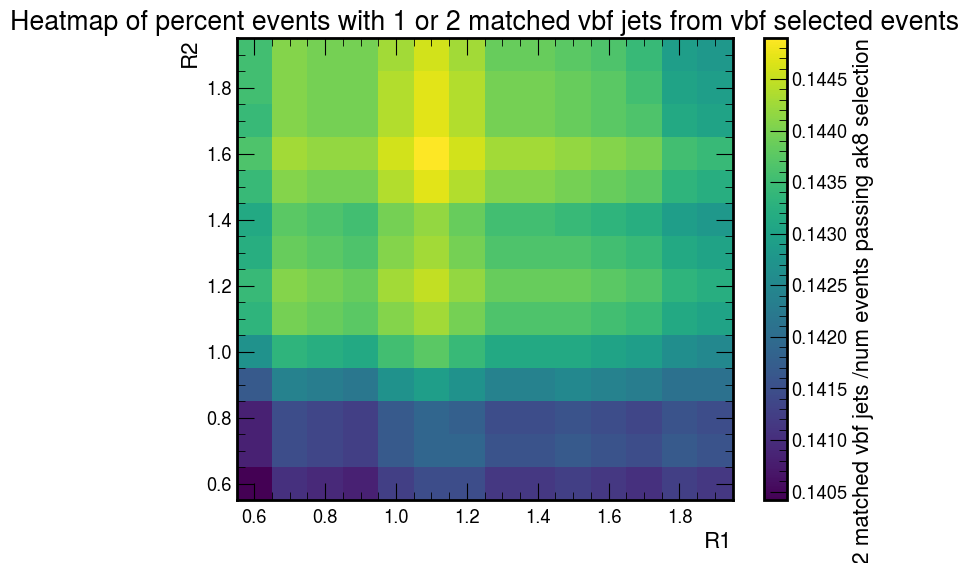

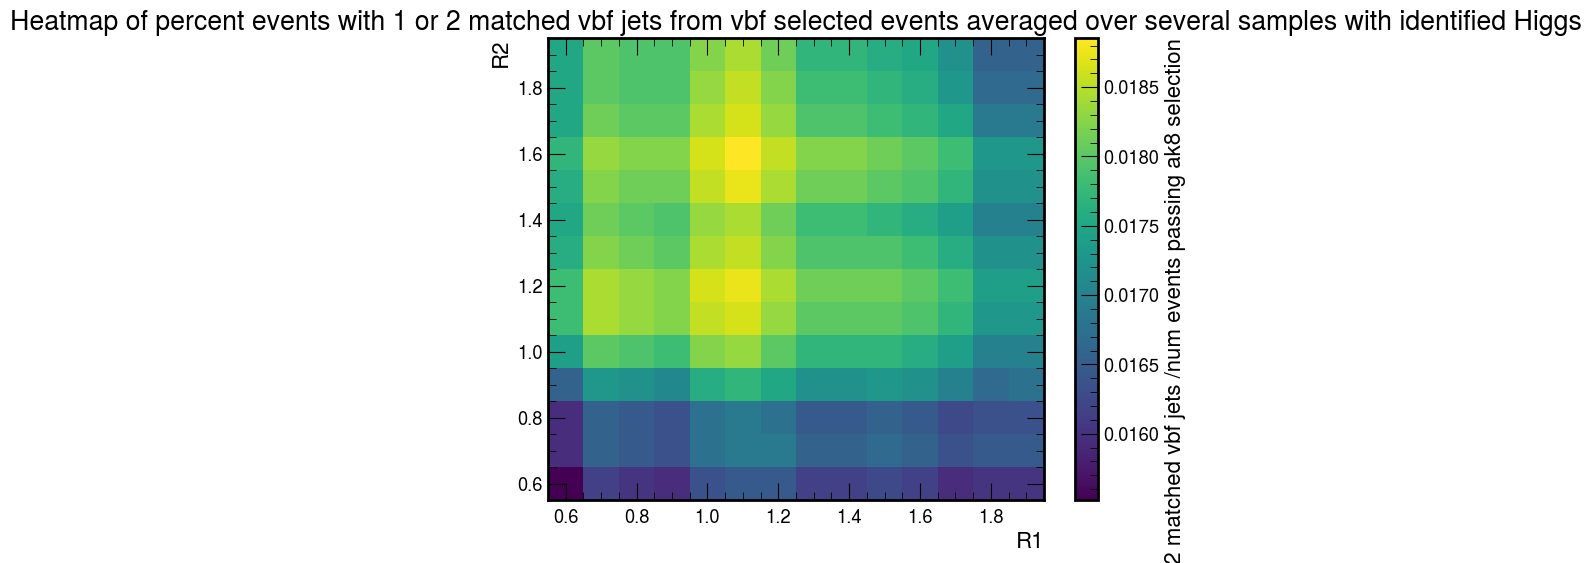

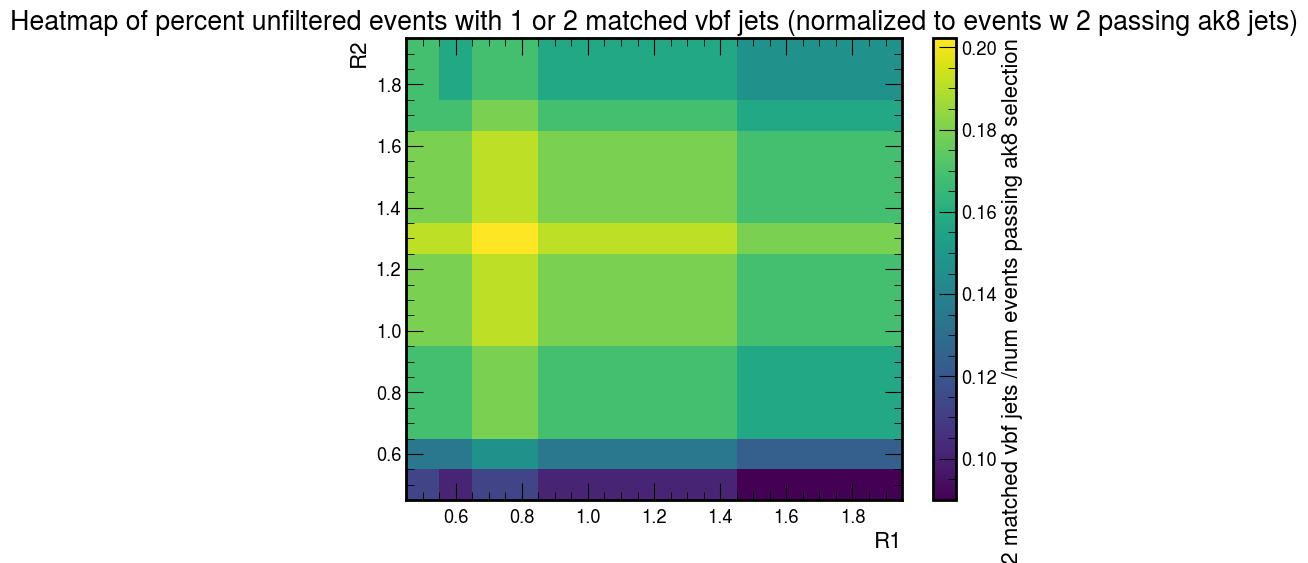

In [87]:
import re
import numpy as np
import matplotlib.pyplot as plt


def parse_log_string(log_string):
    lines = log_string.split("\n")
    data = []
    for line in lines:
        # Match the bracketed list using a regular expression
        match = re.search(r"\[(.*?)\]", line)
        if match:
            # Extract the list and convert it to numbers
            values = list(map(float, match.group(1).split(", ")))
            # Extract count[2], R1, and R2, and calculate count[2]/9600
            data.append([(values[1] + values[2]) / 9600, values[4], values[5]])
    return np.array(data)


def parse_mega_log_string(mega_log_string):
    # Split the mega log string into individual logs
    log_strings = mega_log_string.strip().split("\n\n")
    data = {}
    for log_string in log_strings:
        lines = log_string.split("\n")
        for line in lines:
            # Match the bracketed list using a regular expression
            match = re.search(r"\[(.*?)\]", line)
            if match:
                # Extract the list and convert it to numbers
                values = list(map(float, match.group(1).split(", ")))
                # Extract count[2], R1, and R2, and calculate count[2]/9600
                r1, r2, count = values[4], values[5], (values[1] + values[2]) / 9600
                # Store the values in the data dictionary
                if (r1, r2) in data:
                    data[(r1, r2)].append(count)
                else:
                    data[(r1, r2)] = [count]
    # Average the values for each (R1, R2) pair and convert to a NumPy array
    averaged_data = []
    for key in data:
        averaged_data.append([sum(data[key]) / len(data[key]), key[0], key[1]])
    return np.array(averaged_data)


def parse_log_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    data = []

    for line in lines:
        # Match the bracketed list using a regular expression
        match = re.search(r"\[(.*?)\]", line)
        if match:
            # Extract the list and convert it to numbers
            values = list(map(float, match.group(1).split(", ")))
            # Append the values to the data list
            data.append(values)

    return np.array(data)


def plot_heatmap(data, title="Heatmap of percent unfiltered events with 2 matched vbf jets"):
    # Create a 2D array for the heatmap
    heatmap_data = np.zeros((len(np.unique(data[:, 1])), len(np.unique(data[:, 2]))))
    for row in data:
        # Map the values of R1 and R2 to indices in the heatmap array
        r1_idx = np.where(np.unique(data[:, 1]) == row[1])[0][0]
        r2_idx = np.where(np.unique(data[:, 2]) == row[2])[0][0]
        # Set the heatmap value to count[2]/9600
        heatmap_data[r1_idx, r2_idx] = row[0]

    # Define grid
    x = np.unique(data[:, 2])
    y = np.unique(data[:, 1])
    # Adjust the coordinates to represent the corners of the cells
    x_grid = np.concatenate([x - 0.05, [x[-1] + 0.05]])
    y_grid = np.concatenate([y - 0.05, [y[-1] + 0.05]])

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(x_grid, y_grid, heatmap_data, cmap="viridis", shading="auto")
    plt.colorbar(label="# events w 1 match + 2 matched vbf jets /num events passing ak8 selection")
    plt.xlabel("R1")
    plt.ylabel("R2")
    plt.title(title)
    plt.show()


# data = parse_log_string(log_string)
# plot_heatmap(data,title= 'Heatmap of percent unfiltered events with 1 or 2 matched vbf jets')
# data = parse_log_string(log_string_filtered)
# plot_heatmap(data,title= 'Heatmap of percent vbf selection (no dijet formed) filtered events with 1 or 2 matched vbf jets')
data = parse_log_string(log_string_filtered_full)
plot_heatmap(
    data, title="Heatmap of percent events with 1 or 2 matched vbf jets from vbf selected events"
)
# data = parse_log_string(log_string_filtered_full2)
# plot_heatmap(data,title= 'Heatmap of percent events with 1 or 2 matched vbf jets from vbf selected events')

# data = parse_mega_log_string(mega_log_string_filtered)
# plot_heatmap(data,title= 'Heatmap of percent events with 1 or 2 matched vbf jets from vbf selected events averaged over several samples')

data = parse_log_file("heatmap_selection_success_with_correct_Higgs.txt")
plot_heatmap(
    data,
    title="Heatmap of percent events with 1 or 2 matched vbf jets from vbf selected events averaged over several samples with identified Higgs",
)


data = parse_log_file("heatmap_fatjet_exclusion_ak8selections_normalized_selected.txt")
plot_heatmap(
    data,
    title="Heatmap of percent unfiltered events with 1 or 2 matched vbf jets (normalized to events w 2 passing ak8 jets)",
)

Two functions where I visualize data I collected related to the R2 connection with HVV reconstructed pt.

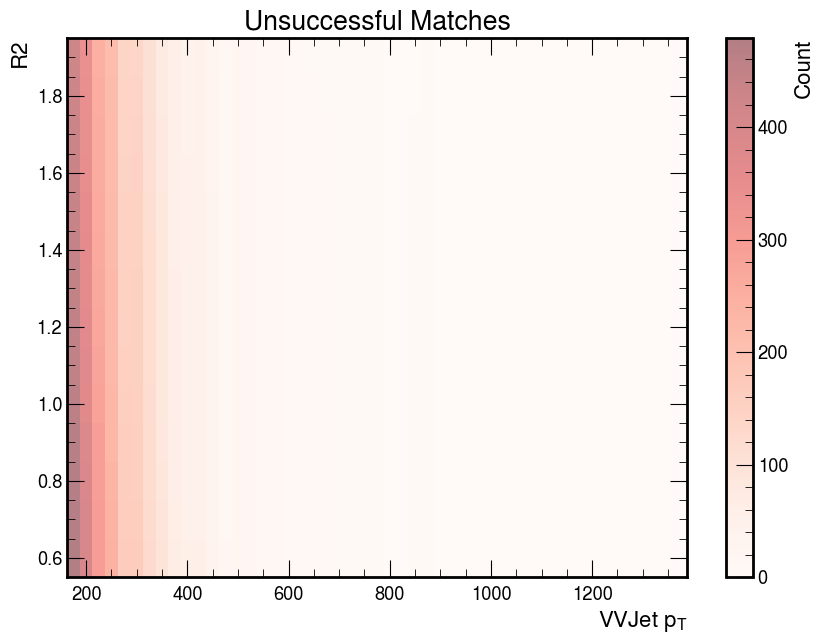

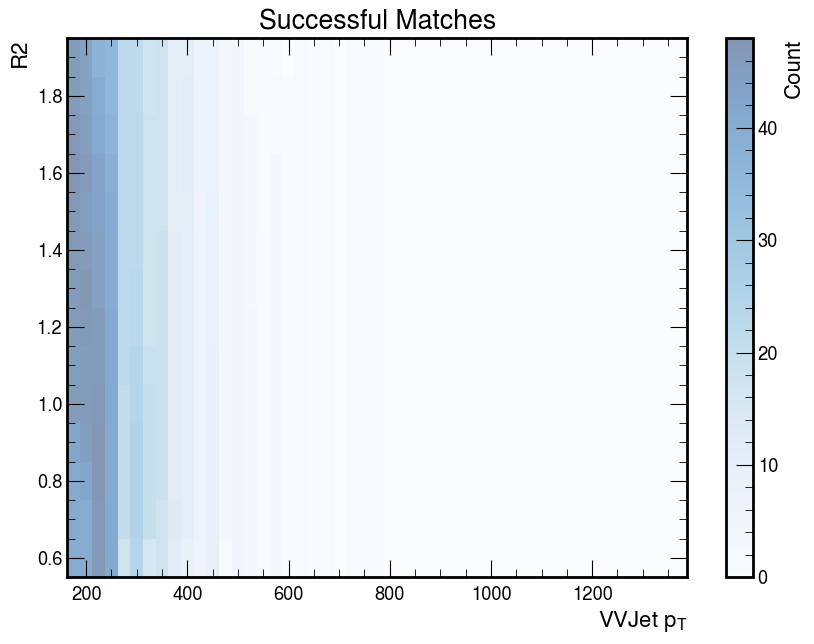

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def plot_data(data):
    # Extract the pt, R2, and match information
    pt = data[:, 0]
    R2 = data[:, 1]
    match = data[:, 2].astype(bool)

    # Define bins
    pt_bins = np.linspace(np.min(pt), np.max(pt), 50)
    R2_bins = np.concatenate((np.array([0.55]), np.arange(0.65, np.max(R2) + 0.1, 0.1)))

    # Create 2D histograms
    plt.figure(figsize=(10, 7))

    # Unsuccessful matches
    hist_unsuccessful, _, _, img = plt.hist2d(
        pt[~match],
        R2[~match],
        bins=[pt_bins, R2_bins],
        cmap="Reds",
        alpha=0.5,
        label="Unsuccessful match",
    )
    plt.colorbar(img, label="Count")
    plt.xlabel("VVJet $p_T$")
    plt.ylabel("R2")
    plt.title("Unsuccessful Matches")
    plt.show()

    # Successful matches
    plt.figure(figsize=(10, 7))
    hist_successful, _, _, img = plt.hist2d(
        pt[match],
        R2[match],
        bins=[pt_bins, R2_bins],
        cmap="Blues",
        alpha=0.5,
        label="Successful match",
    )
    plt.colorbar(img, label="Count")
    plt.xlabel("VVJet $p_T$")
    plt.ylabel("R2")
    plt.title("Successful Matches")
    plt.show()


# Use the function
plot_data(data)

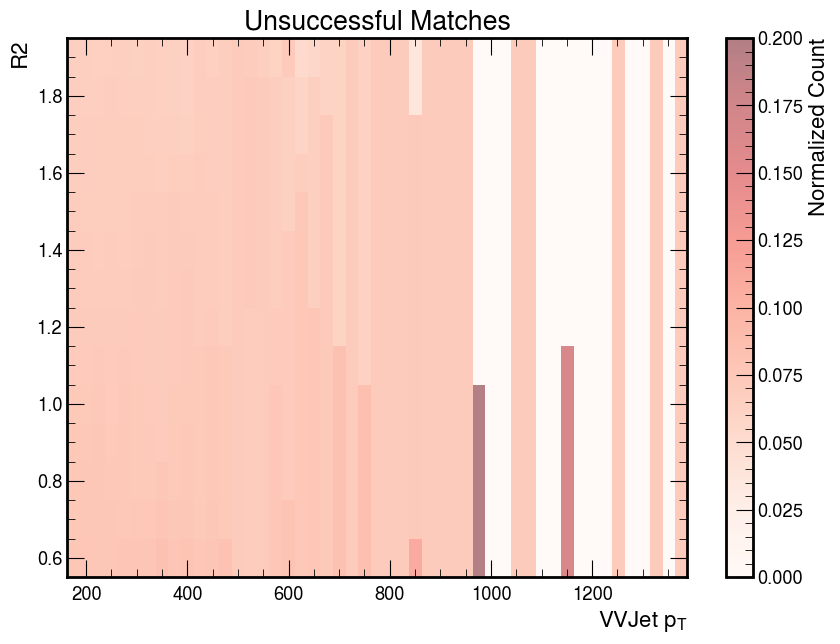

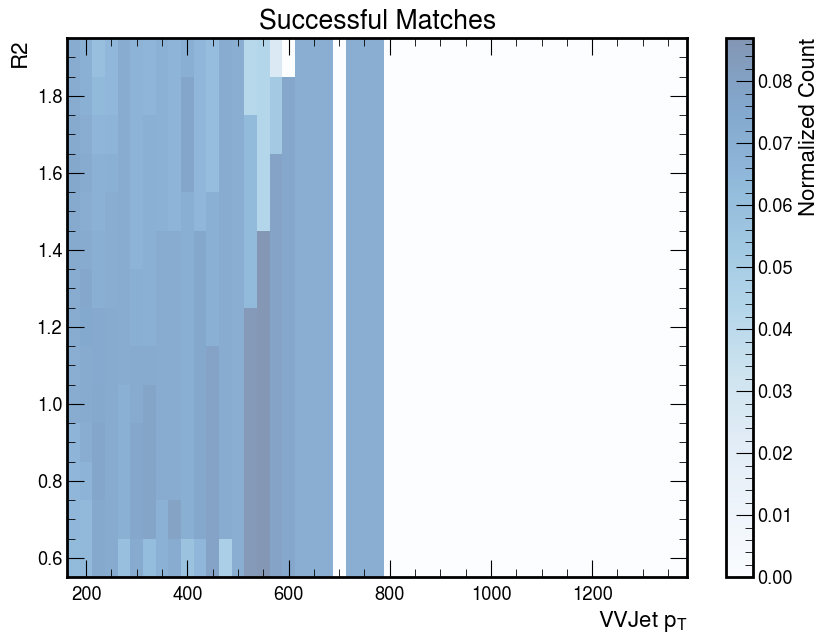

In [11]:
def plot_data(data):
    # Extract the pt, R2, and match information
    pt = data[:, 0]
    R2 = data[:, 1]
    match = data[:, 2].astype(bool)

    # Define bins
    pt_bins = np.linspace(np.min(pt), np.max(pt), 50)
    R2_bins = np.concatenate((np.array([0.55]), np.arange(0.65, np.max(R2) + 0.1, 0.1)))

    # Create 2D histograms
    plt.figure(figsize=(10, 7))

    # Unsuccessful matches
    hist_unsuccessful, _, _ = np.histogram2d(pt[~match], R2[~match], bins=[pt_bins, R2_bins])

    # Normalize the histogram
    hist_unsuccessful = hist_unsuccessful / np.maximum(
        1, hist_unsuccessful.sum(axis=1, keepdims=True)
    )

    # Plot the normalized data
    plt.imshow(
        hist_unsuccessful.T,
        origin="lower",
        aspect="auto",
        extent=[pt_bins[0], pt_bins[-1], R2_bins[0], R2_bins[-1]],
        cmap="Reds",
        alpha=0.5,
    )
    plt.colorbar(label="Normalized Count")
    plt.xlabel("VVJet $p_T$")
    plt.ylabel("R2")
    plt.title("Unsuccessful Matches")
    plt.show()

    # Successful matches
    plt.figure(figsize=(10, 7))
    hist_successful, _, _ = np.histogram2d(pt[match], R2[match], bins=[pt_bins, R2_bins])

    # Normalize the histogram
    hist_successful = hist_successful / np.maximum(1, hist_successful.sum(axis=1, keepdims=True))

    # Plot the normalized data
    plt.imshow(
        hist_successful.T,
        origin="lower",
        aspect="auto",
        extent=[pt_bins[0], pt_bins[-1], R2_bins[0], R2_bins[-1]],
        cmap="Blues",
        alpha=0.5,
    )
    plt.colorbar(label="Normalized Count")
    plt.xlabel("VVJet $p_T$")
    plt.ylabel("R2")
    plt.title("Successful Matches")
    plt.show()


# Use the function
plot_data(data)

In [8]:
import numpy as np


def read_data(filename):
    data = []
    with open(filename, "r") as file:
        for line in file:
            # Remove brackets and newline, and split by comma
            items = line.replace("[", "").replace("]", "").replace("\n", "").split(",")
            # Convert strings to floats and append to data
            data.append([float(item) for item in items])
    return np.array(data)


# Use the function
data = read_data("output.txt")

Next we plot some generator information for the vbf jets. we plot how their R1 and R2s are actually distributed at the start. note that R1 is distance to Hbb and R2 is distance to HVV. These are reconstructed Higgs jets

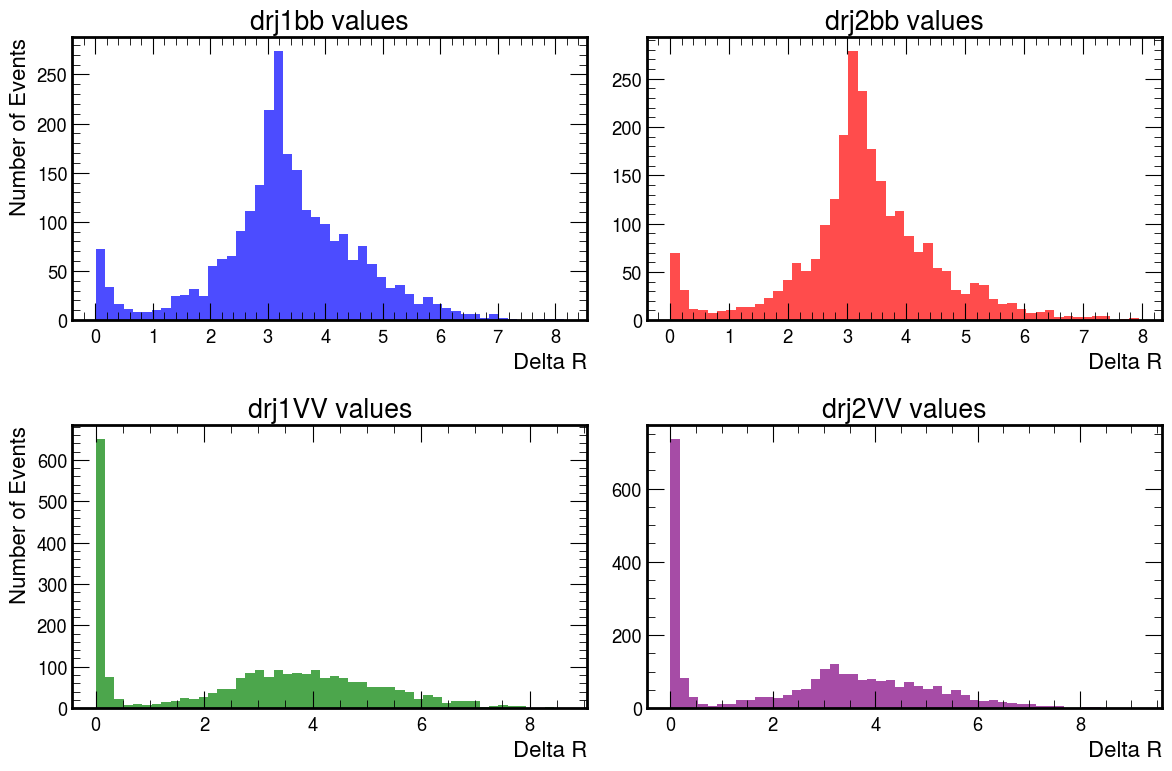

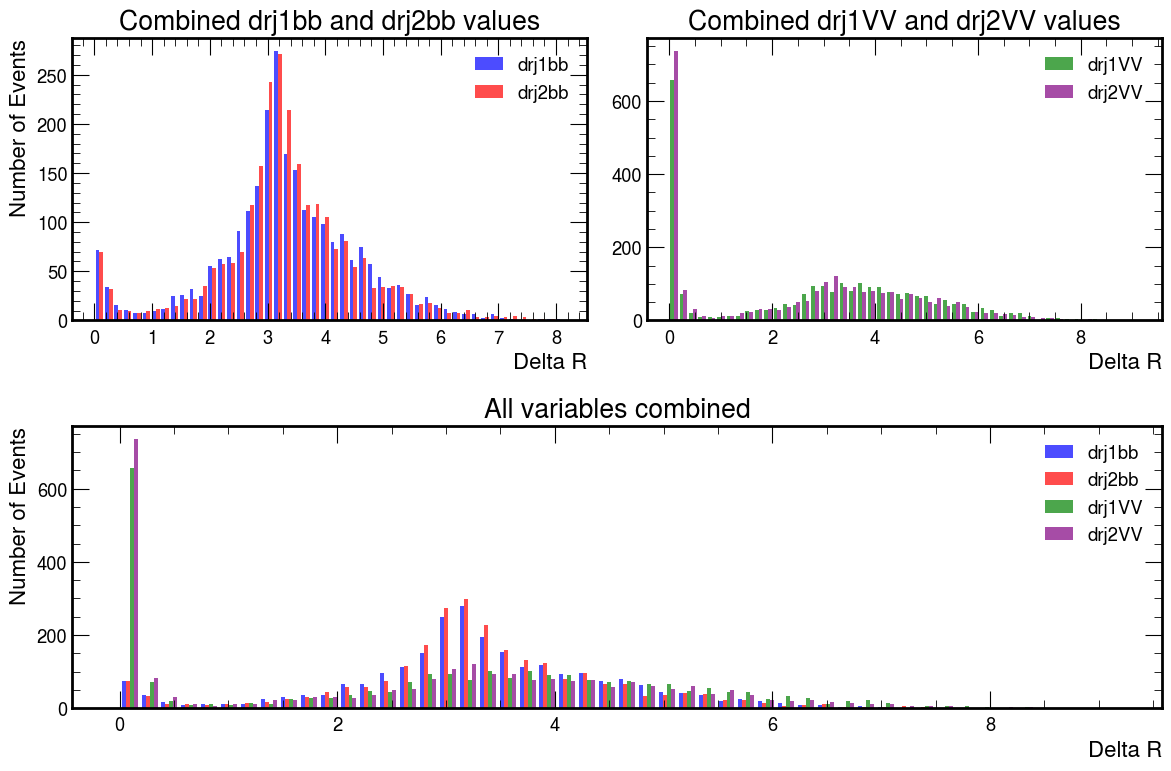

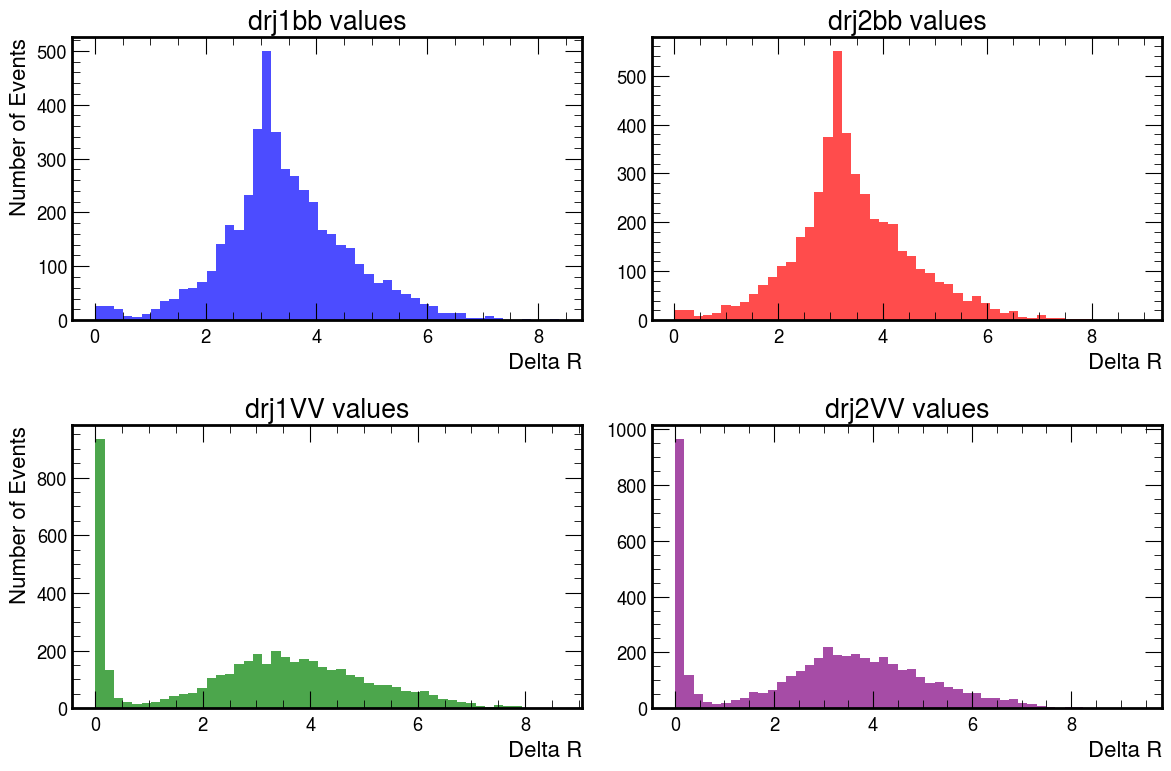

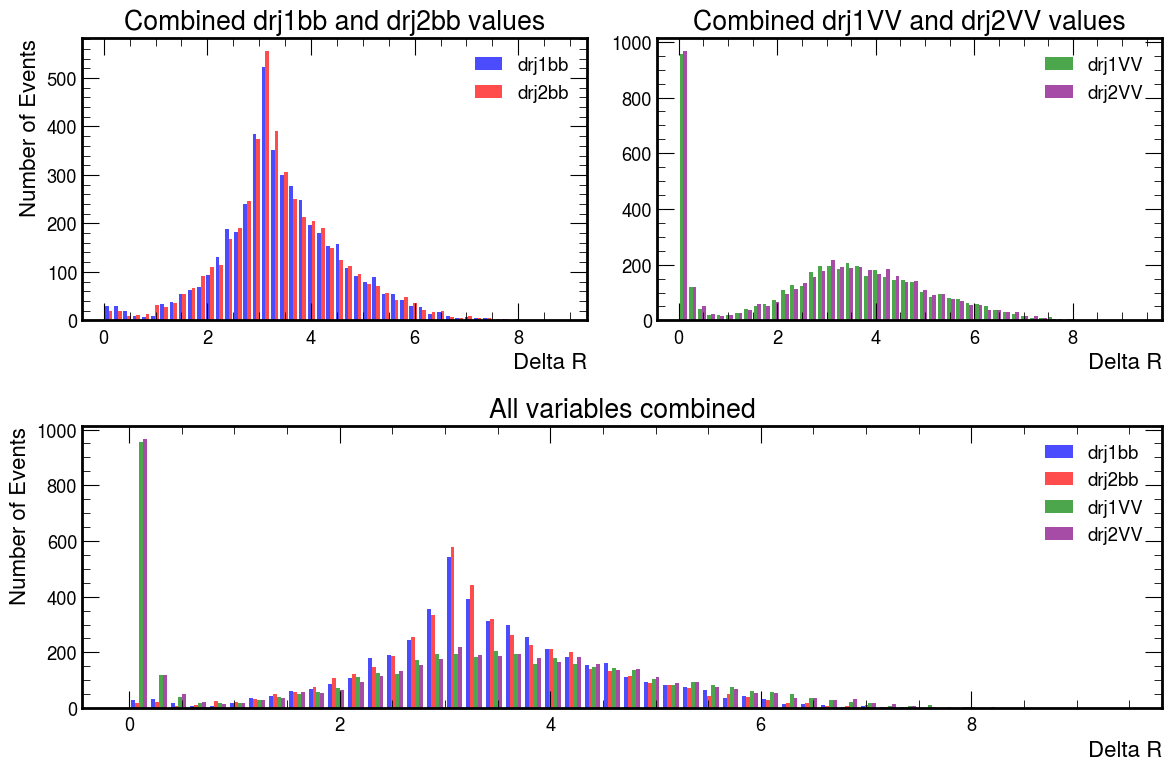

In [19]:
def process_and_plot_refactored(filename):
    # Load the data from the file
    with open(filename, "r") as f:
        lines = f.readlines()

    # Extract the delta R values from the lines
    dr_values = [eval(line.strip()) for line in lines]

    # Create a dictionary to store the data and labels
    data_dict = {
        "drj1bb": {"values": [val[0] for val in dr_values], "color": "blue", "label": "drj1bb"},
        "drj2bb": {"values": [val[1] for val in dr_values], "color": "red", "label": "drj2bb"},
        "drj1VV": {"values": [val[2] for val in dr_values], "color": "green", "label": "drj1VV"},
        "drj2VV": {"values": [val[3] for val in dr_values], "color": "purple", "label": "drj2VV"},
    }

    # Plot individual histograms
    plt.figure(figsize=(12, 8))

    for i, key in enumerate(data_dict.keys()):
        plt.subplot(2, 2, i + 1)
        plt.hist(data_dict[key]["values"], bins=50, color=data_dict[key]["color"], alpha=0.7)
        plt.title(data_dict[key]["label"] + " values")
        plt.xlabel("Delta R")
        if i % 2 == 0:
            plt.ylabel("Number of Events")

    plt.tight_layout()
    plt.show()

    # Combined histograms
    plt.figure(figsize=(12, 8))

    # bb combined
    plt.subplot(2, 2, 1)
    plt.hist(
        [data_dict["drj1bb"]["values"], data_dict["drj2bb"]["values"]],
        bins=50,
        color=[data_dict["drj1bb"]["color"], data_dict["drj2bb"]["color"]],
        label=[data_dict["drj1bb"]["label"], data_dict["drj2bb"]["label"]],
        alpha=0.7,
    )
    plt.title("Combined drj1bb and drj2bb values")
    plt.xlabel("Delta R")
    plt.ylabel("Number of Events")
    plt.legend()

    # VV combined
    plt.subplot(2, 2, 2)
    plt.hist(
        [data_dict["drj1VV"]["values"], data_dict["drj2VV"]["values"]],
        bins=50,
        color=[data_dict["drj1VV"]["color"], data_dict["drj2VV"]["color"]],
        label=[data_dict["drj1VV"]["label"], data_dict["drj2VV"]["label"]],
        alpha=0.7,
    )
    plt.title("Combined drj1VV and drj2VV values")
    plt.xlabel("Delta R")
    plt.legend()

    # All variables combined
    plt.subplot(2, 1, 2)
    plt.hist(
        [data["values"] for data in data_dict.values()],
        bins=50,
        color=[data["color"] for data in data_dict.values()],
        label=[data["label"] for data in data_dict.values()],
        alpha=0.7,
    )
    plt.title("All variables combined")
    plt.xlabel("Delta R")
    plt.ylabel("Number of Events")
    plt.legend()

    plt.tight_layout()
    plt.show()


# The function call remains the same:
process_and_plot_refactored("output_deltaRtruthinfo.txt")
process_and_plot_refactored("output_deltaRtruthinfo_bbtagging.txt")

Plots of generator higgs particle and generator vbf quarks delta R and pt. These are produced from events with absolutely no selections other than pt > 0 maybe some other very basic cuts on Hbb jets

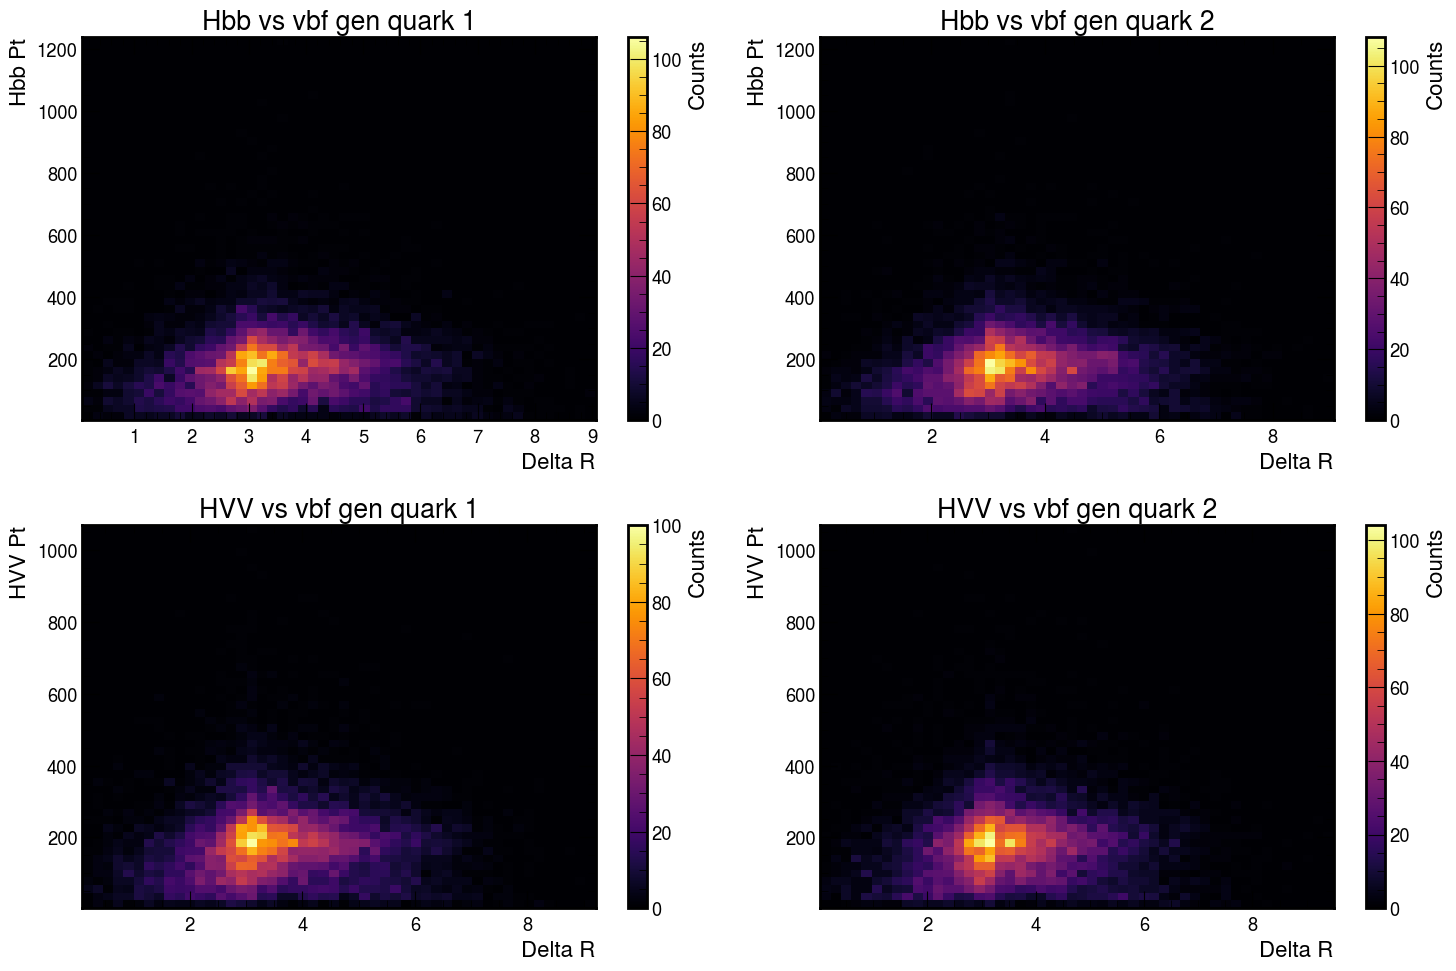

In [14]:
import matplotlib.pyplot as plt


def plot_2d_histograms_from_file(filename):
    # Load the data from the file
    with open(filename, "r") as f:
        lines = f.readlines()

    # Extract the values from the lines
    values = [eval(line.strip()) for line in lines]

    # Extract pt and delta R values
    pt_Hbb = [val[0] for val in values]
    pt_HVV = [val[1] for val in values]
    delta_R_11 = [val[2] for val in values]
    delta_R_12 = [val[3] for val in values]
    delta_R_21 = [val[4] for val in values]
    delta_R_22 = [val[5] for val in values]

    # Plotting
    plt.figure(figsize=(15, 10))

    # Hbb with vbf gen quark 1
    plt.subplot(2, 2, 1)
    plt.hist2d(delta_R_11, pt_Hbb, bins=50, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("Hbb vs vbf gen quark 1")
    plt.xlabel("Delta R")
    plt.ylabel("Hbb Pt")

    # Hbb with vbf gen quark 2
    plt.subplot(2, 2, 2)
    plt.hist2d(delta_R_12, pt_Hbb, bins=50, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("Hbb vs vbf gen quark 2")
    plt.xlabel("Delta R")
    plt.ylabel("Hbb Pt")

    # HVV with vbf gen quark 1
    plt.subplot(2, 2, 3)
    plt.hist2d(delta_R_21, pt_HVV, bins=50, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("HVV vs vbf gen quark 1")
    plt.xlabel("Delta R")
    plt.ylabel("HVV Pt")

    # HVV with vbf gen quark 2
    plt.subplot(2, 2, 4)
    plt.hist2d(delta_R_22, pt_HVV, bins=50, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("HVV vs vbf gen quark 2")
    plt.xlabel("Delta R")
    plt.ylabel("HVV Pt")

    plt.tight_layout()
    plt.show()


# To visualize the histograms, you can call:
# plot_2d_histograms_from_file_updated('output_file.txt')

# To visualize the histograms, you can call:
# plot_2d_histograms_from_file('output_file.txt')

plot_2d_histograms_from_file("outputR2vsPtgenHH_posptreq.txt")

Plots above but integrated. shows the same information basically.

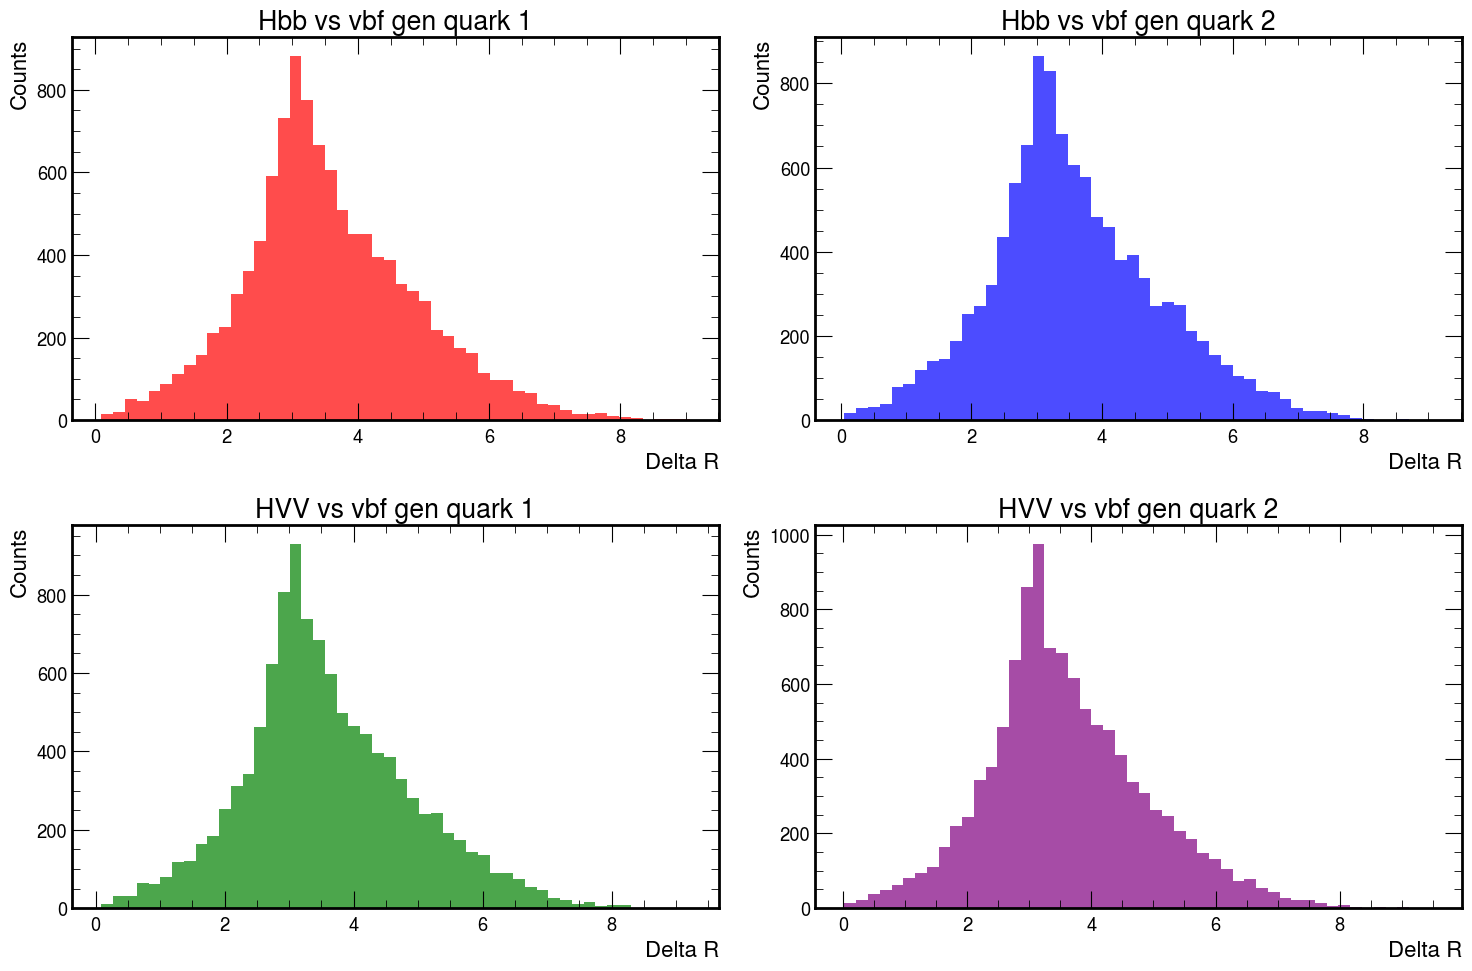

In [16]:
def plot_1d_histograms_from_file(filename):
    # Load the data from the file
    with open(filename, "r") as f:
        lines = f.readlines()

    # Extract the values from the lines
    values = [eval(line.strip()) for line in lines]

    # Extract delta R values
    delta_R_11 = [val[2] for val in values]
    delta_R_12 = [val[3] for val in values]
    delta_R_21 = [val[4] for val in values]
    delta_R_22 = [val[5] for val in values]

    # Plotting
    plt.figure(figsize=(15, 10))

    # Hbb with vbf gen quark 1
    plt.subplot(2, 2, 1)
    plt.hist(delta_R_11, bins=50, color="red", alpha=0.7)
    plt.title("Hbb vs vbf gen quark 1")
    plt.xlabel("Delta R")
    plt.ylabel("Counts")

    # Hbb with vbf gen quark 2
    plt.subplot(2, 2, 2)
    plt.hist(delta_R_12, bins=50, color="blue", alpha=0.7)
    plt.title("Hbb vs vbf gen quark 2")
    plt.xlabel("Delta R")
    plt.ylabel("Counts")

    # HVV with vbf gen quark 1
    plt.subplot(2, 2, 3)
    plt.hist(delta_R_21, bins=50, color="green", alpha=0.7)
    plt.title("HVV vs vbf gen quark 1")
    plt.xlabel("Delta R")
    plt.ylabel("Counts")

    # HVV with vbf gen quark 2
    plt.subplot(2, 2, 4)
    plt.hist(delta_R_22, bins=50, color="purple", alpha=0.7)
    plt.title("HVV vs vbf gen quark 2")
    plt.xlabel("Delta R")
    plt.ylabel("Counts")

    plt.tight_layout()
    plt.show()


# Call the function to visualize the histograms
plot_1d_histograms_from_file("outputR2vsPtgenHH_posptreq.txt")

Same data as above but now looking at the tagging scores.

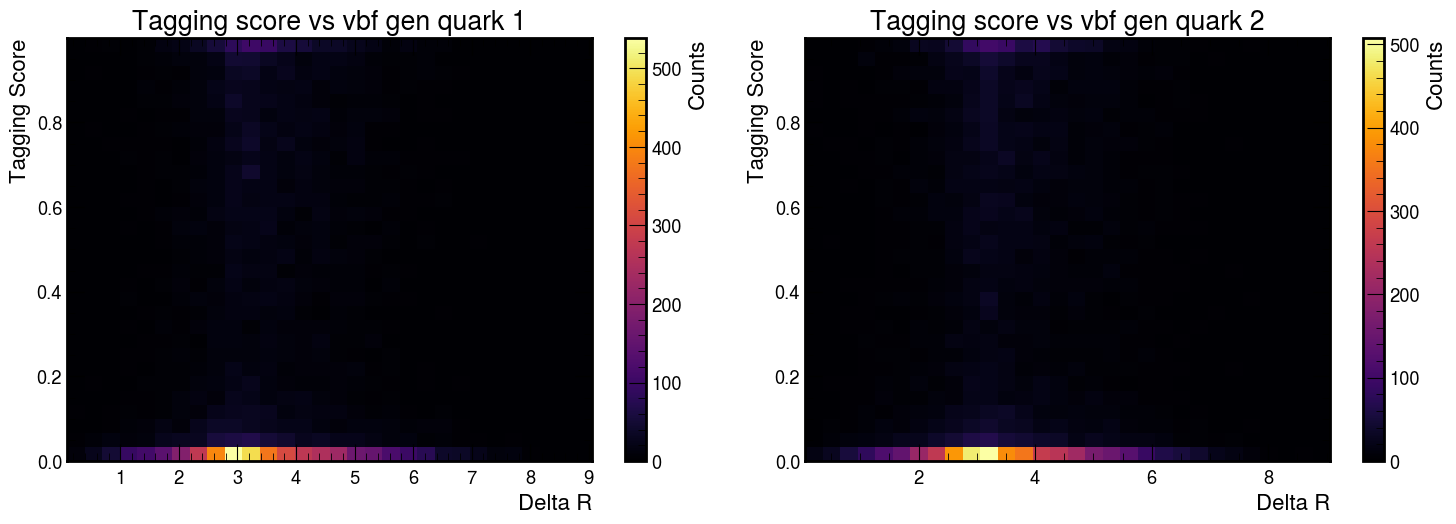

In [15]:
def plot_2d_histograms_with_score(filename):
    # Load the data from the file
    with open(filename, "r") as f:
        lines = f.readlines()

    # Extract the values from the lines
    values = [eval(line.strip()) for line in lines]

    # Extract pt, delta R values and tagging score
    pt_HVV = [val[1] for val in values]
    delta_R_11 = [val[2] for val in values]
    delta_R_12 = [val[3] for val in values]
    delta_R_21 = [val[4] for val in values]
    delta_R_22 = [val[5] for val in values]
    tagging_score = [val[6] for val in values]

    # Plotting
    plt.figure(figsize=(15, 10))

    # Tagging score with vbf gen quark 1
    plt.subplot(2, 2, 1)
    plt.hist2d(delta_R_11, tagging_score, bins=30, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("Tagging score vs vbf gen quark 1")
    plt.xlabel("Delta R")
    plt.ylabel("Tagging Score")

    # Tagging score with vbf gen quark 2
    plt.subplot(2, 2, 2)
    plt.hist2d(delta_R_12, tagging_score, bins=30, cmap="inferno")
    plt.colorbar(label="Counts")
    plt.title("Tagging score vs vbf gen quark 2")
    plt.xlabel("Delta R")
    plt.ylabel("Tagging Score")

    plt.tight_layout()
    plt.show()


# To visualize the histograms, you can call:
# plot_2d_histograms_with_score('output_file.txt')
plot_2d_histograms_with_score("outputR2vsPtgenHH_posptreq.txt")

Using bbVVskimmer output to graph deltaR vs respective higgs tagging. We want to see what is causing weird shape in delta R distributions when I do no vbf-fatjet exclusion.

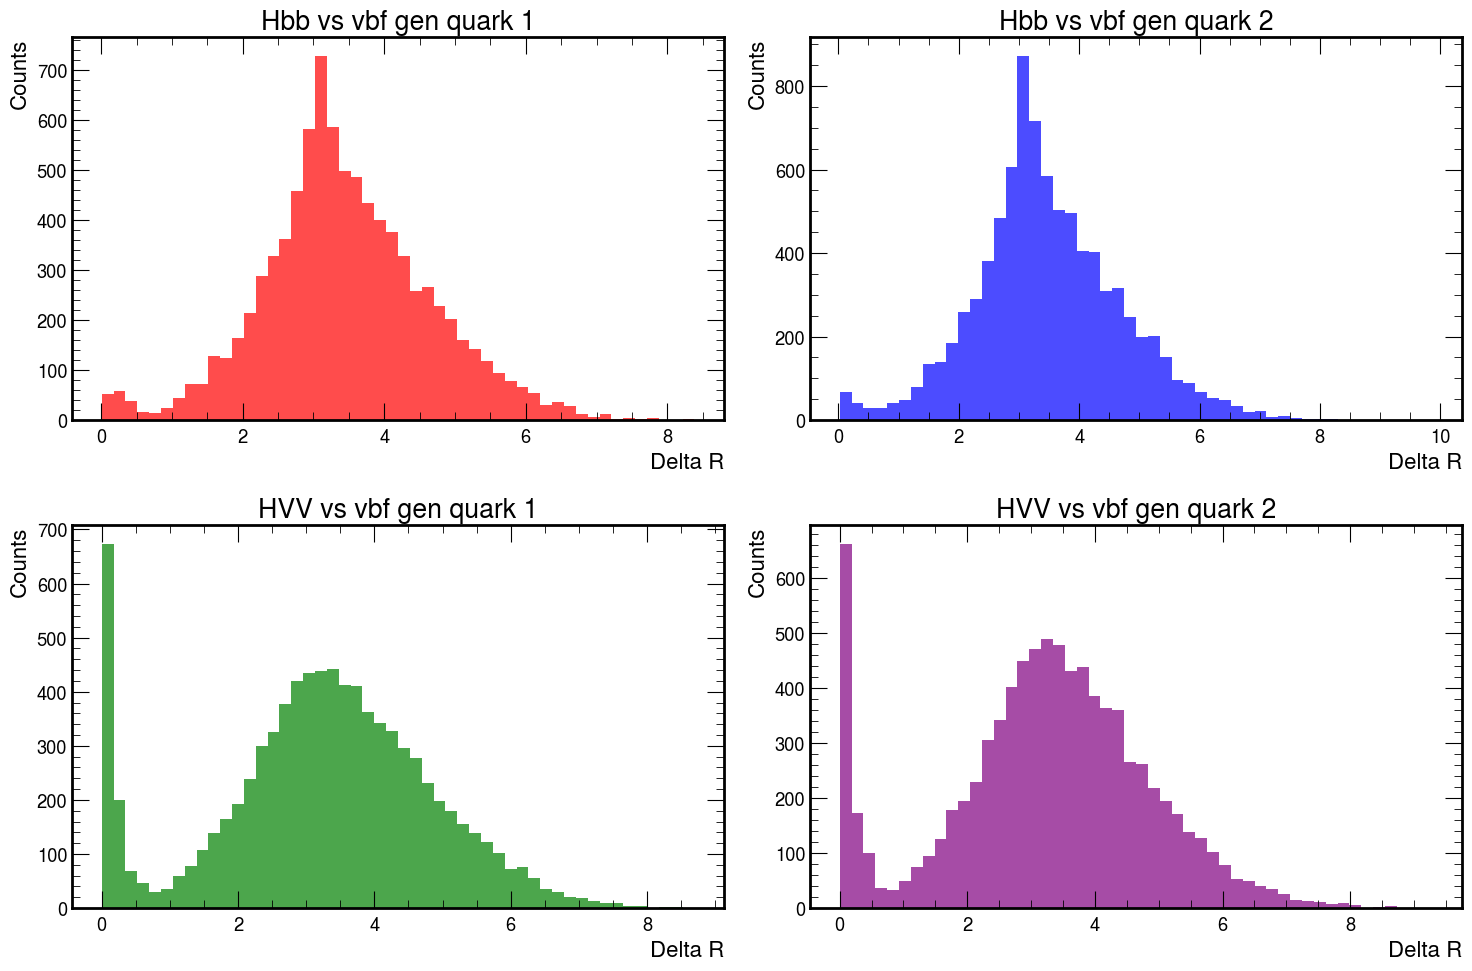

Number of Hbb jets: 8681
Number of HVV jets: 8681
Total number of events: 8681
Average for Hbb: 0.9658018059341085
Average for HVV: 0.08863406942842983


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_parquet("0-30.parquet")

# Create a mask for Hbb
Hbb_mask = df[("ak8FatJetParticleNetMD_Txbb", 0)] > df[("ak8FatJetParticleNetMD_Txbb", 1)]

# Extract Hbb and HVV values based on the mask
Hbb_Txbb_values_0 = df[Hbb_mask][("ak8FatJetParticleNetMD_Txbb", 0)]
Hbb_Txbb_values_1 = df[~Hbb_mask][("ak8FatJetParticleNetMD_Txbb", 1)]
HVV_Txbb_values_0 = df[~Hbb_mask][("ak8FatJetParticleNetMD_Txbb", 0)]
HVV_Txbb_values_1 = df[Hbb_mask][("ak8FatJetParticleNetMD_Txbb", 1)]

# Concatenate to get complete values for Hbb and HVV
Hbb_Txbb_values = pd.concat([Hbb_Txbb_values_0, Hbb_Txbb_values_1])
HVV_Txbb_values = pd.concat([HVV_Txbb_values_0, HVV_Txbb_values_1])


# Compute delta R for each combination
def delta_r(eta1, phi1, eta2, phi2):
    deta = eta1 - eta2
    dphi = np.pi - np.abs(np.abs(phi1 - phi2) - np.pi)
    return np.sqrt(deta**2 + dphi**2)


# Compute all possible delta R combinations
delta_R_jet0_gen1 = delta_r(
    df[("ak8FatJetEta", 0)], df[("ak8FatJetPhi", 0)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet0_gen2 = delta_r(
    df[("ak8FatJetEta", 0)], df[("ak8FatJetPhi", 0)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)
delta_R_jet1_gen1 = delta_r(
    df[("ak8FatJetEta", 1)], df[("ak8FatJetPhi", 1)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet1_gen2 = delta_r(
    df[("ak8FatJetEta", 1)], df[("ak8FatJetPhi", 1)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)

# Assign delta R values to Hbb and HVV based on the Hbb mask
df["delta_R_Hbb_gen1"] = np.where(Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_Hbb_gen2"] = np.where(Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)
df["delta_R_HVV_gen1"] = np.where(~Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_HVV_gen2"] = np.where(~Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)


# Plot histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["delta_R_Hbb_gen1"], bins=50, color="red", alpha=0.7)
plt.title("Hbb vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 2)
plt.hist(df["delta_R_Hbb_gen2"], bins=50, color="blue", alpha=0.7)
plt.title("Hbb vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 3)
plt.hist(df["delta_R_HVV_gen1"], bins=50, color="green", alpha=0.7)
plt.title("HVV vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 4)
plt.hist(df["delta_R_HVV_gen2"], bins=50, color="purple", alpha=0.7)
plt.title("HVV vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()

# Debugging/Printing statements
print("Number of Hbb jets:", len(Hbb_Txbb_values))
print("Number of HVV jets:", len(HVV_Txbb_values))
print("Total number of events:", len(df))
print("Average for Hbb:", Hbb_Txbb_values.mean())
print("Average for HVV:", HVV_Txbb_values.mean())

Same thing but applying tagging selections: (Hbb_Txbb_values >= 0.95) & (HVV_Th4q_values >= 0.6) note that this second tagging score is old. new one with parT

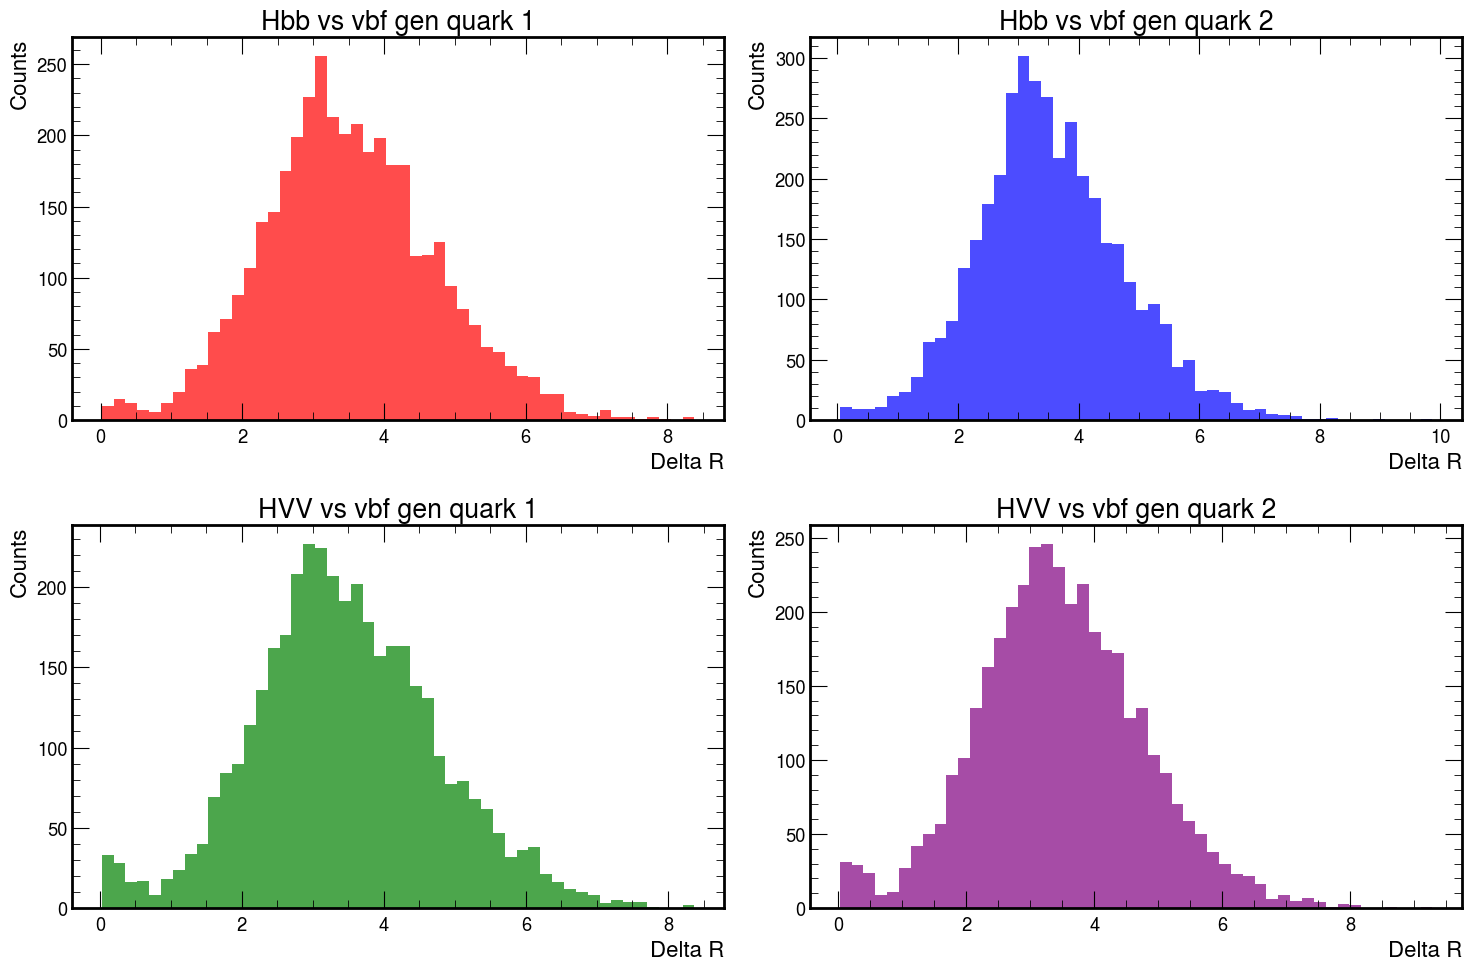

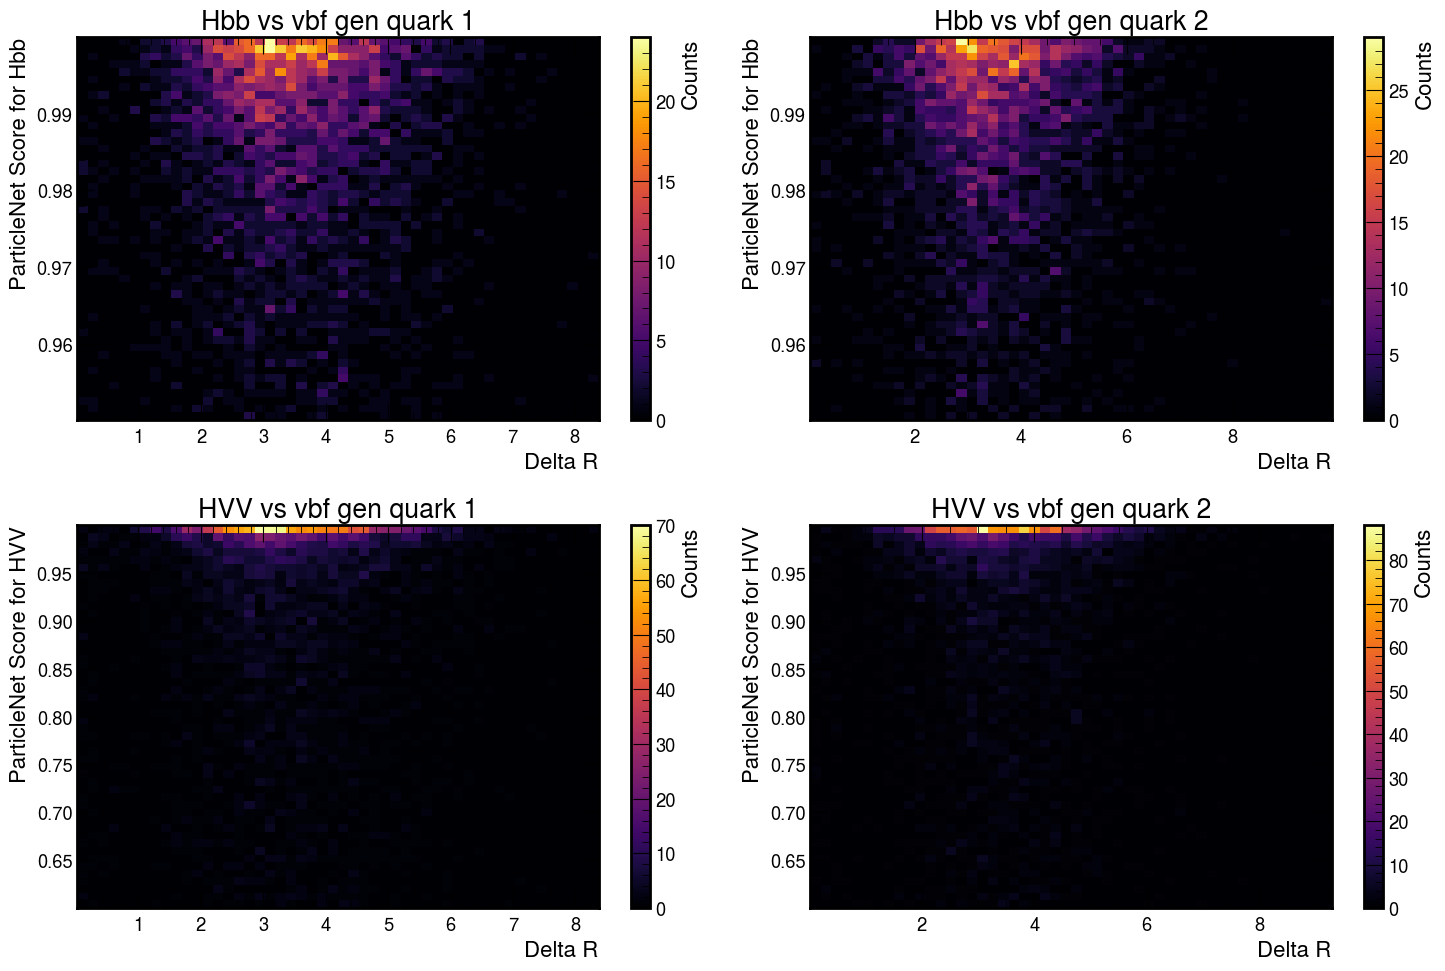

[0.99365234 0.92480469 0.97509766 ... 0.99511719 0.85839844 0.99511719]


In [74]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet("0-30.parquet")


# Create a mask for Hbb
Hbb_mask = df[("ak8FatJetParticleNetMD_Txbb", 0)] > df[("ak8FatJetParticleNetMD_Txbb", 1)]


# Compute delta R for each combination
def delta_r(eta1, phi1, eta2, phi2):
    deta = eta1 - eta2
    dphi = np.pi - np.abs(np.abs(phi1 - phi2) - np.pi)
    return np.sqrt(deta**2 + dphi**2)


# Compute all possible delta R combinations
delta_R_jet0_gen1 = delta_r(
    df[("ak8FatJetEta", 0)], df[("ak8FatJetPhi", 0)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet0_gen2 = delta_r(
    df[("ak8FatJetEta", 0)], df[("ak8FatJetPhi", 0)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)
delta_R_jet1_gen1 = delta_r(
    df[("ak8FatJetEta", 1)], df[("ak8FatJetPhi", 1)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet1_gen2 = delta_r(
    df[("ak8FatJetEta", 1)], df[("ak8FatJetPhi", 1)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)

# Assign delta R values to Hbb and HVV based on the Hbb mask
df["delta_R_Hbb_gen1"] = np.where(Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_Hbb_gen2"] = np.where(Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)
df["delta_R_HVV_gen1"] = np.where(~Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_HVV_gen2"] = np.where(~Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)


# Correctly extract the Txbb values for Hbb
Hbb_Txbb_values = np.where(
    Hbb_mask, df[("ak8FatJetParticleNetMD_Txbb", 0)], df[("ak8FatJetParticleNetMD_Txbb", 1)]
)

# Correctly extract the Th4q values for HVV
# HVV_Th4q_values = np.where(~Hbb_mask, df[('ak8FatJetParTMD_THWWvsT', 0)], df[('ak8FatJetParTMD_THWWvsT', 1)])
HVV_Th4q_values = np.where(
    ~Hbb_mask, df[("ak8FatJetParticleNet_Th4q", 0)], df[("ak8FatJetParticleNet_Th4q", 1)]
)

# Apply selection criteria
selection_mask = (Hbb_Txbb_values >= 0.95) & (HVV_Th4q_values >= 0.6)
# selection_mask = (Hbb_Txbb_values>= 0.8)
df = df[selection_mask]
Hbb_Txbb_values = Hbb_Txbb_values[selection_mask]
HVV_Th4q_values = HVV_Th4q_values[selection_mask]

# Extract Delta R values for the events satisfying the mask conditions
delta_R_Hbb_gen1_values = df["delta_R_Hbb_gen1"]
delta_R_Hbb_gen2_values = df["delta_R_Hbb_gen2"]
delta_R_HVV_gen1_values = df["delta_R_HVV_gen1"]
delta_R_HVV_gen2_values = df["delta_R_HVV_gen2"]


# Plot histograms 1d histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["delta_R_Hbb_gen1"], bins=50, color="red", alpha=0.7)
plt.title("Hbb vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 2)
plt.hist(df["delta_R_Hbb_gen2"], bins=50, color="blue", alpha=0.7)
plt.title("Hbb vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 3)
plt.hist(df["delta_R_HVV_gen1"], bins=50, color="green", alpha=0.7)
plt.title("HVV vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 4)
plt.hist(df["delta_R_HVV_gen2"], bins=50, color="purple", alpha=0.7)
plt.title("HVV vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()


# Plotting heatmaps
plt.figure(figsize=(15, 10))

# Hbb with vbf gen quark 1
plt.subplot(2, 2, 1)
plt.hist2d(delta_R_Hbb_gen1_values, Hbb_Txbb_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("Hbb vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for Hbb")

# Hbb with vbf gen quark 2
plt.subplot(2, 2, 2)
plt.hist2d(delta_R_Hbb_gen2_values, Hbb_Txbb_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("Hbb vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for Hbb")

# HVV with vbf gen quark 1
plt.subplot(2, 2, 3)
plt.hist2d(delta_R_HVV_gen1_values, HVV_Th4q_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("HVV vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for HVV")

# HVV with vbf gen quark 2
plt.subplot(2, 2, 4)
plt.hist2d(delta_R_HVV_gen2_values, HVV_Th4q_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("HVV vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for HVV")

plt.tight_layout()
plt.show()

print(HVV_Th4q_values)

Now we can plot the gen information for the fully filtered events and see if the shapes have changed at all. score cuts also applied.

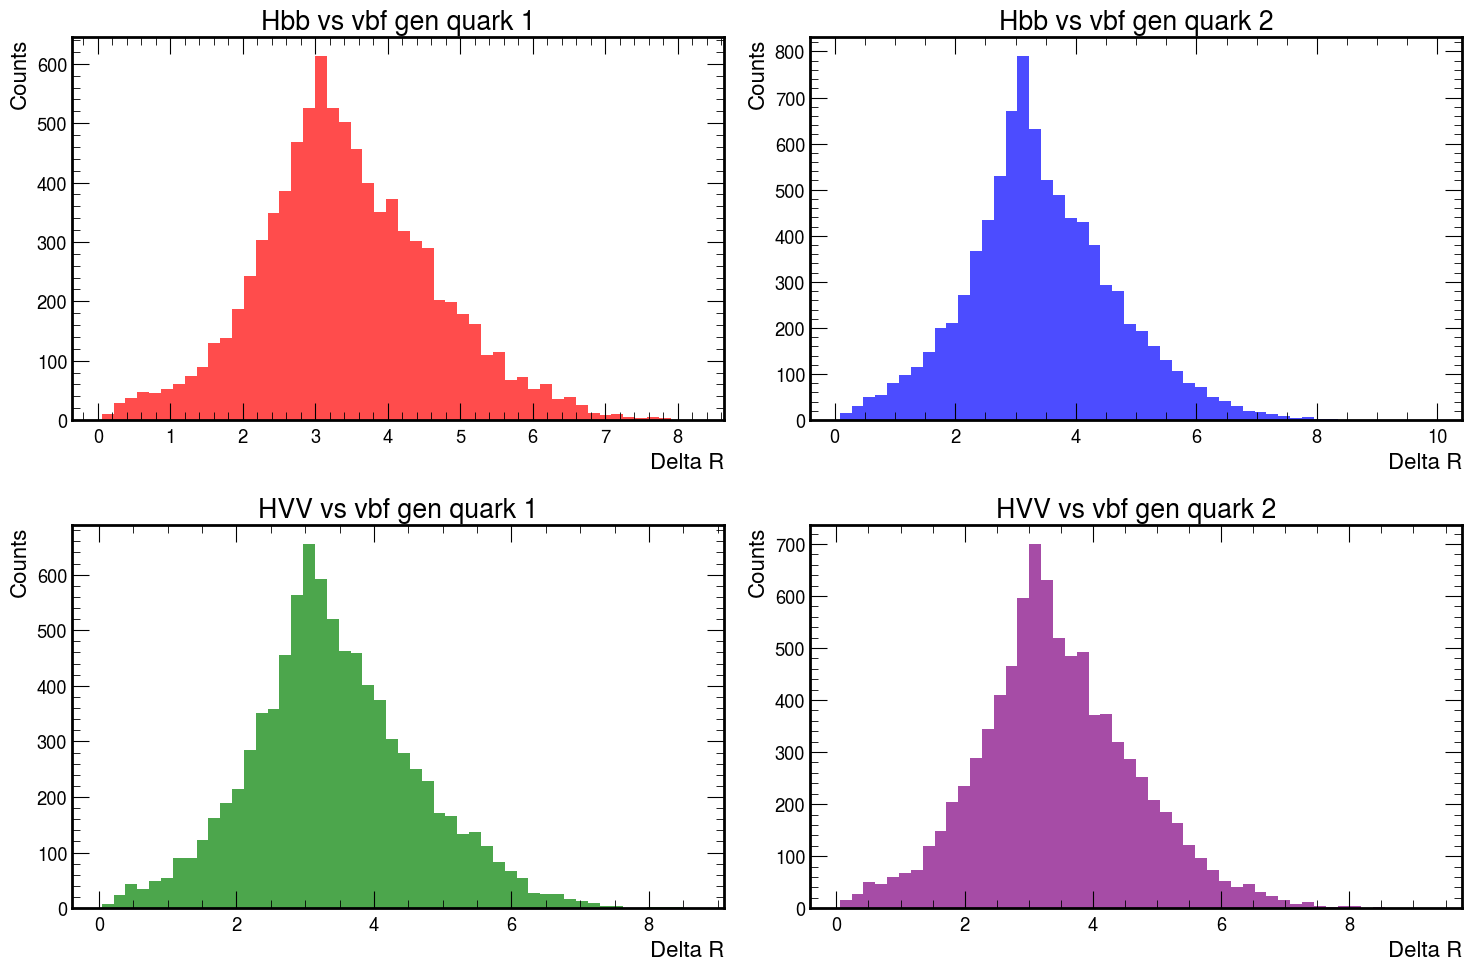

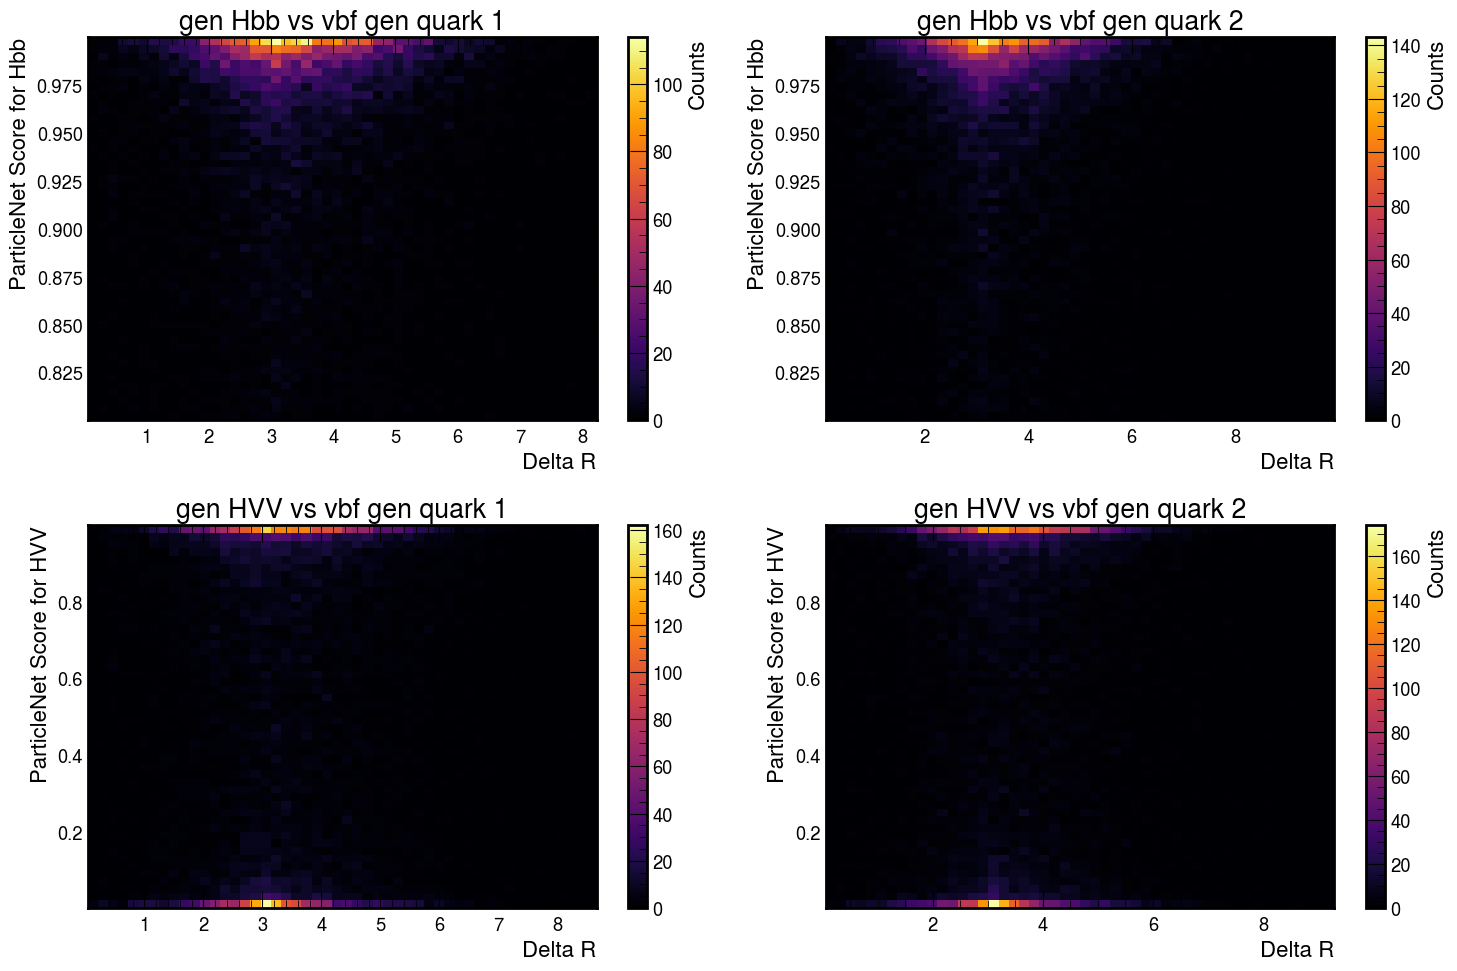

In [21]:
import numpy as np  # turn this into R1 R2 graphs
import matplotlib.pyplot as plt

df = pd.read_parquet("0-30.parquet")

# Create a mask for Hbb
Hbb_gen_mask = df[("GenHiggsChildren", 0)] == 5

# Create a mask for Hbb
Hbb_mask = df[("ak8FatJetParticleNetMD_Txbb", 0)] > df[("ak8FatJetParticleNetMD_Txbb", 1)]


# Compute delta R for each combination
def delta_r(eta1, phi1, eta2, phi2):
    deta = eta1 - eta2
    dphi = np.pi - np.abs(np.abs(phi1 - phi2) - np.pi)
    return np.sqrt(deta**2 + dphi**2)


# Compute all possible delta R combinations
delta_R_jet0_gen1 = delta_r(
    df[("GenHiggsEta", 0)], df[("GenHiggsPhi", 0)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet0_gen2 = delta_r(
    df[("GenHiggsEta", 0)], df[("GenHiggsPhi", 0)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)
delta_R_jet1_gen1 = delta_r(
    df[("GenHiggsEta", 1)], df[("GenHiggsPhi", 1)], df[("vbfetaGen", 0)], df[("vbfphiGen", 0)]
)
delta_R_jet1_gen2 = delta_r(
    df[("GenHiggsEta", 1)], df[("GenHiggsPhi", 1)], df[("vbfetaGen", 1)], df[("vbfphiGen", 1)]
)

# Assign delta R values to Hbb and HVV based on the Hbb mask
df["delta_R_Hbb_gen1"] = np.where(Hbb_gen_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_Hbb_gen2"] = np.where(Hbb_gen_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)
df["delta_R_HVV_gen1"] = np.where(~Hbb_gen_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_HVV_gen2"] = np.where(~Hbb_gen_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)

# Assign delta R values to Hbb and HVV based on the Hbb mask
df["delta_R_Hbb_gen1"] = np.where(Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_Hbb_gen2"] = np.where(Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)
df["delta_R_HVV_gen1"] = np.where(~Hbb_mask, delta_R_jet0_gen1, delta_R_jet1_gen1)
df["delta_R_HVV_gen2"] = np.where(~Hbb_mask, delta_R_jet0_gen2, delta_R_jet1_gen2)


# Correctly extract the Txbb values for Hbb
Hbb_Txbb_values = np.where(
    Hbb_mask, df[("ak8FatJetParticleNetMD_Txbb", 0)], df[("ak8FatJetParticleNetMD_Txbb", 1)]
)

# Correctly extract the Th4q values for HVV
# HVV_Th4q_values = np.where(~Hbb_mask, df[('ak8FatJetParTMD_THWWvsT', 0)], df[('ak8FatJetParTMD_THWWvsT', 1)])
HVV_Th4q_values = np.where(
    ~Hbb_mask, df[("ak8FatJetParticleNet_Th4q", 0)], df[("ak8FatJetParticleNet_Th4q", 1)]
)

# Apply selection criteria
if False:
    selection_mask = (Hbb_Txbb_values >= 0.95) & (HVV_Th4q_values >= 0.6)
    df = df[selection_mask]
    Hbb_Txbb_values = Hbb_Txbb_values[selection_mask]
    HVV_Th4q_values = HVV_Th4q_values[selection_mask]

selection_mask = Hbb_Txbb_values >= 0.8
df = df[selection_mask]
Hbb_Txbb_values = Hbb_Txbb_values[selection_mask]
HVV_Th4q_values = HVV_Th4q_values[selection_mask]
print(HVV_Th4q_values)

# Extract Delta R values for the events satisfying the mask conditions
delta_R_Hbb_gen1_values = df["delta_R_Hbb_gen1"]
delta_R_Hbb_gen2_values = df["delta_R_Hbb_gen2"]
delta_R_HVV_gen1_values = df["delta_R_HVV_gen1"]
delta_R_HVV_gen2_values = df["delta_R_HVV_gen2"]


# Plot histograms 1d histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["delta_R_Hbb_gen1"], bins=50, color="red", alpha=0.7)
plt.title("Hbb vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 2)
plt.hist(df["delta_R_Hbb_gen2"], bins=50, color="blue", alpha=0.7)
plt.title("Hbb vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 3)
plt.hist(df["delta_R_HVV_gen1"], bins=50, color="green", alpha=0.7)
plt.title("HVV vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.subplot(2, 2, 4)
plt.hist(df["delta_R_HVV_gen2"], bins=50, color="purple", alpha=0.7)
plt.title("HVV vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()


# Plotting heatmaps
plt.figure(figsize=(15, 10))

# Hbb with vbf gen quark 1
plt.subplot(2, 2, 1)
plt.hist2d(delta_R_Hbb_gen1_values, Hbb_Txbb_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("gen Hbb vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for Hbb")

# Hbb with vbf gen quark 2
plt.subplot(2, 2, 2)
plt.hist2d(delta_R_Hbb_gen2_values, Hbb_Txbb_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("gen Hbb vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for Hbb")

# HVV with vbf gen quark 1
plt.subplot(2, 2, 3)
plt.hist2d(delta_R_HVV_gen1_values, HVV_Th4q_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("gen HVV vs vbf gen quark 1")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for HVV")

# HVV with vbf gen quark 2
plt.subplot(2, 2, 4)
plt.hist2d(delta_R_HVV_gen2_values, HVV_Th4q_values, bins=50, cmap="inferno")
plt.colorbar(label="Counts")
plt.title("gen HVV vs vbf gen quark 2")
plt.xlabel("Delta R")
plt.ylabel("ParticleNet Score for HVV")

plt.tight_layout()
plt.show()

In [61]:
df

GenHiggsEta           GenHiggsPhi           GenHiggsMass         \
               0         1           0         1            0      1   
0       0.095215  2.210938    0.742188 -2.179688        125.0  125.0   
4       1.511719  1.617188    2.367188 -0.904297        125.0  125.0   
7      -1.097656 -1.027344    1.402344 -2.023438        125.0  125.0   
8       1.664062  1.675781   -2.031250  1.203125        125.0  125.0   
13     -0.377930 -1.132812   -1.550781  1.664062        125.0  125.0   
...          ...       ...         ...       ...          ...    ...   
8672   -0.249023 -0.664062    1.796875 -0.478516        125.0  125.0   
8675   -1.449219  1.675781    0.636719 -2.929688        125.0  125.0   
8676   -0.409180 -0.169434   -2.554688  0.560547        125.0  125.0   
8678    0.227051 -0.146484   -1.398438  2.070312        125.0  125.0   
8679    0.259766  1.683594    2.054688 -1.171875        125.0  125.0   

     GenHiggsPt        GenHiggsChildren      ... lp_sf_num_sjpt_gt350       \
              0      1                0   1  ...                    0    1   
0         292.0  346.0               24   5  ...                  0.0  0.0   
4         379.0  376.0                5  24  ...                  0.0  0.0   
7         329.0  536.0                5  24  ...                  0.0  0.0   
8         548.0  558.0               24   5  ...                  1.0  0.0   
13        481.0  596.0                5  24  ...                  0.0  1.0   
...         ...    ...              ...  ..  ...                  ...  ...   
8672      604.0  572.0               24   5  ...                  0.0  1.0   
8675      459.0  456.0               24   5  ...                  0.0  0.0   
8676      748.0  720.0                5  24  ...                  1.0  1.0   
8678      550.0  730.0               24   5  ...                  1.0  0.0   
8679      333.0  395.0               24   5  ...                  0.0  0.0   

     delta_R_Hbb_gen1 delta_R_Hbb_gen2 delta_R_HVV_gen1 delta_R_HVV_gen2  \
                                                                           
0            3.226641         4.610678         3.328089         2.836331   
4            4.749346         3.191710         4.251545         4.288952   
7            0.266729         4.193001         2.661271         3.845229   
8            3.359773         2.183986         2.656073         2.373098   
13           1.248156         2.861382         2.159209         3.394970   
...               ...              ...              ...              ...   
8672         3.229837         2.072327         3.078448         0.442528   
8675         2.917393         5.296150         5.534533         3.772136   
8676         4.980082         5.363349         3.685854         4.643807   
8678         2.864394         2.962032         2.334788         0.481585   
8679         3.548935         4.683492         3.156441         3.575680   

     delta_R_genHbb_gen1 delta_R_genHbb_gen2 delta_R_genHVV_gen1  \
                                                                   
0               3.633838            0.053952            0.073345   
4               0.011721            3.001844            3.008566   
7               0.285356            2.708938            2.851065   
8               3.031049            0.019363            0.020775   
13              3.158955            0.001777            0.006890   
...                  ...                 ...                 ...   
8672            0.009298            2.308937            2.314405   
8675            0.018889            4.124520            4.169367   
8676            0.005439            3.128053            3.127700   
8678            2.835470            0.003937            0.054342   
8679            3.362814            0.023449            0.017545   

     delta_R_genHVV_gen2  
                          
0               3.679762  
4               0.005694  
7               0.008670  
8               3.068399  
13              3

After running bbvv skimmer on 14 things, I want to analyze the best R1 R2 combo on the final selection (ak8 and vbf selections applied)

In [134]:
df = pd.read_parquet("0-14R1R2study.parquet")
# df = pd.read_parquet('0--1.parquet')
# df = pd.read_pickle('outfiles/0-2.pkl')
# print(df)
print(df.columns.values.tolist())
df[("vbfR10.3R20.6", 0)]

Hbb_mask = df[("ak8FatJetParticleNetMD_Txbb", 0)] > df[("ak8FatJetParticleNetMD_Txbb", 1)]
Hbb_Txbb_values = np.where(
    Hbb_mask, df[("ak8FatJetParticleNetMD_Txbb", 0)], df[("ak8FatJetParticleNetMD_Txbb", 1)]
)
HVV_Th4q_values = np.where(
    ~Hbb_mask, df[("ak8FatJetParticleNet_Th4q", 0)], df[("ak8FatJetParticleNet_Th4q", 1)]
)
m = (
    (Hbb_Txbb_values >= 0.95)
    & (HVV_Th4q_values >= 0.6)
    & (df[("nGoodMuons", 0)] == 0)
    & (df[("nGoodElectrons", 0)] == 0)
    & (df[("nGoodJets", 0)] == 0)
)
# m = m & (np.abs(df[('vbfeta', 1)]) > 1.5) & (np.abs(df[('vbfeta', 0)]) > 1.5)
print(len(df))
df = df[m]
len(df)
np.sum(df["weight_noxsec"])

[('GenHiggsEta', 0), ('GenHiggsEta', 1), ('GenHiggsPhi', 0), ('GenHiggsPhi', 1), ('GenHiggsMass', 0), ('GenHiggsMass', 1), ('GenHiggsPt', 0), ('GenHiggsPt', 1), ('GenHiggsChildren', 0), ('GenHiggsChildren', 1), ('GenbbEta', 0), ('GenbbEta', 1), ('GenbbPhi', 0), ('GenbbPhi', 1), ('GenbbMass', 0), ('GenbbMass', 1), ('GenbbPt', 0), ('GenbbPt', 1), ('GenVVEta', 0), ('GenVVEta', 1), ('GenVVPhi', 0), ('GenVVPhi', 1), ('GenVVMass', 0), ('GenVVMass', 1), ('GenVVPt', 0), ('GenVVPt', 1), ('Gen4qEta', 0), ('Gen4qEta', 1), ('Gen4qEta', 2), ('Gen4qEta', 3), ('Gen4qPhi', 0), ('Gen4qPhi', 1), ('Gen4qPhi', 2), ('Gen4qPhi', 3), ('Gen4qMass', 0), ('Gen4qMass', 1), ('Gen4qMass', 2), ('Gen4qMass', 3), ('Gen4qPt', 0), ('Gen4qPt', 1), ('Gen4qPt', 2), ('Gen4qPt', 3), ('ak8FatJetHbb', 0), ('ak8FatJetHbb', 1), ('ak8FatJetHVV', 0), ('ak8FatJetHVV', 1), ('ak8FatJetHVVNumProngs', 0), ('vbfptGen', 0), ('vbfptGen', 1), ('vbfetaGen', 0), ('vbfetaGen', 1), ('vbfphiGen', 0), ('vbfphiGen', 1), ('vbfMGen', 0), ('vbfMGen

0    1337.435423
dtype: float64

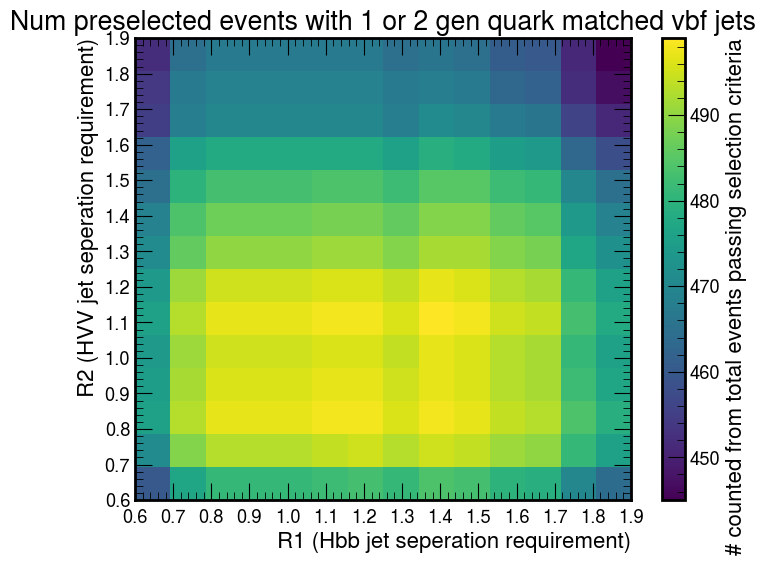

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import re


def count_matched_jets(df):
    results = []
    for column in df.columns:
        # Extract columns with R1...R2 format
        # print(column, 'R1' in str(column) and 'R2' in str(column))
        if "vbfR" in str(column):
            l = len(df[column])

            # Use regex to extract R1 and R2 values from column name
            match = re.search(r"R1([\d\.]+)R2([\d\.]+)", str(column))
            if match:
                R1 = float(match.group(1))
                R2 = float(match.group(2))

                if R2 < 0.6 or R1 < 0.6:
                    continue

                zero_count = np.sum(df[column] == 0)
                one_count = np.sum(df[column] == 1)
                two_count = np.sum(df[column] == 2)
                # print(zero_count,one_count,two_count)
                results.append(
                    [(one_count + two_count), R1, R2]
                )  # adjust this to see just two count and stuff
                # print([(two_count), R1, R2])
    return np.array(results)


def plot_heatmap(data, title="Num preselected events with 1 or 2 gen quark matched vbf jets"):
    # Define grid
    R1_vals = sorted(list(set(data[:, 1])))
    R2_vals = sorted(list(set(data[:, 2])))

    heatmap_data = np.zeros((len(R1_vals), len(R2_vals)))

    for row in data:
        r1_idx = R1_vals.index(row[1])
        r2_idx = R2_vals.index(row[2])
        heatmap_data[r2_idx, r1_idx] = row[0]

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(
        heatmap_data,
        aspect="auto",
        origin="lower",
        cmap="viridis",
        extent=[R2_vals[0], R2_vals[-1], R1_vals[0], R1_vals[-1]],
    )
    plt.colorbar(label="# counted from total events passing selection criteria")
    plt.ylabel("R2 (HVV jet seperation requirement)")
    plt.xlabel("R1 (Hbb jet seperation requirement)")
    plt.title(title)
    plt.xticks(R2_vals)
    plt.yticks(R1_vals)
    plt.show()


results = count_matched_jets(df)
plot_heatmap(results)

[[0.22891566 0.5        0.5       ]
 [0.24096386 0.5        0.6       ]
 [0.24096386 0.5        0.7       ]
 ...
 [0.14606742 1.9        1.7       ]
 [0.14606742 1.9        1.8       ]
 [0.14606742 1.9        1.9       ]]
